<b><center><h1> Travel Package Purchase Prediction </h1></center></b>

# Problem Statement

- A tourism company named 'Visit with us' wants to introduce the new offering of travel packges to expand the customer base. However, the marketing cost is quite high.
- As a data scientist, we need to build a model to predict the potential customers and to make the marketing expenditure more efficient.

# Objective

- Perform the Exploratory Data Analysis: data overview, univariate analysis, bivariate analysis.
- Data pre-processing: missing values and outlier treatments, feature engineering.
- Build the models
- Predict if the potential customer who is going to purchase the newly introduced travel package.

# Data Dictionary

**Tourism.csv** - raw data that is used in this project.
1.	`CustomerID`: Unique customer ID
2.	`ProdTaken`: Whether the customer has purchased a package or not (0: No, 1: Yes)
3.	`Age`: Age of customer
4.	`TypeofContact`: How customer was contacted (Company Invited or Self Inquiry)
5.	`CityTier`: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6.	`Occupation`: Occupation of customer
7.	`Gender`: Gender of customer
8.	`NumberOfPersonVisiting`: Total number of persons planning to take the trip with the customer
9.	`PreferredPropertyStar`: Preferred hotel property rating by customer
10.	`MaritalStatus`: Marital status of customer
11.	`NumberOfTrips`: Average number of trips in a year by customer
12.	`Passport`: The customer has a passport or not (0: No, 1: Yes)
13.	`OwnCar`: Whether the customers own a car or not (0: No, 1: Yes)
14.	`NumberOfChildrenVisiting`: Total number of children with age less than 5 planning to take the trip with the customer
15.	`Designation`: Designation of the customer in the current organization
16.	`MonthlyIncome`: Gross monthly income of the customer
17.	`PitchSatisfactionScore`: Sales pitch satisfaction score
18.	`ProductPitched`: Product pitched by the salesperson
19.	`NumberOfFollowups`: Total number of follow-ups has been done by the salesperson after the sales pitch
20.	`DurationOfPitch`: Duration of the pitch by a salesperson to the customer


## Import the necessary packages

In [1]:
# This will help in making the python code more structured automatically
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data into training and testing set
from sklearn.model_selection import train_test_split

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Resize the picture
plt.rc("figure", figsize=[10, 6])

# Remove the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Set the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# ----- Packages to build the models ------
# Library to get different metric scores
from sklearn import metrics

# Library to tune model
from sklearn.model_selection import GridSearchCV

# Library for Bagging classifier
from sklearn.ensemble import BaggingClassifier

# Library for Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Library for Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libraries for AdaBoost, GradientBoost, Stacking
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

# Library for XGBoost classifier
from xgboost import XGBClassifier

<IPython.core.display.Javascript object>

## Load the dataset

In [2]:
tourism = pd.read_excel("Tourism.xlsx", sheet_name="Tourism")

<IPython.core.display.Javascript object>

In [3]:
# copy the data to another variable to keep the original data
data = tourism.copy()

<IPython.core.display.Javascript object>

# Data Structure and Overview

In [4]:
data.head()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

<IPython.core.display.Javascript object>

## Shape of the data

In [5]:
data.shape

(4888, 20)

<IPython.core.display.Javascript object>

- The dataset has 4888 rows and 20 columns

## Check the types of data columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

<IPython.core.display.Javascript object>

- There some variables that are object type. We are going to convert it to categorical type.
- The CustomerID column can be dropped as we can use the default ID.
- ProdTaken is a target/dependent variable.

## Convert object to categorical type

In [7]:
# Get the variables that are object types:
object_variables = data.select_dtypes(["object"])
object_variables.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

<IPython.core.display.Javascript object>

In [8]:
# Convert to category
for col in object_variables.columns:
    data[col] = data[col].astype("category")

<IPython.core.display.Javascript object>

In [9]:
# Check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

<IPython.core.display.Javascript object>

## Remove CustomerID

In [10]:
data.drop(["CustomerID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

## Check if there are missing values

In [11]:
data.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

- There are missing values in some columns.

## Check if there are duplicates

In [12]:
data.duplicated().sum()

141

<IPython.core.display.Javascript object>

- There are 141 duplicate values in the dataset.
- We can take a look at the data for duplcate values.

In [13]:
data[data.duplicated(keep=False) == True]

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
44            0   NaN  Company Invited         1              6.0   
48            0  46.0  Company Invited         3             11.0   
61            0  38.0  Company Invited         1             35.0   
62            0  50.0     Self Enquiry         1             13.0   
66            0  36.0  Company Invited         1             17.0   
...         ...   ...              ...       ...              ...   
4760          0  36.0     Self Enquiry         1              9.0   
4788          0  31.0     Self Enquiry         1             14.0   
4789          0  45.0     Self Enquiry         1             36.0   
4793          0  61.0     Self Enquiry         3             14.0   
4811          0  60.0     Self Enquiry         3             10.0   

          Occupation   Gender  NumberOfPersonVisiting  NumberOfFollowups  \
44    Small Business   Female                       2                3.0   
48    Small Business     Male                       3                3.0   
61          Salaried   Female                       2                3.0   
62    Small Business   Female                       2                4.0   
66          Salaried     Male                       3                4.0   
...              ...      ...                     ...                ...   
4760        Salaried     Male                       3                5.0   
4788        Salaried     Male                       3                4.0   
4789        Salaried     Male                       3                4.0   
4793  Small Business     Male                       3                2.0   
4811        Salaried  Fe Male                       3                5.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
44           Deluxe                    3.0        Single            2.0   
48           Deluxe                    3.0        Single            5.0   
61           Deluxe                    3.0        Single            2.0   
62             King                    3.0       Married            6.0   
66           Deluxe                    4.0     Unmarried            2.0   
...             ...                    ...           ...            ...   
4760       Standard                    4.0       Married            4.0   
4788         Deluxe                    3.0       Married            3.0   
4789         Deluxe                    3.0     Unmarried            3.0   
4793         Deluxe                    3.0       Married            2.0   
4811         Deluxe                    3.0     Unmarried            7.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
44           0                       3       1                       0.0   
48           1                       5       1                       1.0   
61           0                       3       1                       0.0   
62           1                       4       1                       1.0   
66           0                       4       1                       1.0   
...        ...                     ...     ...                       ...   
4760         0                       4       1                       1.0   
4788         0                       5       1                       2.0   
4789         0                       5       1                       2.0   
4793         1                       5       0                       1.0   
4811         0                       3       0                       1.0   

         Designation  MonthlyIncome  
44           Manager            NaN  
48           Manager        20772.0  
61           Manager        17406.0  
62                VP        33740.0  
66           Manager        21499.0  
...              ...            ...  
4760  Senior Manager        28952.0  
4788         Manager        22169.0  
4789         Manager        23219.0  
4793         Manager        23898.0  
4811         Manager        2384

<IPython.core.display.Javascript object>

## Drop the duplicates

In [14]:
data.drop_duplicates(inplace=True)

<IPython.core.display.Javascript object>

In [15]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [16]:
data.shape

(4747, 19)

<IPython.core.display.Javascript object>

- All the duplicate values are now removed.
- The data now has 4747 rows and 19 columns

## Check the summary stats for the dataset

In [17]:
data.describe().T

count          mean          std     min      25%  \
ProdTaken                 4747.0      0.188329     0.391016     0.0      0.0   
Age                       4531.0     37.585522     9.328723    18.0     31.0   
CityTier                  4747.0      1.655151     0.917416     1.0      1.0   
DurationOfPitch           4501.0     15.510998     8.535634     5.0      9.0   
NumberOfPersonVisiting    4747.0      2.911734     0.724040     1.0      2.0   
NumberOfFollowups         4703.0      3.705082     1.008677     1.0      3.0   
PreferredPropertyStar     4721.0      3.583351     0.800351     3.0      3.0   
NumberOfTrips             4609.0      3.233239     1.847851     1.0      2.0   
Passport                  4747.0      0.289657     0.453651     0.0      0.0   
PitchSatisfactionScore    4747.0      3.051612     1.369584     1.0      2.0   
OwnCar                    4747.0      0.617653     0.486012     0.0      0.0   
NumberOfChildrenVisiting  4687.0      1.193514     0.860461     0.0      1.0   
MonthlyIncome             4523.0  23602.239443  5385.503223  1000.0  20337.0   

                              50%      75%      max  
ProdTaken                     0.0      0.0      1.0  
Age                          36.0     44.0     61.0  
CityTier                      1.0      3.0      3.0  
DurationOfPitch              13.0     20.0    127.0  
NumberOfPersonVisiting        3.0      3.0      5.0  
NumberOfFollowups             4.0      4.0      6.0  
PreferredPropertyStar         3.0      4.0      5.0  
NumberOfTrips                 3.0      4.0     22.0  
Passport                      0.0      1.0      1.0  
PitchSatisfactionScore        3.0      4.0      5.0  
OwnCar                        1.0      1.0      1.0  
NumberOfChildrenVisiting      1.0      2.0      3.0  
MonthlyIncome             22311.0  25535.5  98678.0

<IPython.core.display.Javascript object>

- The average Age in this dataset is about 37.
- The mean is greater than the median for DurationOfPitch and MonthlyIncome. Hence these are right skewed distribution.

In [18]:
data.describe(include="category").T

count unique           top  freq
TypeofContact   4722      2  Self Enquiry  3350
Occupation      4747      4      Salaried  2293
Gender          4747      3          Male  2835
ProductPitched  4747      5         Basic  1800
MaritalStatus   4747      4       Married  2279
Designation     4747      5     Executive  1800

<IPython.core.display.Javascript object>

- There are more male than female.
- Most customers are married.
- About 48% of custmers are salaried.
- Most customers are self-enquiry, executive designation and choose basic product pitched.

# Univariate Data Analysis

- We are going to create a function to do boxplot and histogram

In [19]:
def generate_plot(data, feature, figsize=(10, 6), kde=True, bins=None):
    """
    Description:
    This is the function that generate both boxplot and histogram for any input numerical variable.

    Inputs:
    data: dataframe of the dataset
    feature: dataframe column
    figsize: size of figure (default (10,6))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)

    Output:
    Boxplot and histogram
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # This is for boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")

    # This is for histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)

    # Add mean to the histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")

    # Add median to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

<IPython.core.display.Javascript object>

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4747 non-null   int64   
 1   Age                       4531 non-null   float64 
 2   TypeofContact             4722 non-null   category
 3   CityTier                  4747 non-null   int64   
 4   DurationOfPitch           4501 non-null   float64 
 5   Occupation                4747 non-null   category
 6   Gender                    4747 non-null   category
 7   NumberOfPersonVisiting    4747 non-null   int64   
 8   NumberOfFollowups         4703 non-null   float64 
 9   ProductPitched            4747 non-null   category
 10  PreferredPropertyStar     4721 non-null   float64 
 11  MaritalStatus             4747 non-null   category
 12  NumberOfTrips             4609 non-null   float64 
 13  Passport                  4747 non-null   int64 

<IPython.core.display.Javascript object>

## Observation on Age

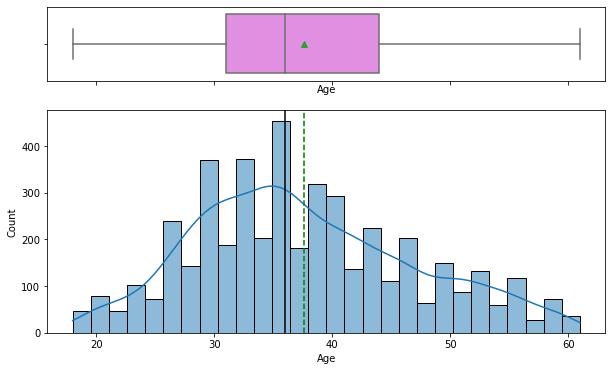

<IPython.core.display.Javascript object>

In [21]:
generate_plot(data, "Age")

- This is right-skewed distribution.
- There are no outliers in Age variable.

## Observation on CityTier

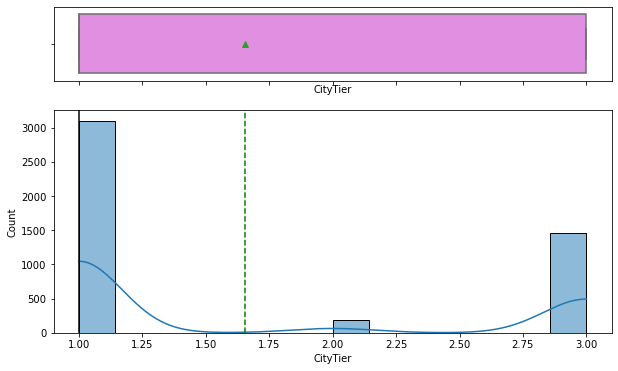

<IPython.core.display.Javascript object>

In [22]:
generate_plot(data, "CityTier")

- There are no outliers in CityTier variable.
- The median is 1, and the mean is around 1.65

## Observation on DurationOfPitch

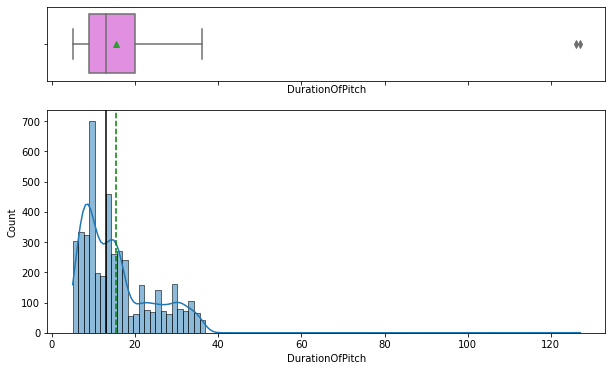

<IPython.core.display.Javascript object>

In [23]:
generate_plot(data, "DurationOfPitch")

- There are some outliers in DurationOfPitch variable.
- This is slightly right skwewed distribution

## Observation on NumberOfPersonVisiting

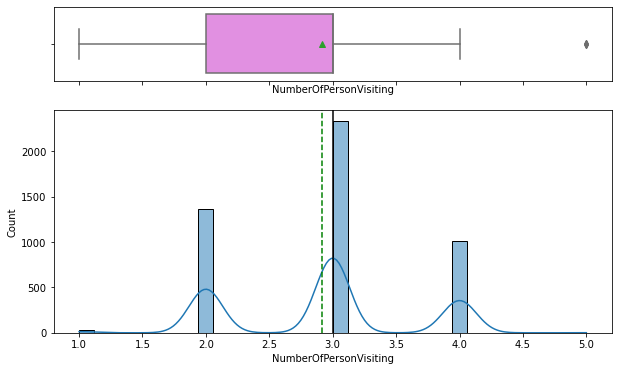

<IPython.core.display.Javascript object>

In [24]:
generate_plot(data, "NumberOfPersonVisiting")

- There are some outliers in NumberOfPersonVisiting variable.

## Observation on NumberOfFollowups

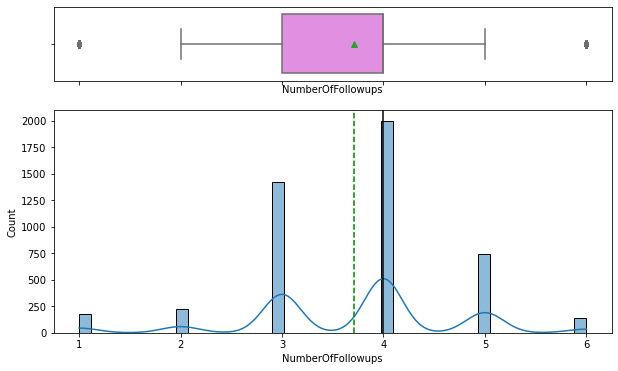

<IPython.core.display.Javascript object>

In [25]:
generate_plot(data, "NumberOfFollowups")

- There are outliers in NumberOfFollowups variable.

## Observation on PreferredPropertyStar

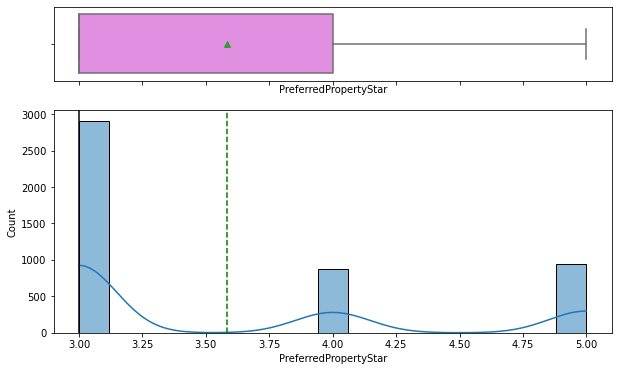

<IPython.core.display.Javascript object>

In [26]:
generate_plot(data, "PreferredPropertyStar")

- There are no outliers in PreferredPropertyStar variable.

## Observation on NumberOfTrips

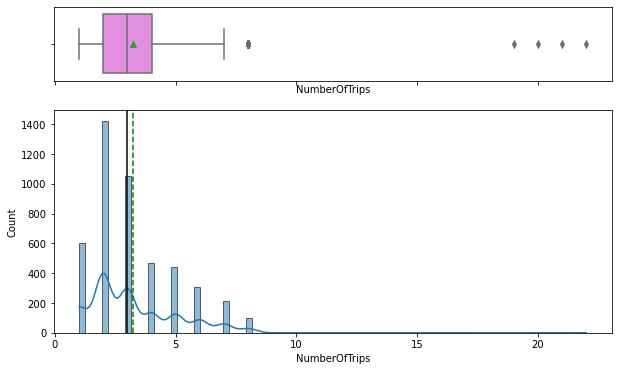

<IPython.core.display.Javascript object>

In [27]:
generate_plot(data, "NumberOfTrips")

- There are some outliers in NumberOfTrips variable.

## Observation on Passport

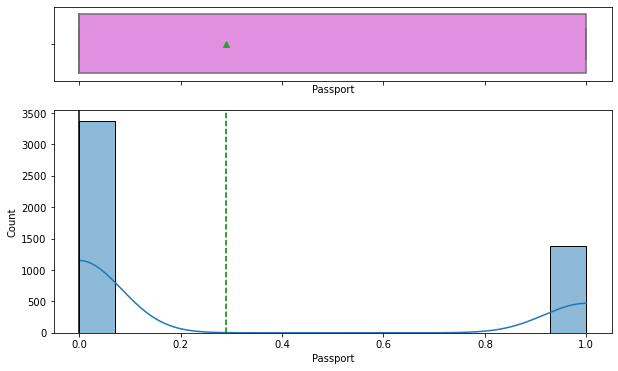

<IPython.core.display.Javascript object>

In [28]:
generate_plot(data, "Passport")

- There are no outliers in Passport variable.

## Observation on PitchSatisfactionScore

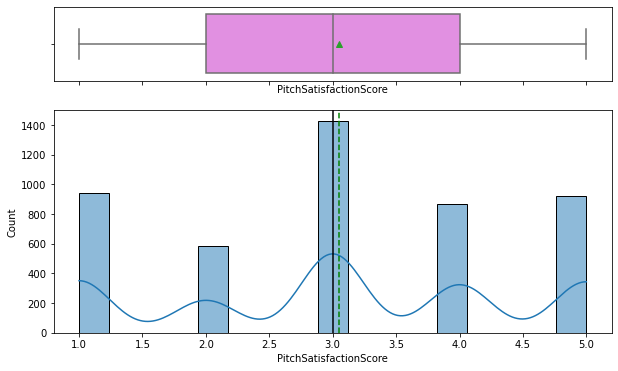

<IPython.core.display.Javascript object>

In [29]:
generate_plot(data, "PitchSatisfactionScore")

- There are no outliers in PitchSatisfactionScore variable.
- The median is 3, and the mean is around 3.1

## Observation on OwnCar

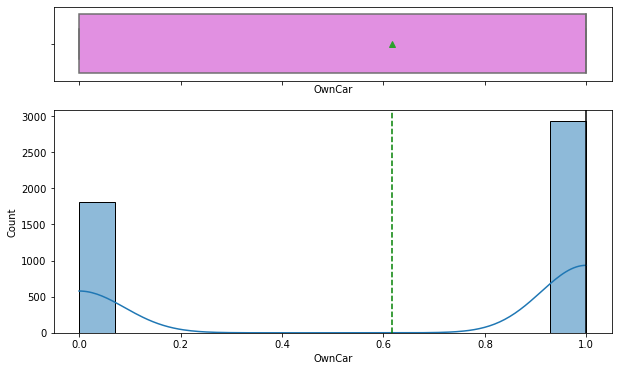

<IPython.core.display.Javascript object>

In [30]:
generate_plot(data, "OwnCar")

- There are no outliers in OwnCar variable.

## Observation on NumberOfChildrenVisiting

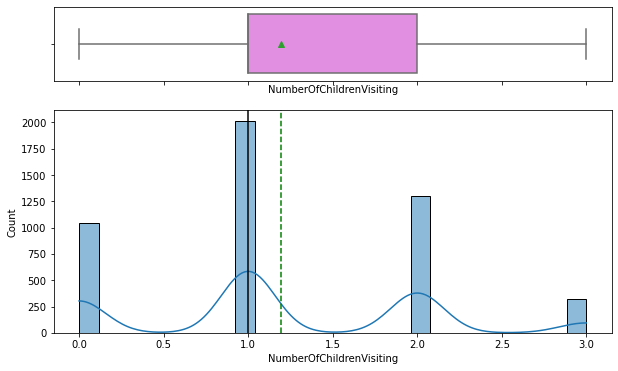

<IPython.core.display.Javascript object>

In [31]:
generate_plot(data, "NumberOfChildrenVisiting")

- There are no outliers in NumberOfChildrenVisiting variable.

## Observation on MonthlyIncome

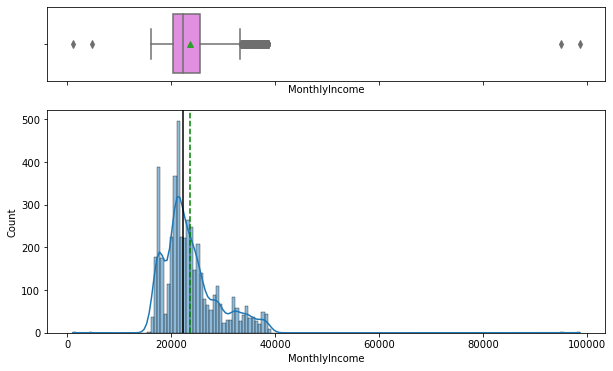

<IPython.core.display.Javascript object>

In [32]:
generate_plot(data, "MonthlyIncome")

- There are outliers in MonthlyIncome variable.

## Observations on non-numerical variables

- We are going to create count statistic and barplot functions for non-numerical variables.

In [33]:
def count_statistic(dataframe, feature):
    '''
    Description:
    This is a function to count the values of each type in each variable, and also do the percentage of each type.
    
    Inputs:
    dataframe - the dataset
    feature - the column name
    
    Output:
    Count of each type and percentage
    '''
    
    count_values = dataframe[feature].value_counts()
    print('Counting:')
    print(count_values)
    print('\n')
    print('Population proportion:')
    print(count_values/count_values.sum())


<IPython.core.display.Javascript object>

In [34]:
def generate_countplot(data, feature):
    """
    Description:
    This is a function to do countplot

    Inputs:
    data - the dataset
    feature - the column name

    Output:
    The count plot
    """
    sns.countplot(data=data, x=feature)

<IPython.core.display.Javascript object>

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4747 non-null   int64   
 1   Age                       4531 non-null   float64 
 2   TypeofContact             4722 non-null   category
 3   CityTier                  4747 non-null   int64   
 4   DurationOfPitch           4501 non-null   float64 
 5   Occupation                4747 non-null   category
 6   Gender                    4747 non-null   category
 7   NumberOfPersonVisiting    4747 non-null   int64   
 8   NumberOfFollowups         4703 non-null   float64 
 9   ProductPitched            4747 non-null   category
 10  PreferredPropertyStar     4721 non-null   float64 
 11  MaritalStatus             4747 non-null   category
 12  NumberOfTrips             4609 non-null   float64 
 13  Passport                  4747 non-null   int64 

<IPython.core.display.Javascript object>

## Observation on ProdTaken

In [36]:
count_statistic(data, "ProdTaken")

Counting:
0    3853
1     894
Name: ProdTaken, dtype: int64


Population proportion:
0    0.811671
1    0.188329
Name: ProdTaken, dtype: float64


<IPython.core.display.Javascript object>

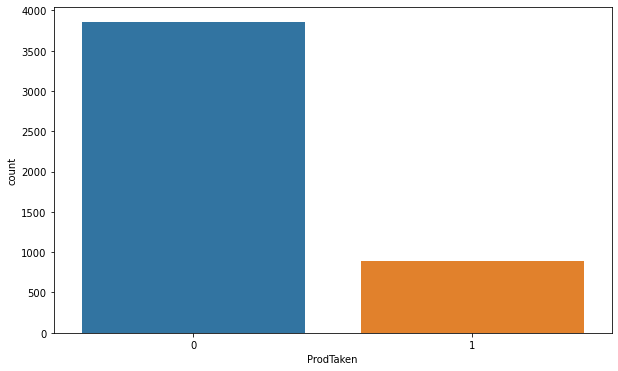

<IPython.core.display.Javascript object>

In [37]:
generate_countplot(data, "ProdTaken")

- There is about 81.18% of customers that didn't purchase travel package.

## Observation on TypeofContact

In [38]:
count_statistic(data, "TypeofContact")

Counting:
Self Enquiry       3350
Company Invited    1372
Name: TypeofContact, dtype: int64


Population proportion:
Self Enquiry       0.709445
Company Invited    0.290555
Name: TypeofContact, dtype: float64


<IPython.core.display.Javascript object>

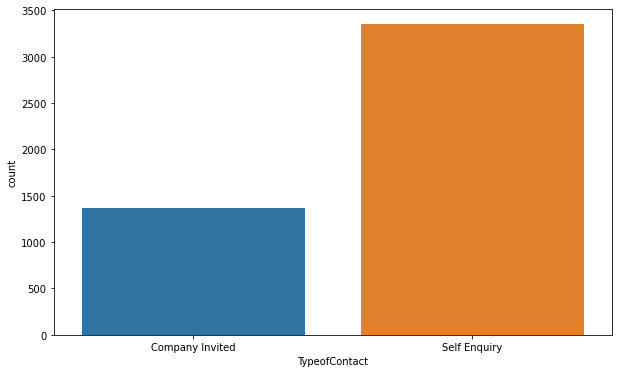

<IPython.core.display.Javascript object>

In [39]:
generate_countplot(data, "TypeofContact")

- There are about 3444 customers, which is 70.82% that are self enquiry.

## Observation on Occupation

In [40]:
count_statistic(data, "Occupation")

Counting:
Salaried          2293
Small Business    2028
Large Business     424
Free Lancer          2
Name: Occupation, dtype: int64


Population proportion:
Salaried          0.483042
Small Business    0.427217
Large Business    0.089320
Free Lancer       0.000421
Name: Occupation, dtype: float64


<IPython.core.display.Javascript object>

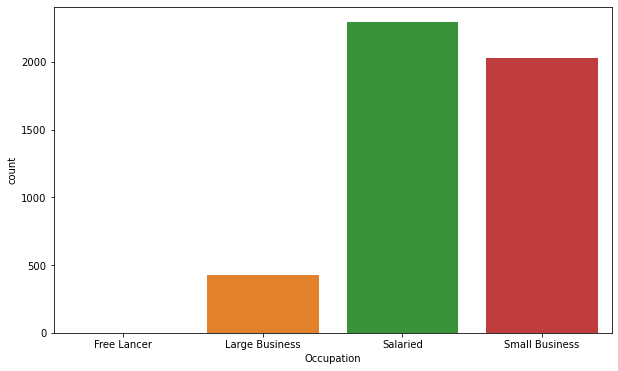

<IPython.core.display.Javascript object>

In [41]:
generate_countplot(data, "Occupation")

- Most customers, about 48.44% are salaried, followed by 42.64% customers that have small businesses.
- There is very little percentage of free lancer.

## Observation on Gender

In [42]:
count_statistic(data, "Gender")

Counting:
Male       2835
Female     1769
Fe Male     143
Name: Gender, dtype: int64


Population proportion:
Male       0.597219
Female     0.372656
Fe Male    0.030124
Name: Gender, dtype: float64


<IPython.core.display.Javascript object>

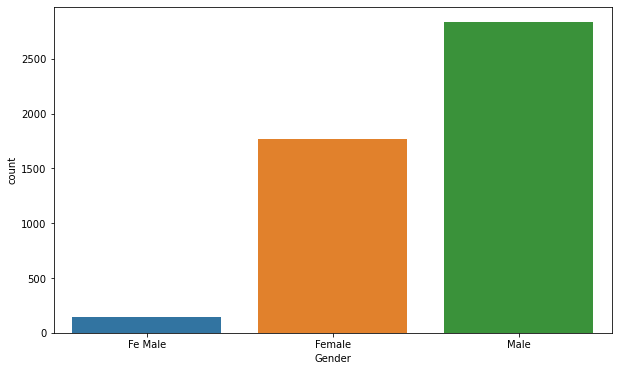

<IPython.core.display.Javascript object>

In [43]:
generate_countplot(data, "Gender")

- There is a typo in Fe Male. We will need to fix this later.
- There are more male than female in this dataset.

## Observation on ProductPitched

In [44]:
count_statistic(data, "ProductPitched")

Counting:
Basic           1800
Deluxe          1684
Standard         714
Super Deluxe     324
King             225
Name: ProductPitched, dtype: int64


Population proportion:
Basic           0.379187
Deluxe          0.354750
Standard        0.150411
Super Deluxe    0.068254
King            0.047398
Name: ProductPitched, dtype: float64


<IPython.core.display.Javascript object>

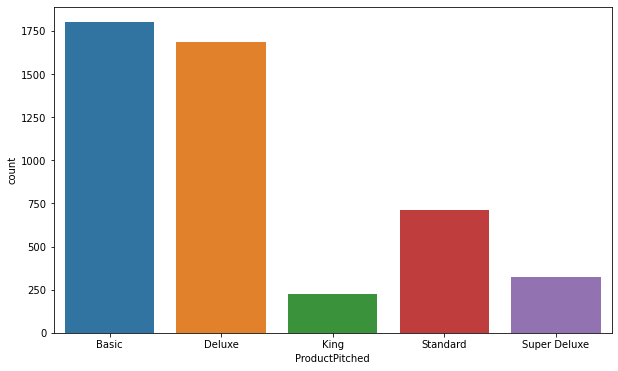

<IPython.core.display.Javascript object>

In [45]:
generate_countplot(data, "ProductPitched")

- Most customers, about 37.68%, choose basic package.
- The package that has the least customers, is King with 4.71%.

## Observation on MaritalStatus 

In [46]:
count_statistic(data, "MaritalStatus")

Counting:
Married      2279
Divorced      950
Single        875
Unmarried     643
Name: MaritalStatus, dtype: int64


Population proportion:
Married      0.480093
Divorced     0.200126
Single       0.184327
Unmarried    0.135454
Name: MaritalStatus, dtype: float64


<IPython.core.display.Javascript object>

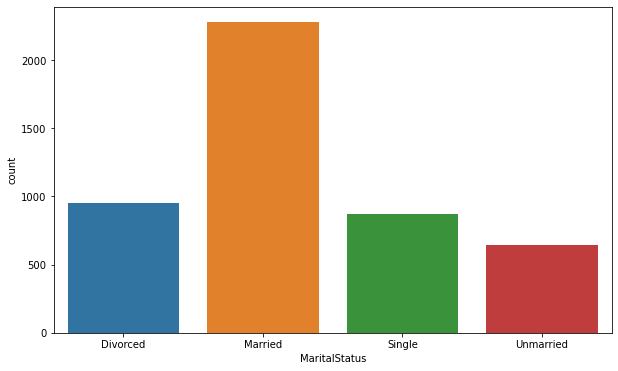

<IPython.core.display.Javascript object>

In [47]:
generate_countplot(data, "MaritalStatus")

- Most customers, about 47.87%, are married, and 13.95% are unmarried.

## Observation on Designation

In [48]:
count_statistic(data, "Designation")

Counting:
Executive         1800
Manager           1684
Senior Manager     714
AVP                324
VP                 225
Name: Designation, dtype: int64


Population proportion:
Executive         0.379187
Manager           0.354750
Senior Manager    0.150411
AVP               0.068254
VP                0.047398
Name: Designation, dtype: float64


<IPython.core.display.Javascript object>

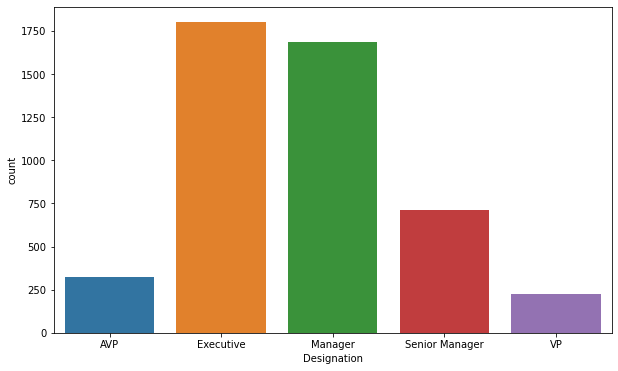

<IPython.core.display.Javascript object>

In [49]:
generate_countplot(data, "Designation")

- Most customers in this dataset is Executive with 37.68%.
- The desgination that the least is VP with 4.71%.

# Bivariate Data Analysis

- We are going to look at the correlation and heatmap.
- Besides, we are going to look at the relationship between dependent variable ProdTaken and other variables in the dataset.

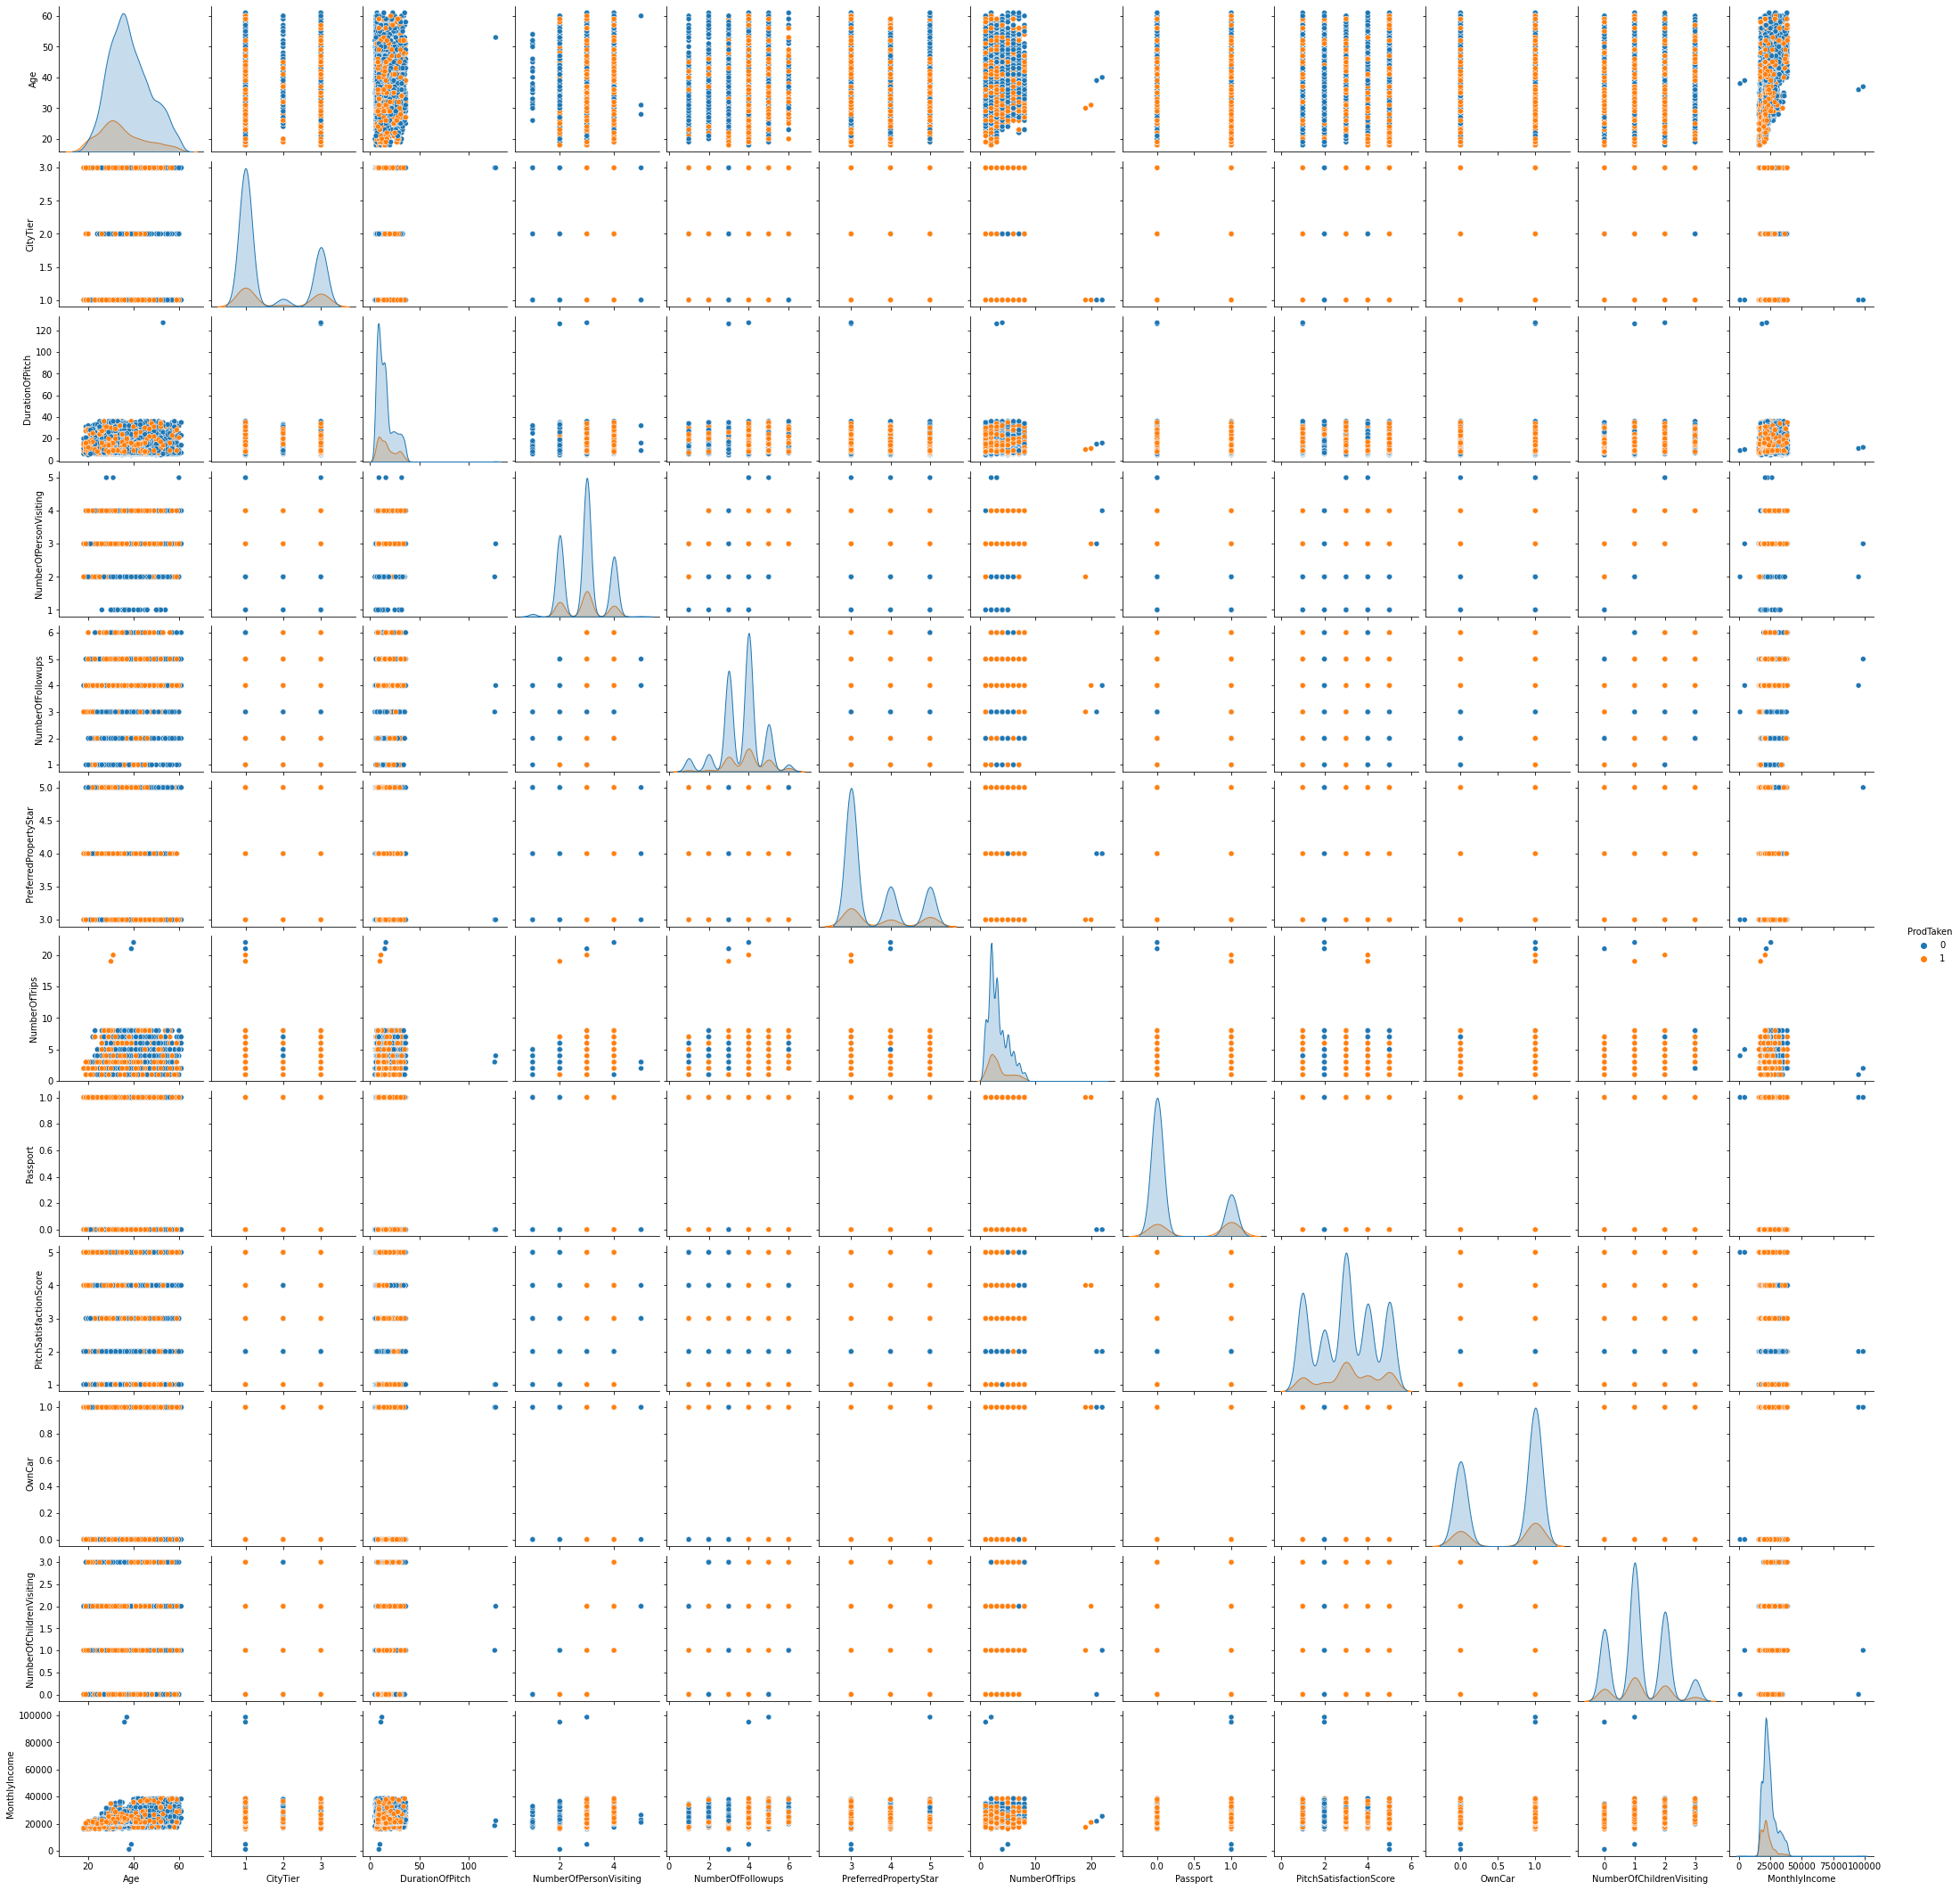

<IPython.core.display.Javascript object>

In [50]:
sns.pairplot(data, diag_kind="kde", hue="ProdTaken")

In [51]:
# 2-D matrix:
correlation = data.corr()
correlation

ProdTaken       Age  CityTier  DurationOfPitch  \
ProdTaken                  1.000000 -0.146835  0.087104         0.074869   
Age                       -0.146835  1.000000 -0.018870        -0.012678   
CityTier                   0.087104 -0.018870  1.000000         0.022650   
DurationOfPitch            0.074869 -0.012678  0.022650         1.000000   
NumberOfPersonVisiting     0.010352  0.011708 -0.004280         0.062663   
NumberOfFollowups          0.115001 -0.002524  0.027920         0.010032   
PreferredPropertyStar      0.096168 -0.010465 -0.010565        -0.005490   
NumberOfTrips              0.026652  0.178912 -0.037776         0.007877   
Passport                   0.262567  0.030165 -0.002446         0.033907   
PitchSatisfactionScore     0.052667  0.014525 -0.043015        -0.001946   
OwnCar                    -0.011289  0.047647  0.004300        -0.000482   
NumberOfChildrenVisiting   0.009087  0.005329  0.001755         0.029056   
MonthlyIncome             -0.132070  0.465681  0.050131        -0.006716   

                          NumberOfPersonVisiting  NumberOfFollowups  \
ProdTaken                               0.010352           0.115001   
Age                                     0.011708          -0.002524   
CityTier                               -0.004280           0.027920   
DurationOfPitch                         0.062663           0.010032   
NumberOfPersonVisiting                  1.000000           0.328980   
NumberOfFollowups                       0.328980           1.000000   
PreferredPropertyStar                   0.036227          -0.024625   
NumberOfTrips                           0.194561           0.138336   
Passport                                0.013065           0.008428   
PitchSatisfactionScore                 -0.014741           0.002003   
OwnCar                                  0.012453           0.010040   
NumberOfChildrenVisiting                0.609440           0.284572   
MonthlyIncome                           0.193832           0.172677   

                          PreferredPropertyStar  NumberOfTrips  Passport  \
ProdTaken                              0.096168       0.026652  0.262567   
Age                                   -0.010465       0.178912  0.030165   
CityTier                              -0.010565      -0.037776 -0.002446   
DurationOfPitch                       -0.005490       0.007877  0.033907   
NumberOfPersonVisiting                 0.036227       0.194561  0.013065   
NumberOfFollowups                     -0.024625       0.138336  0.008428   
PreferredPropertyStar                  1.000000       0.014035 -0.004682   
NumberOfTrips                          0.014035       1.000000  0.014727   
Passport                              -0.004682       0.014727  1.000000   
PitchSatisfactionScore                -0.018786      -0.005666 -0.003041   
OwnCar                                 0.017434      -0.016342 -0.020330   
NumberOfChildrenVisiting               0.036860       0.168567  0.015857   
MonthlyIncome                          0.015494       0.137790  0.002805   

                          PitchSatisfactionScore    OwnCar  \
ProdTaken                               0.052667 -0.011289   
Age                                     0.014525  0.047647   
CityTier                               -0.043015  0.004300   
DurationOfPitch                        -0.001946 -0.000482   
NumberOfPersonVisiting                 -0.014741  0.012453   
NumberOfFollowups                       0.002003  0.010040   
PreferredPropertyStar                  -0.018786  0.017434   
NumberOfTrips                          -0.005666 -0.016342   
Passport                               -0.003041 -0.020330   
PitchSatisfactionScore                  1.000000  0.070803   
OwnCar                                  0.070803  1.000000   
NumberOfChildrenVisiting                0.001386  0.028208   
MonthlyIncome                           0.030190  0.077672   

                          Number

<IPython.core.display.Javascript object>

<AxesSubplot:>

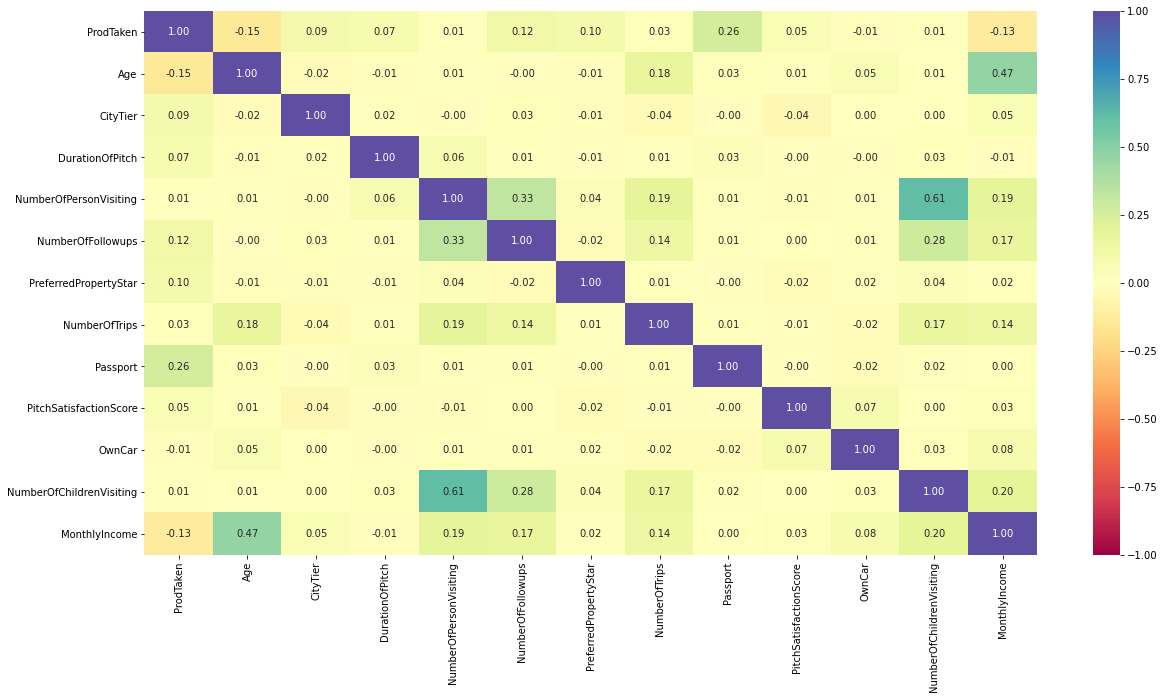

<IPython.core.display.Javascript object>

In [52]:
# correlation heatmap:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

- As expected, Age correlates with the MonthlyIncome variable, with 46%.
- ProdTaken doesn't correlate with Age and MonthlyIncome variables, as the correlation values are negative.
- NumberOfPersonVisiting and NumberOfChildrenVisiting variable are correlated to each other. This means as number of customers take the trip increases, number of children take the trip also increases.

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4747 non-null   int64   
 1   Age                       4531 non-null   float64 
 2   TypeofContact             4722 non-null   category
 3   CityTier                  4747 non-null   int64   
 4   DurationOfPitch           4501 non-null   float64 
 5   Occupation                4747 non-null   category
 6   Gender                    4747 non-null   category
 7   NumberOfPersonVisiting    4747 non-null   int64   
 8   NumberOfFollowups         4703 non-null   float64 
 9   ProductPitched            4747 non-null   category
 10  PreferredPropertyStar     4721 non-null   float64 
 11  MaritalStatus             4747 non-null   category
 12  NumberOfTrips             4609 non-null   float64 
 13  Passport                  4747 non-null   int64 

<IPython.core.display.Javascript object>

In [54]:
# Create a function to do stacked plot:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(20, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

## ProdTaken vs Age

ProdTaken     0    1   All
Age                       
All        3679  852  4531
29.0        120   57   177
30.0        146   47   193
31.0        149   40   189
32.0        150   40   190
34.0        164   39   203
33.0        145   37   182
26.0         68   36   104
35.0        199   32   231
27.0        106   29   135
28.0        117   26   143
20.0         13   25    38
36.0        198   25   223
37.0        158   24   182
21.0         18   23    41
41.0        127   23   150
40.0        121   22   143
19.0         11   21    32
25.0         53   20    73
42.0        119   18   137
24.0         38   18    56
51.0         71   17    88
45.0         93   17   110
44.0         83   16    99
22.0         31   15    46
38.0        157   15   172
52.0         54   14    68
39.0        135   13   148
23.0         33   13    46
59.0         30   12    42
56.0         43   12    55
47.0         75   12    87
50.0         72   12    84
46.0        106   11   117
48.0         53   11    64
5

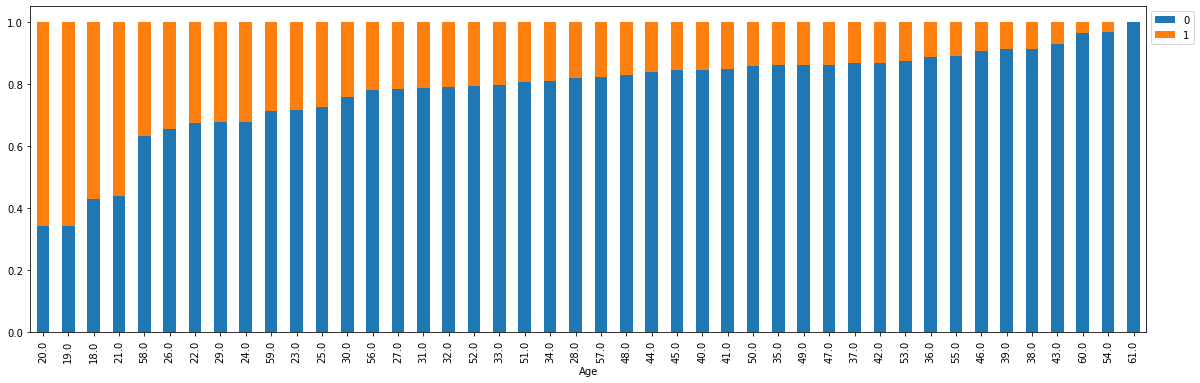

<IPython.core.display.Javascript object>

In [55]:
stacked_barplot(data, "Age", "ProdTaken")

<AxesSubplot:xlabel='Age', ylabel='ProdTaken'>

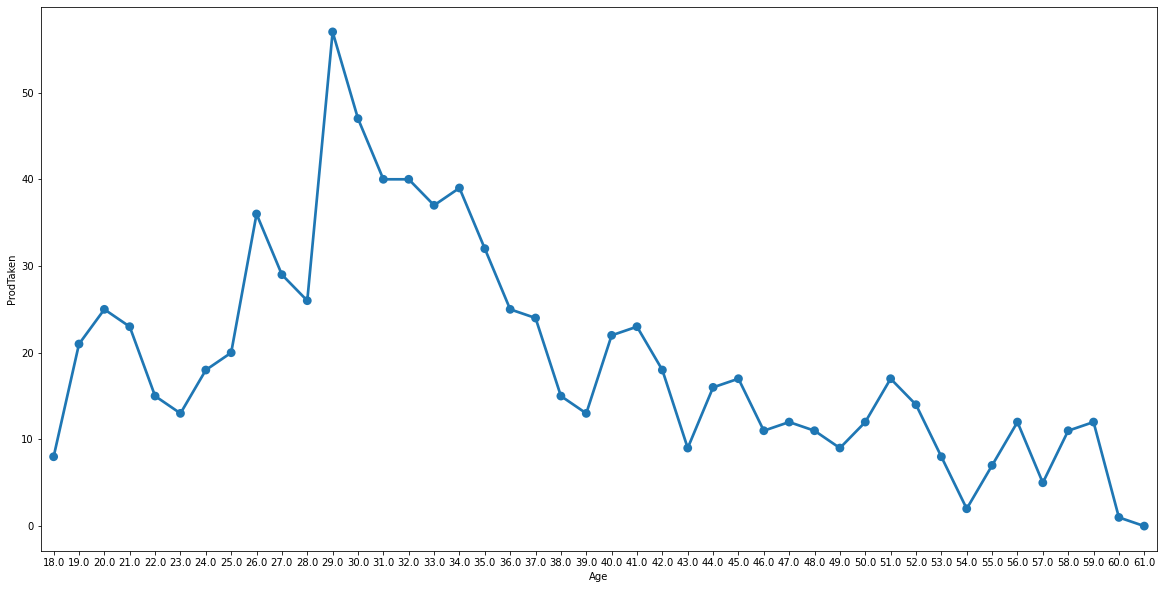

<IPython.core.display.Javascript object>

In [56]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="Age", y="ProdTaken", data=data, estimator=sum, ci=None)

- The customers that have the range of age 29-30 purchase the most travel package.
- As the age increases, the less customer want to buy the travel package.
- Customers are in early age range from 18-24 also less likely to buy the travel package.

## ProdTaken vs TypeofContact

ProdTaken           0    1   All
TypeofContact                   
All              3831  891  4722
Self Enquiry     2753  597  3350
Company Invited  1078  294  1372
------------------------------------------------------------------------------------------------------------------------


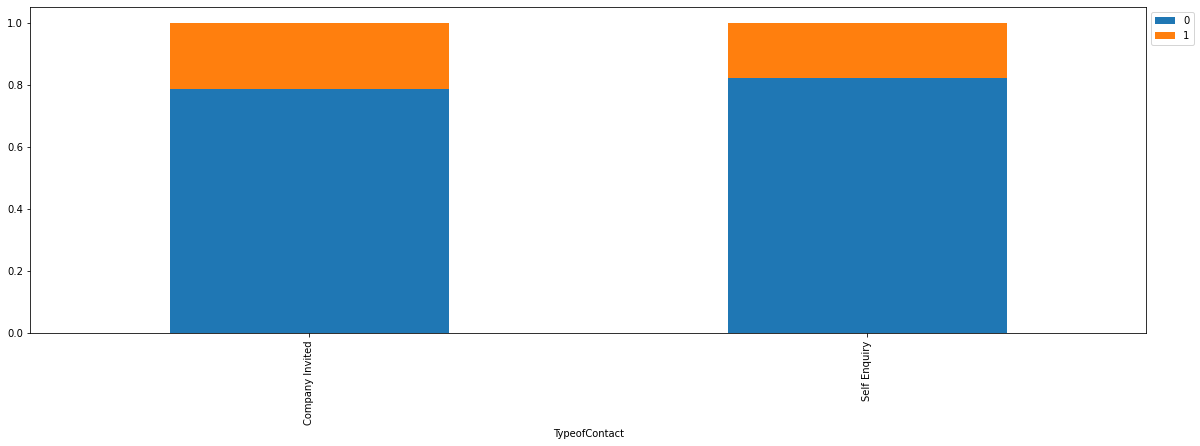

<IPython.core.display.Javascript object>

In [57]:
stacked_barplot(data, "TypeofContact", "ProdTaken")

- The customers that are self-enquiry purchased the most travel package, comparing to company invited.

## ProdTaken vs CityTier

ProdTaken     0    1   All
CityTier                  
All        3853  894  4747
1          2592  506  3098
3          1115  346  1461
2           146   42   188
------------------------------------------------------------------------------------------------------------------------


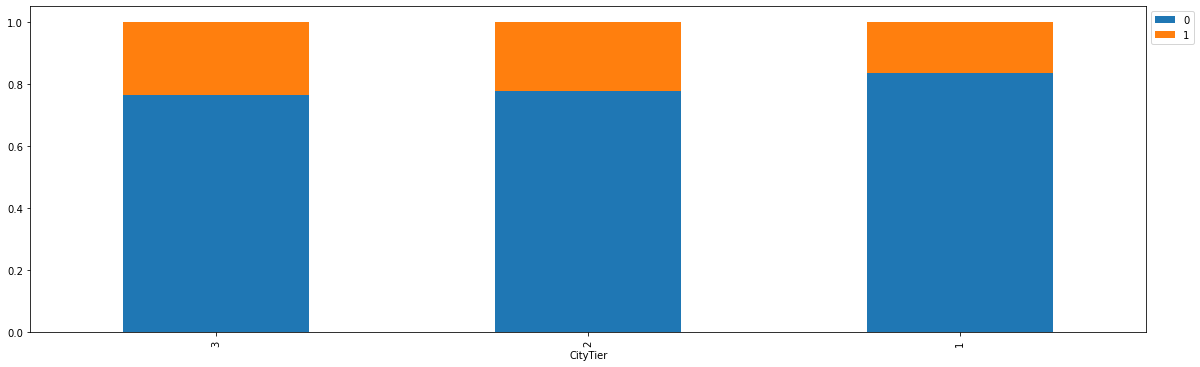

<IPython.core.display.Javascript object>

In [58]:
stacked_barplot(data, "CityTier", "ProdTaken")

- The customers that are in city Tier 1 most likely purchase the travel package. 
- City Tier 2 has the least customers purchasing the travel package.

## ProdTaken vs DurationOfPitch

ProdTaken           0    1   All
DurationOfPitch                 
All              3651  850  4501
9.0               388   78   466
8.0               265   59   324
16.0              215   55   270
15.0              210   52   262
7.0               287   47   334
10.0              191   43   234
14.0              204   41   245
6.0               261   38   299
11.0              162   34   196
12.0              155   32   187
13.0              181   32   213
31.0               50   30    80
30.0               62   28    90
17.0              146   23   169
22.0               66   22    88
19.0               35   20    55
29.0               51   20    71
23.0               58   19    77
18.0               55   18    73
20.0               43   18    61
28.0               44   17    61
32.0               57   15    72
21.0               55   15    70
24.0               54   15    69
27.0               58   14    72
25.0               58   14    72
26.0               59   12    71
33.0      

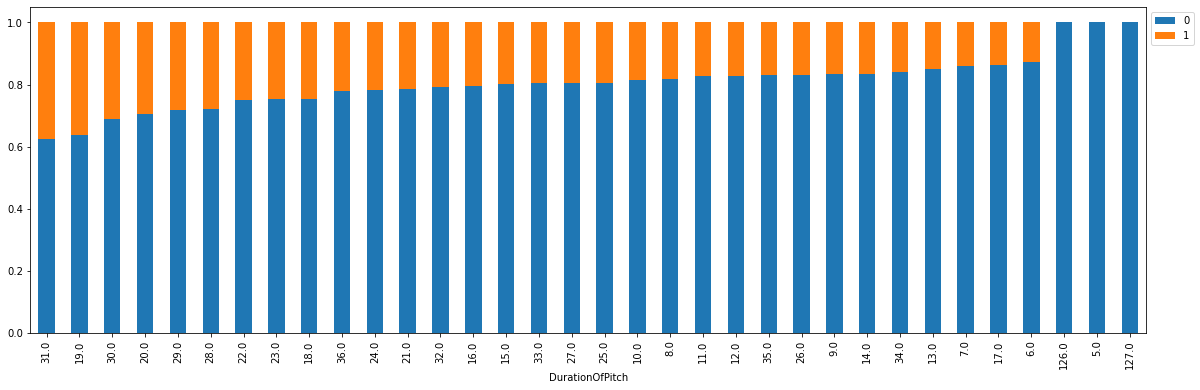

<IPython.core.display.Javascript object>

In [59]:
stacked_barplot(data, "DurationOfPitch", "ProdTaken")

<AxesSubplot:xlabel='DurationOfPitch', ylabel='ProdTaken'>

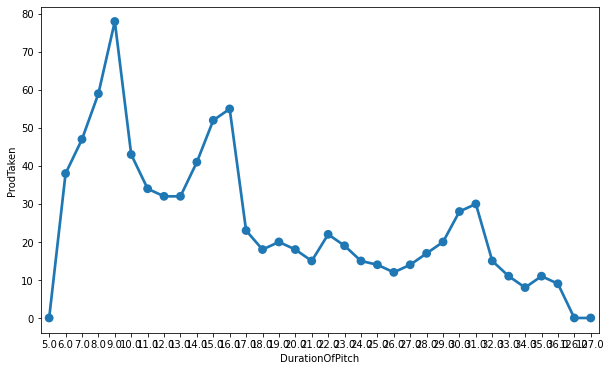

<IPython.core.display.Javascript object>

In [60]:
sns.pointplot(x="DurationOfPitch", y="ProdTaken", data=data, estimator=sum, ci=None)

- The range of pitch duration between 8-9, 15-16 by saleperson have the most customers purchasing the travel package.
- As the duration of pitch increases, the less customers purchase the travel package.

## ProdTaken vs Occupation

ProdTaken          0    1   All
Occupation                     
All             3853  894  4747
Salaried        1893  400  2293
Small Business  1654  374  2028
Large Business   306  118   424
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


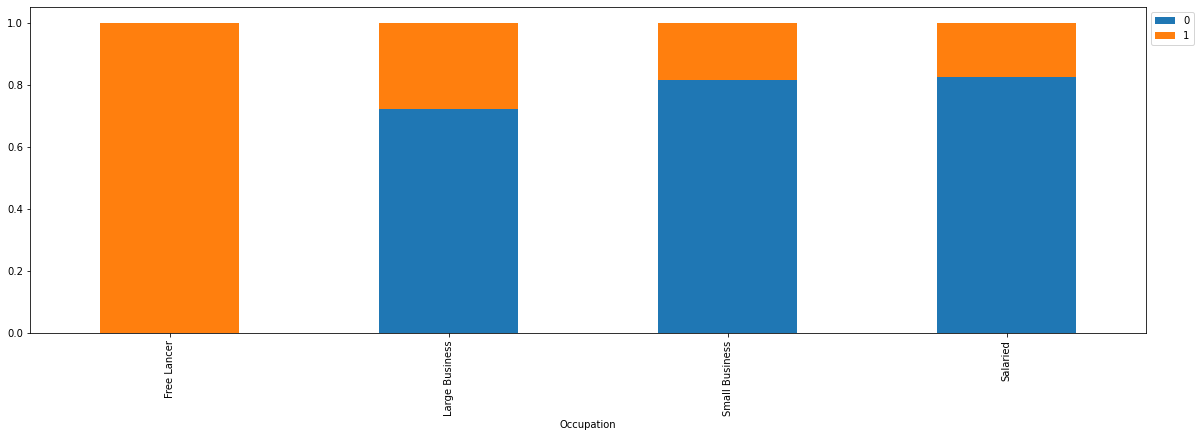

<IPython.core.display.Javascript object>

In [61]:
stacked_barplot(data, "Occupation", "ProdTaken")

- The customers that are salaried, purchase the most travel package.
- The customers that are free lancers, purchase the least travel package.

## ProdTaken vs Gender

ProdTaken     0    1   All
Gender                    
All        3853  894  4747
Male       2273  562  2835
Female     1461  308  1769
Fe Male     119   24   143
------------------------------------------------------------------------------------------------------------------------


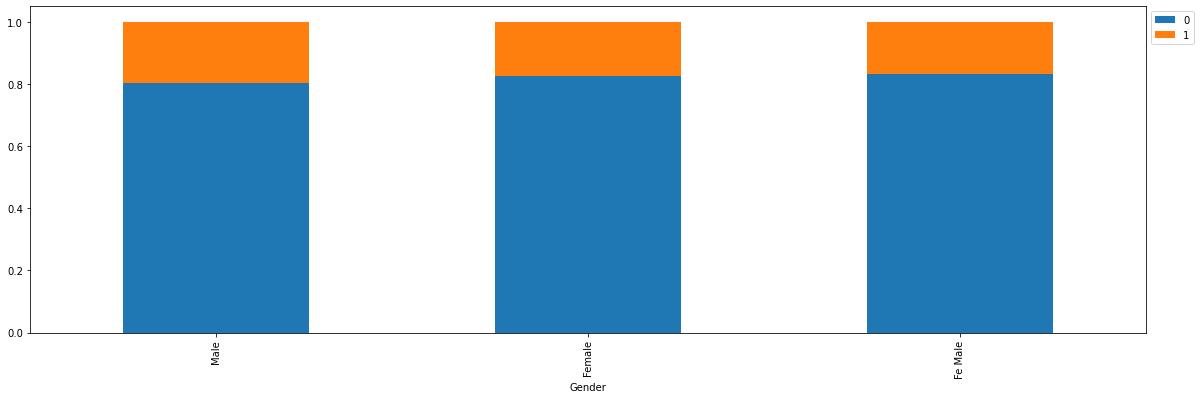

<IPython.core.display.Javascript object>

In [62]:
stacked_barplot(data, "Gender", "ProdTaken")

- The customers that are male likely to purchase the travel package comparing to female customers.

## ProdTaken vs NumberOfPersonVisiting

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3853  894  4747
3                       1889  447  2336
2                       1108  256  1364
4                        818  191  1009
1                         35    0    35
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


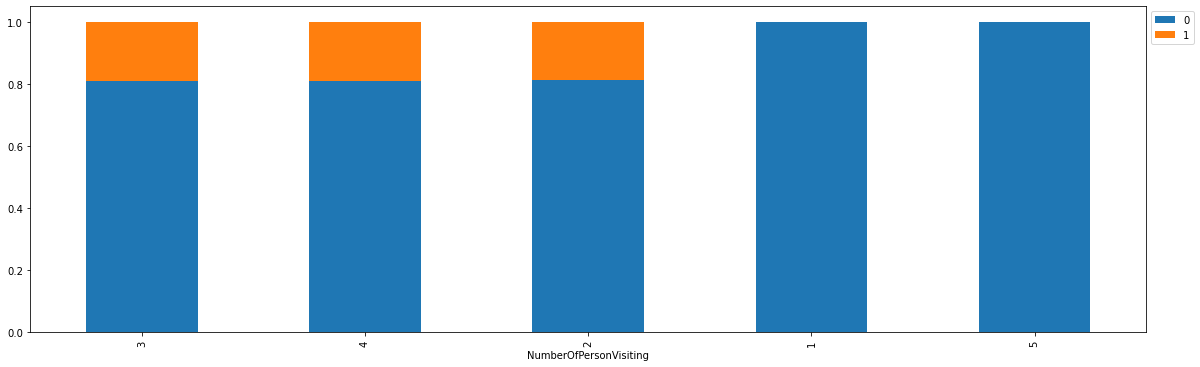

<IPython.core.display.Javascript object>

In [63]:
stacked_barplot(data, "NumberOfPersonVisiting", "ProdTaken")

- The more customers that take the trip together likely to purchase the travel package, specifically number of 3 people.
- Number of 1 or 5 people that take trip, less likely to purchase the travel package.

## ProdTaken vs NumberOfFollowups

ProdTaken             0    1   All
NumberOfFollowups                 
All                3817  886  4703
4.0                1632  367  1999
3.0                1187  234  1421
5.0                 557  188   745
6.0                  82   53   135
2.0                 204   24   228
1.0                 155   20   175
------------------------------------------------------------------------------------------------------------------------


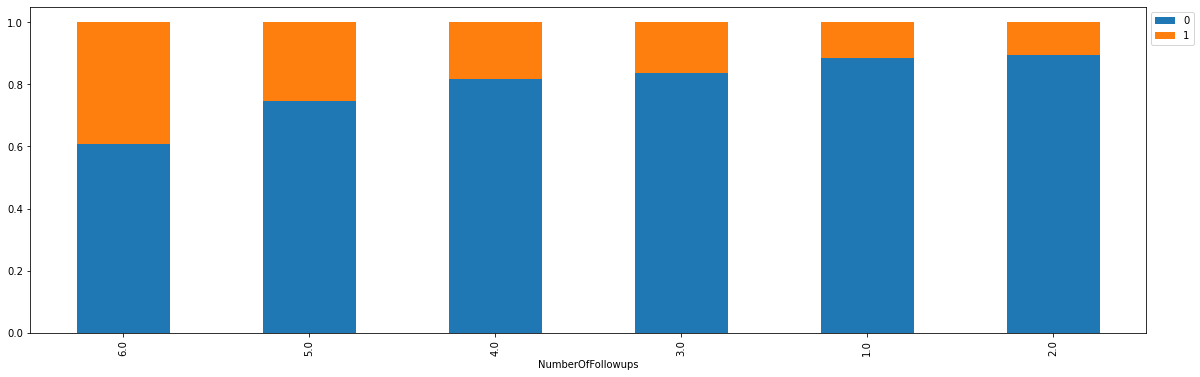

<IPython.core.display.Javascript object>

In [64]:
stacked_barplot(data, "NumberOfFollowups", "ProdTaken")

- The customers that are followed up by the saleperson 4 times, likely to purchase the travel package.
- The customers that are followed up only 1 time less likely to purchase the travel package.

## ProdTaken vs ProductPitched

ProdTaken          0    1   All
ProductPitched                 
All             3853  894  4747
Basic           1260  540  1800
Deluxe          1486  198  1684
Standard         594  120   714
King             205   20   225
Super Deluxe     308   16   324
------------------------------------------------------------------------------------------------------------------------


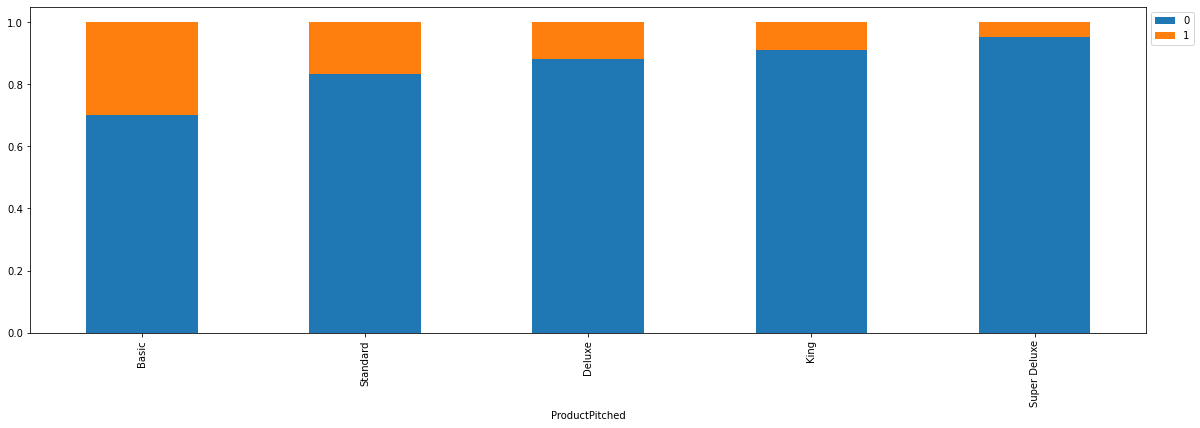

<IPython.core.display.Javascript object>

In [65]:
stacked_barplot(data, "ProductPitched", "ProdTaken")

- The customers that have basic product pitched likely to purchase to travel package, comparing to King and Super Delux.

## ProdTaken vs PreferredPropertyStar

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3833  888  4721
3.0                    2435  470  2905
5.0                     696  242   938
4.0                     702  176   878
------------------------------------------------------------------------------------------------------------------------


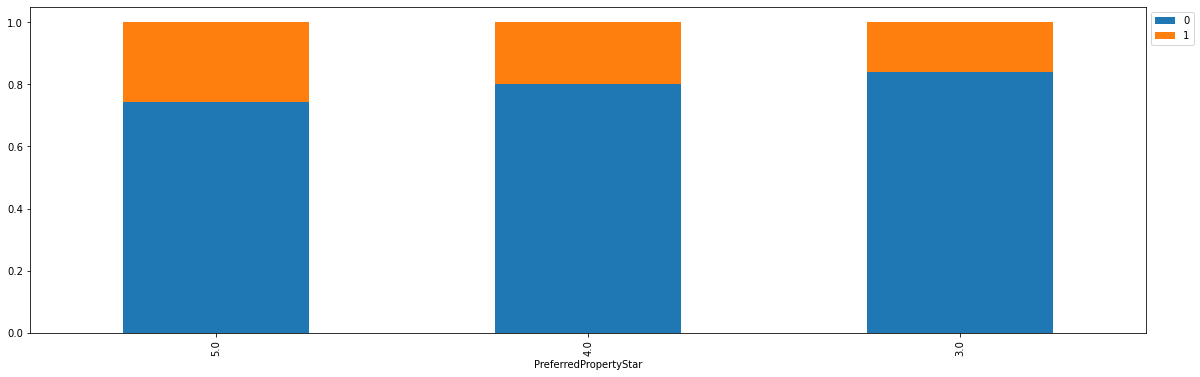

<IPython.core.display.Javascript object>

In [66]:
stacked_barplot(data, "PreferredPropertyStar", "ProdTaken")

- The customers that prefer hotel rating 3 stars likely to purchase the travel package.
- The customers that prefer hotel rating 4 stars less likely to purchase the travel package.

## ProdTaken vs MaritalStatus

ProdTaken         0    1   All
MaritalStatus                 
All            3853  894  4747
Married        1965  314  2279
Single          578  297   875
Unmarried       484  159   643
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


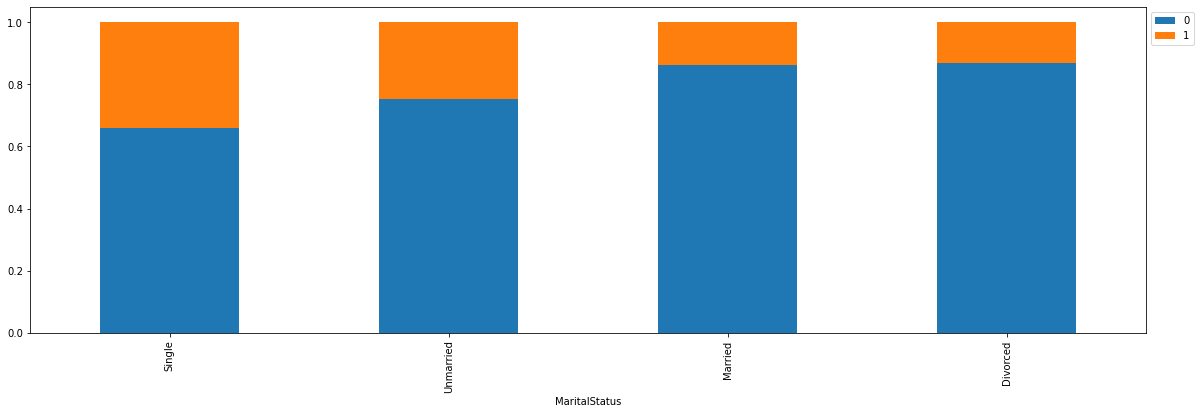

<IPython.core.display.Javascript object>

In [67]:
stacked_barplot(data, "MaritalStatus", "ProdTaken")

- The customers that are married likely to purchase the travel package.
- The customers that are divorced less likely to purchase the travel package.

## ProdTaken vs NumberOfTrips

ProdTaken         0    1   All
NumberOfTrips                 
All            3727  882  4609
2.0            1134  288  1422
3.0             838  213  1051
1.0             496  105   601
6.0             244   63   307
5.0             382   61   443
7.0             150   61   211
4.0             408   60   468
8.0              73   29   102
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
------------------------------------------------------------------------------------------------------------------------


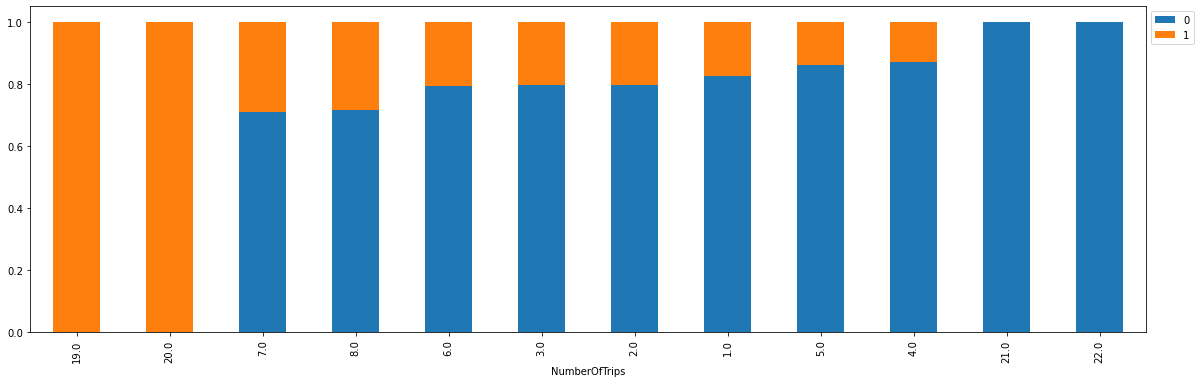

<IPython.core.display.Javascript object>

In [68]:
stacked_barplot(data, "NumberOfTrips", "ProdTaken")

- The more number of trips, the less likely the customers purchase the travel package.
- The customers that have number of 2 trips in a year likely to purchase the travel package.

## ProdTake vs Passport 

ProdTaken     0    1   All
Passport                  
All        3853  894  4747
1           895  480  1375
0          2958  414  3372
------------------------------------------------------------------------------------------------------------------------


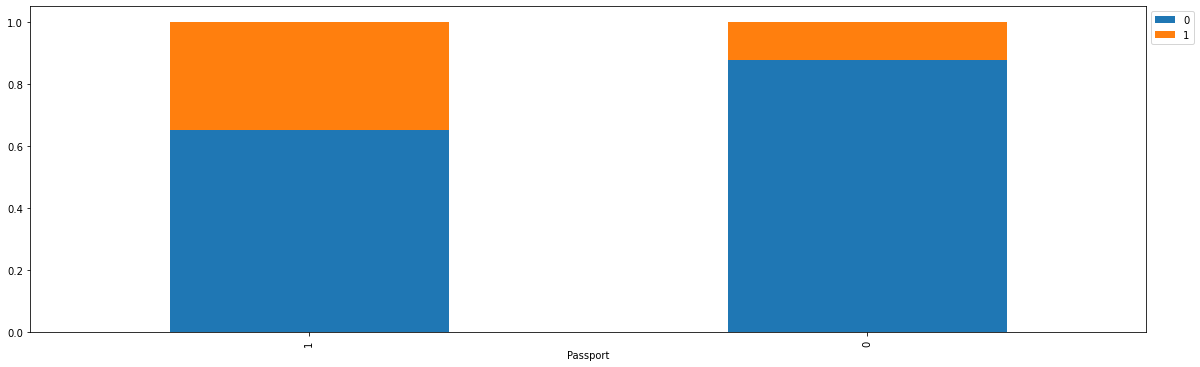

<IPython.core.display.Javascript object>

In [69]:
stacked_barplot(data, "Passport", "ProdTaken")

- The customers that have passport likely to purchase the travel package than the ones that don't have.

## ProdTaken vs PitchSatisfactionScore

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3853  894  4747
3                       1123  304  1427
5                        725  198   923
4                        709  160   869
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


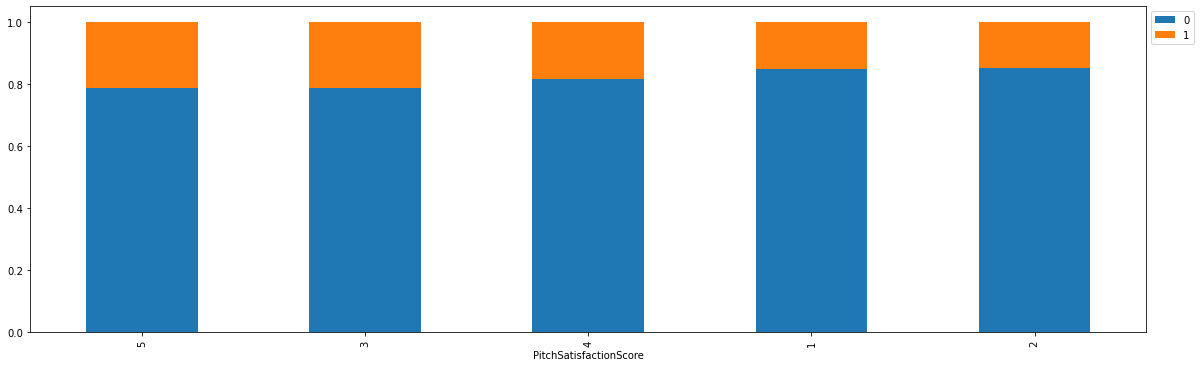

<IPython.core.display.Javascript object>

In [70]:
stacked_barplot(data, "PitchSatisfactionScore", "ProdTaken")

- The customers that rate Sales pitch satisfaction score of 3 likely to purchase the travel package.
- The customers that rate Sales pitch satisfaction score of 2 or 1 less likely to purchase the travel package.

## ProdTaken vs OwnCar

ProdTaken     0    1   All
OwnCar                    
All        3853  894  4747
1          2390  542  2932
0          1463  352  1815
------------------------------------------------------------------------------------------------------------------------


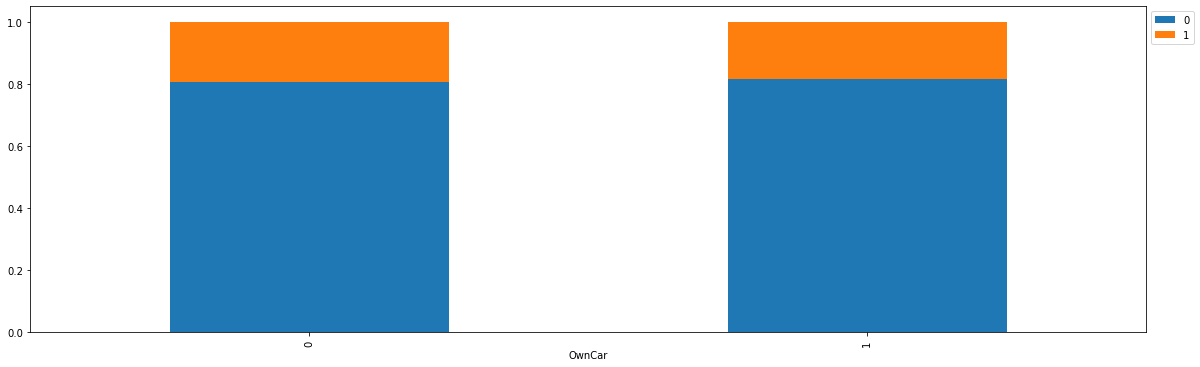

<IPython.core.display.Javascript object>

In [71]:
stacked_barplot(data, "OwnCar", "ProdTaken")

- The customers that own cars likely to purchase the travel package comparing to the ones that don't.

## ProdTaken vs NumberOfChildrenVisiting

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3800  887  4687
1.0                       1635  379  2014
2.0                       1056  248  1304
0.0                        851  194  1045
3.0                        258   66   324
------------------------------------------------------------------------------------------------------------------------


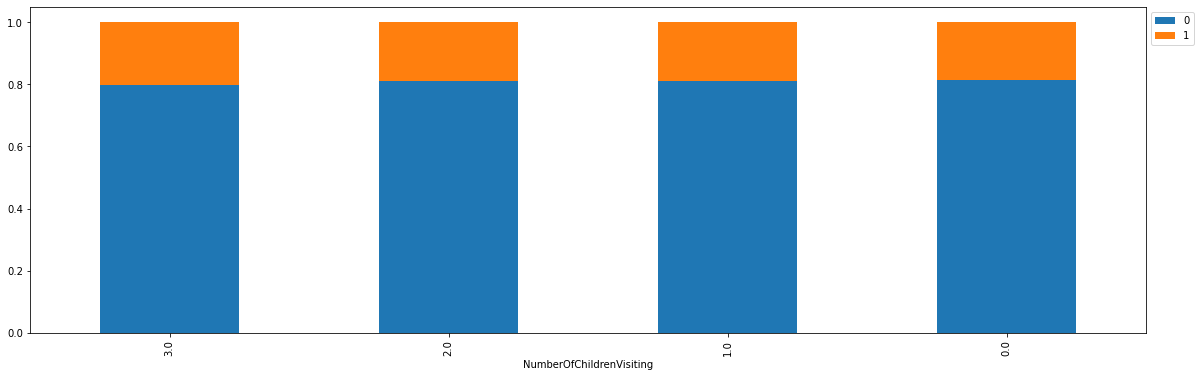

<IPython.core.display.Javascript object>

In [72]:
stacked_barplot(data, "NumberOfChildrenVisiting", "ProdTaken")

- The number of 1 children that goes with the customer likely to purchase the travel package.
- The number of 3 children that go with the customer less likely to purchase the travel package.

## ProdTaken vs Designation

ProdTaken          0    1   All
Designation                    
All             3853  894  4747
Executive       1260  540  1800
Manager         1486  198  1684
Senior Manager   594  120   714
VP               205   20   225
AVP              308   16   324
------------------------------------------------------------------------------------------------------------------------


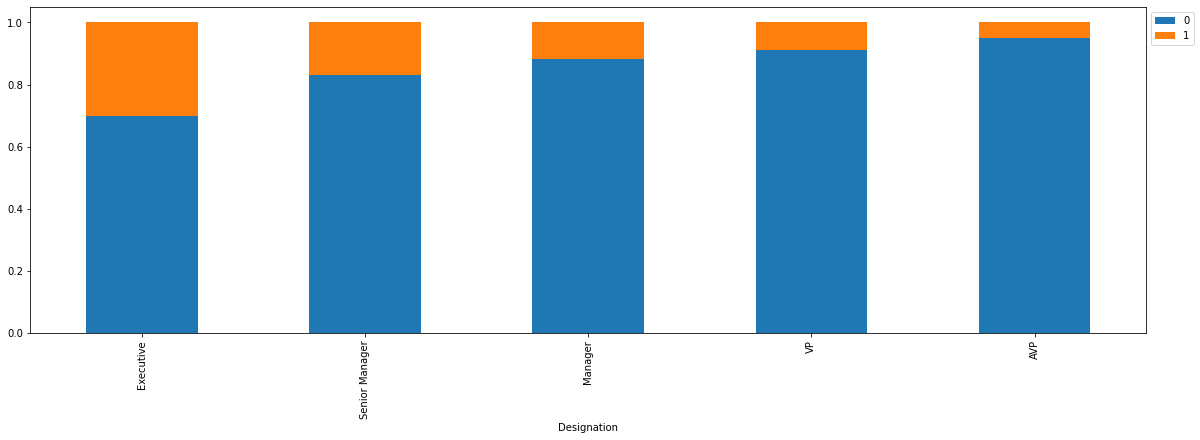

<IPython.core.display.Javascript object>

In [73]:
stacked_barplot(data, "Designation", "ProdTaken")

- The customers that are executive, about ~30%, likely to purchase the travel package.
- The customers that are VP and AVP less likely purchase the travel package.

# ProdTaken vs MonthlyIncome 

ProdTaken         0    1   All
MonthlyIncome                 
All            3660  863  4523
21082.0           1    4     5
17293.0           0    4     4
20971.0           0    4     4
17404.0           1    4     5
...             ...  ...   ...
21534.0           1    0     1
21524.0           2    0     2
21522.0           2    0     2
21515.0           1    0     1
22664.0           1    0     1

[2476 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


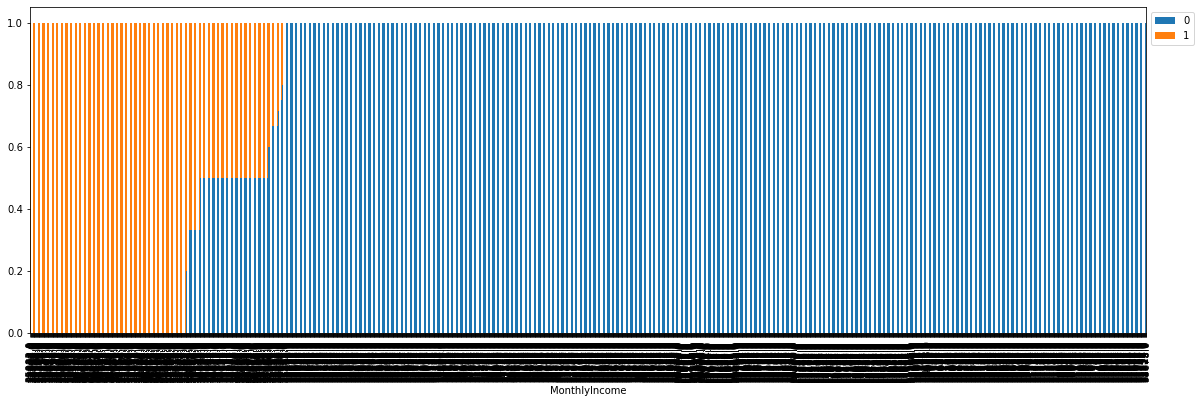

<IPython.core.display.Javascript object>

In [74]:
stacked_barplot(data, "MonthlyIncome", "ProdTaken")

ProdTaken         0    1   All
MonthlyIncome                 
All            3660  863  4523
21082.0           1    4     5
17293.0           0    4     4
20971.0           0    4     4
17404.0           1    4     5
...             ...  ...   ...
21534.0           1    0     1
21524.0           2    0     2
21522.0           2    0     2
21515.0           1    0     1
22664.0           1    0     1

[2476 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


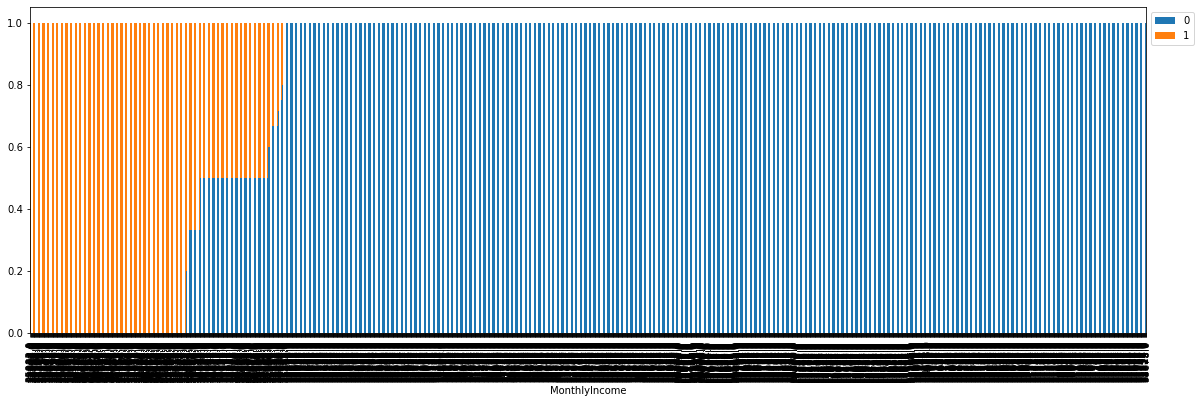

<IPython.core.display.Javascript object>

In [75]:
stacked_barplot(data, "MonthlyIncome", "ProdTaken")

<AxesSubplot:xlabel='MonthlyIncome', ylabel='ProdTaken'>

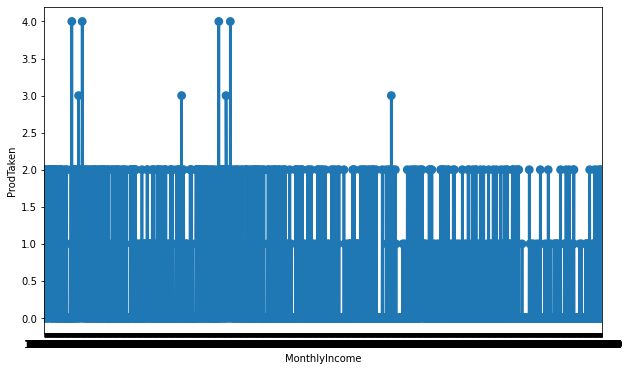

<IPython.core.display.Javascript object>

In [76]:
sns.pointplot(x="MonthlyIncome", y="ProdTaken", data=data, estimator=sum, ci=None)

- The plots show that there are not much insights between ProdTaken and MonthlyIncome variable.

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4747 non-null   int64   
 1   Age                       4531 non-null   float64 
 2   TypeofContact             4722 non-null   category
 3   CityTier                  4747 non-null   int64   
 4   DurationOfPitch           4501 non-null   float64 
 5   Occupation                4747 non-null   category
 6   Gender                    4747 non-null   category
 7   NumberOfPersonVisiting    4747 non-null   int64   
 8   NumberOfFollowups         4703 non-null   float64 
 9   ProductPitched            4747 non-null   category
 10  PreferredPropertyStar     4721 non-null   float64 
 11  MaritalStatus             4747 non-null   category
 12  NumberOfTrips             4609 non-null   float64 
 13  Passport                  4747 non-null   int64 

<IPython.core.display.Javascript object>

## Summary of EDA

**Data Description**
- The dataset has 4888 rows and 20 columns.
- There are 141 duplicate values in the dataset.
- There are missing values in some columns.
- The CustomerID column can be dropped as we can use the default ID.

**Univariate Data Analysis**
- `Age`: This is right-skewed distribution. There are no outliers in Age variable.
- `CityTier`: There are no outliers in CityTier variable. The median is 1, and the mean is around 1.65.
- `DurationOfPitch`: There are some outliers in DurationOfPitch variable. This is slightly right skwewed distribution.
- `NumberOfPersonVisiting`: There are some outliers in NumberOfPersonVisiting variable.
- `NumberOfFollowups`: There are outliers in NumberOfFollowups variable.
- `PreferredPropertyStar`: There are no outliers in PreferredPropertyStar variable.
- `NumberOfTrips`: There are some outliers in NumberOfTrips variable.
- `Passport`: There are no outliers in Passport variable.
- `PitchSatisfactionScore`: There are no outliers in PitchSatisfactionScore variable. The median is 3, and the mean is around 3.1.
- `OwnCar`: There are no outliers in OwnCar variable.
- `NumberOfChildrenVisiting`: There are no outliers in NumberOfChildrenVisiting variable.
- `MonthlyIncome`: There are outliers in MonthlyIncome variable.
- `ProdTaken`: There is about 81.18% of customers that didn't purchase travel package.
- `TypeofContact`: There are about 3444 customers, which is 70.82% that are self enquiry.
- `Occupation`: Most customers, about 48.44% are salaried, followed by 42.64% customers that have small businesses.There is very little percentage of free lancer.
- `Gender`: There is a typo in Fe Male. We will need to fix this later. There are more male than female in this dataset.
- `ProductPitched`: Most customers, about 37.68%, choose basic package. The package that has the least customers, is King with 4.71%.
- `MaritalStatus`: Most customers, about 47.87%, are married, and 13.95% are unmarried.
- `Designation`: Most customers in this dataset is Executive with 37.68%. The desgination that the least is VP with 4.71%.

**Bivariate Data Analysis**

* `ProdTaken vs Age:`
    - The customers that have the range of age 29-30 purchase the most travel package.
    - As the age increases, the less customer want to buy the travel package. Customers are in early age range from 18-24 also less likely to buy the travel package.

* `ProdTaken vs TypeofContact:`
    - The customers that are self-enquiry purchased the most travel package, comparing to company invited.

* `ProdTaken vs CityTier:`
    - The customers that are in city Tier 1 most likely purchase the travel package.
    - City Tier 2 has the least customers purchasing the travel package.

* `ProdTaken vs DurationOfPitch:`
    - The range of pitch duration between 8-9, 15-16 by saleperson have the most customers purchasing the travel package.
    - As the duration of pitch increases, the less customers purchase the travel package.

* `ProdTaken vs Occupation:`
    - The customers that are salaried, purchase the most travel package.
    - The customers that are free lancers, purchase the least travel package.

* `ProdTaken vs Gender:`
    - The customers that are male likely to purchase the travel package comparing to female customers.

* `ProdTaken vs NumberOfPersonVisiting:`
    - The more customers that take the trip together likely to purchase the travel package, specifically number of 3 people.
    - Number of 1 or 5 people that take trip, less likely to purchase the travel package.

* `ProdTaken vs NumberOfFollowups:`
    - The customers that are followed up by the saleperson 4 times, likely to purchase the travel package.
    - The customers that are followed up only 1 time less likely to purchase the travel package.

* `ProdTaken vs ProductPitched:`
    - The customers that have basic product pitched likely to purchase to travel package, comparing to King and Super Delux.

* `ProdTaken vs PreferredPropertyStar:`
    - The customers that prefer hotel rating 3 stars likely to purchase the travel package.
    - The customers that prefer hotel rating 4 stars less likely to purchase the travel package.

* `ProdTaken vs MaritalStatus:`
    - The customers that are married likely to purchase the travel package.
    - The customers that are divorced less likely to purchase the travel package.

* `ProdTaken vs NumberOfTrips:`
    - The more number of trips, the less likely the customers purchase the travel package.
    - The customers that have number of 2 trips in a year likely to purchase the travel package.

* `ProdTake vs Passport:`
    - The customers that have passport likely to purchase the travel package than the ones that don't have.

* `ProdTaken vs PitchSatisfactionScore:`
    - The customers that rate Sales pitch satisfaction score of 3 likely to purchase the travel package.
    - The customers that rate Sales pitch satisfaction score of 2 or 1 less likely to purchase the travel package.

* `ProdTaken vs OwnCar:`
    - The customers that own cars likely to purchase the travel package comparing to the ones that don't.

* `ProdTaken vs NumberOfChildrenVisiting:`
    - The number of 1 children that goes with the customer likely to purchase the travel package.
    - The number of 3 children that go with the customer less likely to purchase the travel package.

* `ProdTaken vs Designation:`
    - The customers that are executive, about ~30%, likely to purchase the travel package.
    - The customers that are VP and AVP less likely purchase the travel package.

* `ProdTaken vs MonthlyIncome:`
    - The plots show that there are not much insights between ProdTaken and MonthlyIncome variable.

# Data Pre-Processing

- We are going to do some missing values, outlier treatments, along with feature engineering.

## Missing Value Treatment

In [78]:
data.head()

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0          1  41.0     Self Enquiry         3              6.0   
1          0  49.0  Company Invited         1             14.0   
2          1  37.0     Self Enquiry         1              8.0   
3          0  33.0  Company Invited         1              9.0   
4          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

<IPython.core.display.Javascript object>

In [79]:
data.isnull().sum().sort_values(ascending=False)

DurationOfPitch             246
MonthlyIncome               224
Age                         216
NumberOfTrips               138
NumberOfChildrenVisiting     60
NumberOfFollowups            44
PreferredPropertyStar        26
TypeofContact                25
Gender                        0
CityTier                      0
Occupation                    0
ProductPitched                0
NumberOfPersonVisiting        0
Designation                   0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
ProdTaken                     0
dtype: int64

<IPython.core.display.Javascript object>

- There are 8 columns that have missing values. Variable DurationOfPitch has the most missing values in the dataset.
- We are going to take a look at each variable and do the treatment.
- First of all, we are going to take a look at the dataset to see if this is skewed distribution. If the mean is greater than the median, median imputation will be used to treat missing values

In [80]:
# Create function to calculate mean and median
def get_stats(data, column):
    """
    Description:
    This is a function to get mean and median values for a feature.

    Inputs:
    data - the dataset
    column - the column name

    Output:
    The mean and median values
    """
    print(f"The mean of {column} column is {round(data[column].mean(), 3)}")
    print(f"The median of {column} column is {round(data[column].median(), 3)}")
    print("-" * 20)

<IPython.core.display.Javascript object>

In [81]:
# Apply function to the columns, except TypeofContact column
target_columns = [
    "DurationOfPitch",
    "MonthlyIncome",
    "Age",
    "NumberOfTrips",
    "NumberOfChildrenVisiting",
    "NumberOfFollowups",
    "PreferredPropertyStar"
]

for col in target_columns:
    get_stats(data, col)


The mean of DurationOfPitch column is 15.511
The median of DurationOfPitch column is 13.0
--------------------
The mean of MonthlyIncome column is 23602.239
The median of MonthlyIncome column is 22311.0
--------------------
The mean of Age column is 37.586
The median of Age column is 36.0
--------------------
The mean of NumberOfTrips column is 3.233
The median of NumberOfTrips column is 3.0
--------------------
The mean of NumberOfChildrenVisiting column is 1.194
The median of NumberOfChildrenVisiting column is 1.0
--------------------
The mean of NumberOfFollowups column is 3.705
The median of NumberOfFollowups column is 4.0
--------------------
The mean of PreferredPropertyStar column is 3.583
The median of PreferredPropertyStar column is 3.0
--------------------


<IPython.core.display.Javascript object>

- As we can see, the means are greater than the median for the columns, therefore the median imputation can be applied.

In [82]:
# Apply the median imputation
for col in target_columns:
    data[col].fillna(data[col].median(), inplace=True)


<IPython.core.display.Javascript object>

In [83]:
data.isnull().sum().sort_values(ascending=False)

TypeofContact               25
MonthlyIncome                0
NumberOfFollowups            0
Age                          0
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
ProductPitched               0
Designation                  0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
ProdTaken                    0
dtype: int64

<IPython.core.display.Javascript object>

- Most of the columns are treated.
- Since there are missing values in TypeofContact column, we can treat them by creating another variable that is called 'Unknown', and replace missing values with this new type.

In [84]:
# Since this is a categorical column, we need to use cat.add_categories to add categories first:
data["TypeofContact"] = data["TypeofContact"].cat.add_categories("Unknown")
data["TypeofContact"].fillna("Unknown", inplace=True)

<IPython.core.display.Javascript object>

In [85]:
data.isnull().sum().sort_values(ascending=False)

MonthlyIncome               0
NumberOfFollowups           0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
ProductPitched              0
Designation                 0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
ProdTaken                   0
dtype: int64

<IPython.core.display.Javascript object>

- All the missing values are treated.

## Outliers Treatment

- Based on above visualization, the variables that have outstanding outliers are:
    - DurationOfPitch
    - NumberOfPersonVisiting
    - NumberOfFollowups
    - NumberOfTrips
    - MonthlyIncome
 
 
- First, we need to detect the total number of outliers in each variable using Z-score. Any points that fall outside 3 standard deviations is an outlier.

In [86]:
# Z-score function
outlier = []

def find_z_score(data, feature, threshold=3):
    """
    Description:
    This is a function to detect number of outliers.

    Inputs:
    data - the dataset
    feature - column name
    threshold - value is 3 because any points that fall outside 3 standard deviation is an outlier

    Output:
    Number of outliers in a variables
    """

    mean = np.mean(data[feature])
    std = np.std(data[feature])

    for value in data[feature]:
        z_score = (value - mean) / std
        # use absolute on z score to have more accurate result
        if np.abs(z_score) > threshold:
            outlier.append(value)
    return outlier


<IPython.core.display.Javascript object>

In [87]:
target_columns = [
    "DurationOfPitch",
    "NumberOfPersonVisiting",
    "NumberOfFollowups",
    "NumberOfTrips",
    "MonthlyIncome",
]

<IPython.core.display.Javascript object>

In [88]:
# Detect number of outliers for target variables:
for column in target_columns:
    outliers = find_z_score(data, column)
    print("There are ", len(outliers), " outliers in ", column, " variable")
    print("-" * 20)

There are  2  outliers in  DurationOfPitch  variable
--------------------
There are  2  outliers in  NumberOfPersonVisiting  variable
--------------------
There are  2  outliers in  NumberOfFollowups  variable
--------------------
There are  6  outliers in  NumberOfTrips  variable
--------------------
There are  10  outliers in  MonthlyIncome  variable
--------------------


<IPython.core.display.Javascript object>

- Variable MonthlyIncome has the most outliers. 
- Next, we are going to use Interquartile range (IQR) method to do outlier treatment.

In [89]:
# IQR function
def IQR_method(data, feature):
    '''
    Description:
    - This is a function that uses Interquartile range (IQR) method to do outlier treatment. 
    - Q1 is known as 25th percentile. Q3 is known as 75th percentile. IQR= Q3-Q1
    - Any data points that fall outside the minimum (Q1-1.5*IQR) and maximum (Q3+1.5*IQR) are outliers.
    - Hence, the data points that are less than the minimum, will be replaced with the minimum values.
    - Data points that are greater than the maximum values, will be replaced with the maximum values.
    
    Inputs:
    data - the dataset
    feature - column name
    
    Output:
    Updated values for outliers
    '''
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3-Q1
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR
    
    #replace outliers with lower range values and upper range values:
    data[feature] = np.where(data[feature] < lower_range, lower_range, data[feature])
    data[feature] = np.where(data[feature] > upper_range, upper_range, data[feature])


<IPython.core.display.Javascript object>

In [90]:
# Outlier treatment for target variables:
for column in target_columns:
    IQR_method(data, column)

<IPython.core.display.Javascript object>

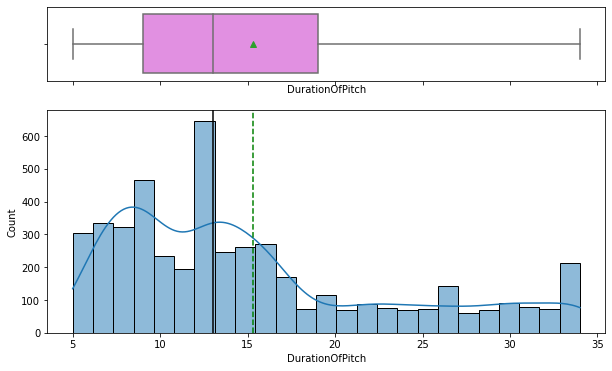

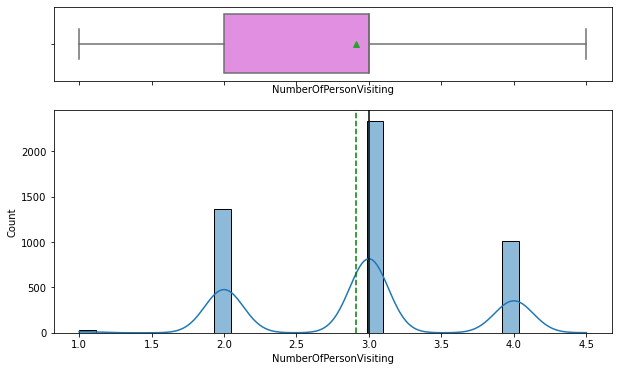

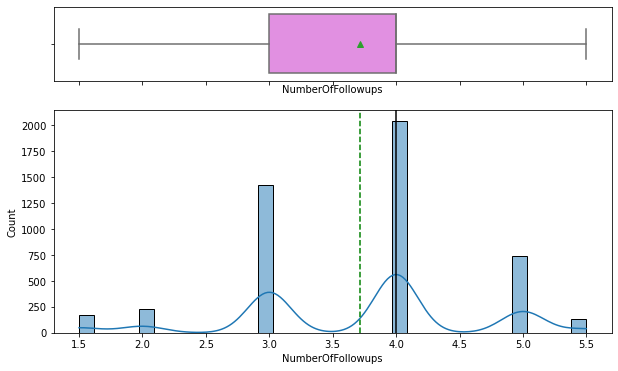

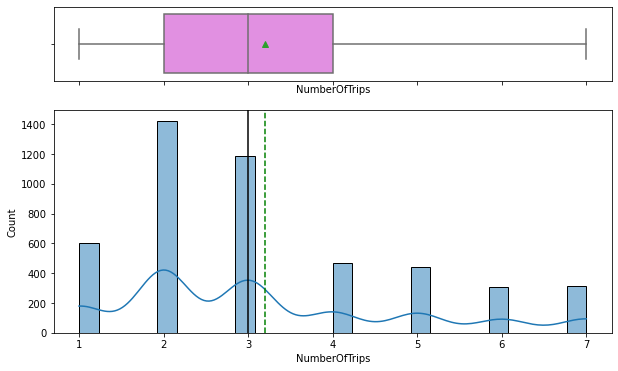

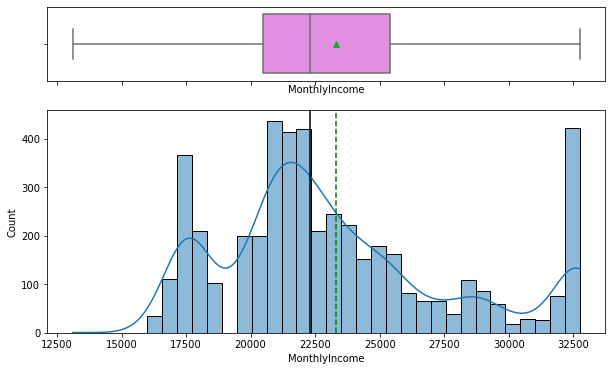

<IPython.core.display.Javascript object>

In [91]:
# Do the plots for target variables to see if the method improves the outliers:
for column in target_columns:
    generate_plot(data, column)
    plt.show()

- Based on the plots, the outliers are treated.

## Fix Gender Column

In [92]:
data["Gender"].value_counts()

Male       2835
Female     1769
Fe Male     143
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

- There is a typo for Female type. We can convert Fe Male to Female.

In [93]:
# Relace Fe Male to Female
data["Gender"].replace("Fe Male", "Female", inplace=True)

<IPython.core.display.Javascript object>

In [94]:
# Check data
data["Gender"].value_counts()

Male      2835
Female    1912
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

- The typo is fixed. The data is good to proceed to the next step.

In [95]:
data.head()

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0          1  41.0     Self Enquiry         3              6.0   
1          0  49.0  Company Invited         1             14.0   
2          1  37.0     Self Enquiry         1              8.0   
3          0  33.0  Company Invited         1              9.0   
4          0  36.0     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                     3.0                3.0   
1        Salaried    Male                     3.0                4.0   
2     Free Lancer    Male                     3.0                4.0   
3        Salaried  Female                     2.0                3.0   
4  Small Business    Male                     2.0                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

<IPython.core.display.Javascript object>

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4747 non-null   int64   
 1   Age                       4747 non-null   float64 
 2   TypeofContact             4747 non-null   category
 3   CityTier                  4747 non-null   int64   
 4   DurationOfPitch           4747 non-null   float64 
 5   Occupation                4747 non-null   category
 6   Gender                    4747 non-null   category
 7   NumberOfPersonVisiting    4747 non-null   float64 
 8   NumberOfFollowups         4747 non-null   float64 
 9   ProductPitched            4747 non-null   category
 10  PreferredPropertyStar     4747 non-null   float64 
 11  MaritalStatus             4747 non-null   category
 12  NumberOfTrips             4747 non-null   float64 
 13  Passport                  4747 non-null   int64 

<IPython.core.display.Javascript object>

## Summary of Data Pre-processing

**Mising Value Treament**
- There are 8 columns that have missing values: DurationOfPitch, MonthlyIncome, Age, NumberOfTrips, NumberOfChildrenVisiting, NumberOfFollowups, PreferredPropertyStar, and TypeofContact.
- Column DurationOfPitch has the most missing values, about 246, and column TypeofContact has the least with 25 missing values.
- Since the means are greater than the median for the columns, therefore the median imputation can be applied.
- For TypeofContact column, we treated the missing values by creating another variable that is called 'Unknown', and replace missing values with this new type.


**Outliers Treament**
- There are 5 columns that have outliers: DurationOfPitch, NumberOfPersonVisiting, NumberOfFollowups, NumberOfTrips, MonthlyIncome.
- Z-score method is used to detect total number of outliers in each variable.
- IQR method is used to do outlier treatment.


**Fix Gender Column**
- Since there is a typo in Gender column, which is 'Fe Male'. The typo is converted to 'Female'.

# Model Building

## Model Evaluation Criterion

***Model can make wrong predictions as:***
1. Predict customers that likely to purchase newly introduced travel package but they actually do not want to buy.
2. Predict customers that do not want to purchase the travel package but they actually do.


***Which case is more important?***
- Predict customers that do not want to purchase the travel package but they actually do.


***Which metric to optimize?***
- Recall (sensitivity) is an important metric that we would want to maximize. Recall is about how good a model is at detecting positives. This means the metric gives ratio of True Positive to Actual Positives. Hence, high Recall implies low false negatives.
- F1 score is another metric that can be evaluated. This is a measure performance that cover both Recall and Precision. 

### Define dependent variable

In [97]:
x = data.drop("ProdTaken", axis=1)
y = data["ProdTaken"]

<IPython.core.display.Javascript object>

### Create dummy variables

- Since the models only take numbers, we are going to create dummy variables for columns that have string.

In [98]:
x.head()

Age    TypeofContact  CityTier  DurationOfPitch      Occupation  Gender  \
0  41.0     Self Enquiry         3              6.0        Salaried  Female   
1  49.0  Company Invited         1             14.0        Salaried    Male   
2  37.0     Self Enquiry         1              8.0     Free Lancer    Male   
3  33.0  Company Invited         1              9.0        Salaried  Female   
4  36.0     Self Enquiry         1              8.0  Small Business    Male   

   NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
0                     3.0                3.0         Deluxe   
1                     3.0                4.0         Deluxe   
2                     3.0                4.0          Basic   
3                     2.0                3.0          Basic   
4                     2.0                3.0          Basic   

   PreferredPropertyStar MaritalStatus  NumberOfTrips  Passport  \
0                    3.0        Single            1.0         1   
1                    4.0      Divorced            2.0         0   
2                    3.0        Single            7.0         1   
3                    3.0      Divorced            2.0         1   
4                    4.0      Divorced            1.0         0   

   PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting Designation  \
0                       2       1                       0.0     Manager   
1                       3       1                       2.0     Manager   
2                       3       0                       0.0   Executive   
3                       5       1                       1.0   Executive   
4                       5       1                       0.0   Executive   

   MonthlyIncome  
0        20993.0  
1        20130.0  
2        17090.0  
3        17909.0  
4        18468.0

<IPython.core.display.Javascript object>

- We are going to create dummy variables for following columns:
    - TypeofContact
    - Occupation	
    - Gender
    - ProductPitched
    - MaritalStatus
    - Designation	

In [99]:
columns = [
    "TypeofContact",
    "Occupation",
    "Gender",
    "ProductPitched",
    "MaritalStatus",
    "Designation",
]
x = pd.get_dummies(x, columns=columns, drop_first=True)

<IPython.core.display.Javascript object>

In [100]:
x.head()

Age  CityTier  DurationOfPitch  NumberOfPersonVisiting  NumberOfFollowups  \
0  41.0         3              6.0                     3.0                3.0   
1  49.0         1             14.0                     3.0                4.0   
2  37.0         1              8.0                     3.0                4.0   
3  33.0         1              9.0                     2.0                3.0   
4  36.0         1              8.0                     2.0                3.0   

   PreferredPropertyStar  NumberOfTrips  Passport  PitchSatisfactionScore  \
0                    3.0            1.0         1                       2   
1                    4.0            2.0         0                       3   
2                    3.0            7.0         1                       3   
3                    3.0            2.0         1                       5   
4                    4.0            1.0         0                       5   

   OwnCar  NumberOfChildrenVisiting  MonthlyIncome  \
0       1                       0.0        20993.0   
1       1                       2.0        20130.0   
2       0                       0.0        17090.0   
3       1                       1.0        17909.0   
4       1                       0.0        18468.0   

   TypeofContact_Self Enquiry  TypeofContact_Unknown  \
0                           1                      0   
1                           0                      0   
2                           1                      0   
3                           0                      0   
4                           1                      0   

   Occupation_Large Business  Occupation_Salaried  Occupation_Small Business  \
0                          0                    1                          0   
1                          0                    1                          0   
2                          0                    0                          0   
3                          0                    1                          0   
4                          0                    0                          1   

   Gender_Male  ProductPitched_Deluxe  ProductPitched_King  \
0            0                      1                    0   
1            1                      1                    0   
2            1                      0                    0   
3            0                      0                    0   
4            1                      0                    0   

   ProductPitched_Standard  ProductPitched_Super Deluxe  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   MaritalStatus_Married  MaritalStatus_Single  MaritalStatus_Unmarried  \
0                      0                     1                        0   
1                      0                     0                        0   
2                      0                     1                        0   
3                      0                     0                        0   
4                      0                     0                        0   

   Designation_Executive  Designation_Manager  Designation_Senior Manager  \
0                      0                    1                           0   
1                      0                    1                           0   
2                      1                    0                           0   
3                      1                    0                           0   
4                      1                    0                           0   

   Designation_VP  
0               0  
1               0  
2               0  
3               0  
4               0

<IPython.core.display.Javascript object>

### Split data into training and testing set

In [101]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

- The dataset is split into 70% of training and 30% of testing set.
- **random_state=1** is used to help to reproduce the result when sampling.
- **stratify=y** is used to keep original distribution when splitting into training and testing set, and to avoid imbalancing class distribution.

In [102]:
x_train.shape

(3322, 29)

<IPython.core.display.Javascript object>

In [103]:
y_train.shape

(3322,)

<IPython.core.display.Javascript object>

In [104]:
x_test.shape

(1425, 29)

<IPython.core.display.Javascript object>

In [105]:
y_test.shape

(1425,)

<IPython.core.display.Javascript object>

In [106]:
y_test.value_counts()

0    1157
1     268
Name: ProdTaken, dtype: int64

<IPython.core.display.Javascript object>

### Create functions  to calculate different metrics and confusion matrix

In [107]:
#Confusion matrix function:
def confusion_matrix(model, predictor, target):
    """
    Description:
    This is the function to create confusion matrix and heatmap

    Inputs:
    model: classifier
    predictor - independent variables
    target - dependent variables

    Outputs:
    Heatmap plot with confusion matrix values
    """
    
    prediction = model.predict(predictor)
    cm = metrics.confusion_matrix(target, prediction)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


<IPython.core.display.Javascript object>

In [108]:
# Create a function to compute the model metrics:
def model_metrics(model, predictor, target):
    """
    Description:
    This is the function to compute the model metrics

    Inputs:
    model: classifier
    predictor - independent variables
    target - dependent variables

    Outputs:
    Model metrics
    """
    # Do the prediction:
    prediction = model.predict(predictor)

    # Calculate the accuracy:
    accuracy = metrics.accuracy_score(target, prediction)

    # Calculate recall:
    recall = metrics.recall_score(target, prediction)

    # Calculate Precision:
    precision = metrics.precision_score(target, prediction)

    # Calculate F1 score:
    f1 = metrics.f1_score(target, prediction)

    # creating a dataframe of metrics
    metrics_dataframe = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return metrics_dataframe

<IPython.core.display.Javascript object>

## Build model - Bagging

- We are going to build Bagging classifier, Random Forest and Decision Tree.
- First, we will use the default hyperparameters to build the model. If the result is not good, we will then tune the hyperparameters to optimize the model performance.
- The interest of metric is the Recall (sensitivity).

### Model Building 1 - Bagging with default hyperparameters

In [109]:
# Build model
bagging = BaggingClassifier(random_state=1)
bagging.fit(x_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Check Performance on Training

In [110]:
# Calculate the model metrics for training dataset
bagging_metrics_train = model_metrics(bagging, x_train, y_train)
bagging_metrics_train

Accuracy    Recall  Precision        F1
0  0.994281  0.971246   0.998358  0.984615

<IPython.core.display.Javascript object>

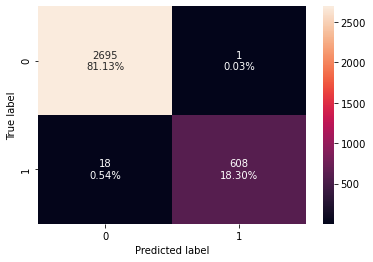

<IPython.core.display.Javascript object>

In [111]:
# Confusion matrix for training dataset
confusion_matrix(bagging, x_train, y_train)

#### Check Performance on Testing

In [112]:
# Calculate the model metrics for testing dataset
bagging_metrics_test = model_metrics(bagging, x_test, y_test)
bagging_metrics_test

Accuracy    Recall  Precision        F1
0   0.90386  0.630597   0.816425  0.711579

<IPython.core.display.Javascript object>

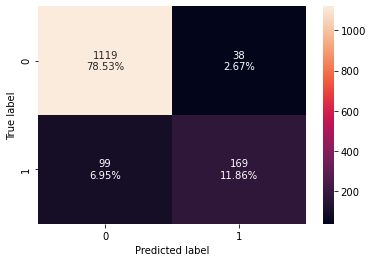

<IPython.core.display.Javascript object>

In [113]:
# Confusion matrix for testing dataset
confusion_matrix(bagging, x_test, y_test)

- Based on the result of default hyperparameters for Bagging, we see:
    - training set has good Recall and F1 scores, around 0.97 and 0.98 respectively.
    - The Recall and F1 scores for testing set however are not good, around 0.63 and 0.71 respectively.
    - This indicates an overfitting of the model.

### Model Building 2 - Random Forest with default hyperparameters

In [114]:
# Build the model
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Check Performance on Training

In [115]:
# Calculate the model metrics for training dataset
rf_metrics_train = model_metrics(random_forest, x_train, y_train)
rf_metrics_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

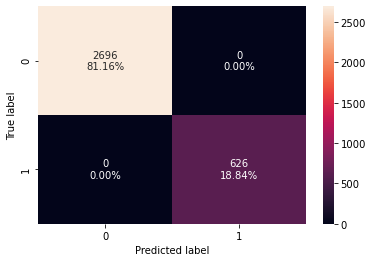

<IPython.core.display.Javascript object>

In [116]:
# Confusion matrix for training dataset
confusion_matrix(random_forest, x_train, y_train)

#### Check Performance on Testing

In [117]:
# Calculate the model metrics for testing dataset
rf_metrics_test = model_metrics(random_forest, x_test, y_test)
rf_metrics_test

Accuracy    Recall  Precision        F1
0  0.910877  0.597015   0.893855  0.715884

<IPython.core.display.Javascript object>

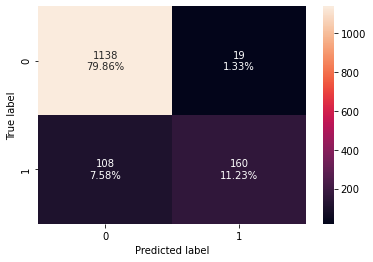

<IPython.core.display.Javascript object>

In [118]:
# Confusion matrix for testing dataset
confusion_matrix(random_forest, x_test, y_test)

- Based on the result of default hyperparameters for Random Forest, we see:
    - Trainning dataset has 100% for Recall and F1.
    - The results for testing dataset however are not good, worse than Bagging.
    - This indicates an overfitting model.

### Model Building 3 - Decision Tree with default hyperparameters

In [119]:
# Build the model
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Check Performance on Training

In [120]:
# Calculate the model metrics for training dataset
tree_metrics_train = model_metrics(decision_tree, x_train, y_train)
tree_metrics_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

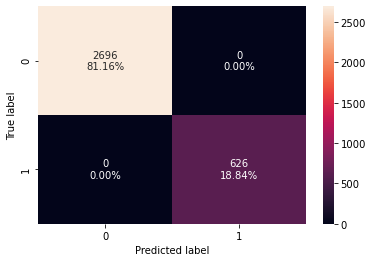

<IPython.core.display.Javascript object>

In [121]:
# Confusion matrix for training dataset
confusion_matrix(decision_tree, x_train, y_train)

#### Check Performance on Testing

In [122]:
# Calculate the model metrics for testing dataset
tree_metrics_test = model_metrics(decision_tree, x_test, y_test)
tree_metrics_test

Accuracy    Recall  Precision        F1
0  0.893333  0.742537   0.705674  0.723636

<IPython.core.display.Javascript object>

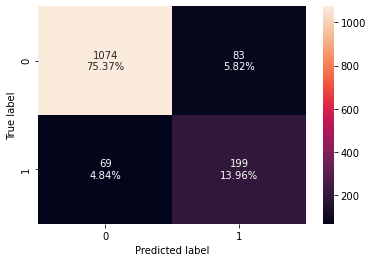

<IPython.core.display.Javascript object>

In [123]:
# Confusion matrix for testing dataset
confusion_matrix(decision_tree, x_test, y_test)

- Based on the result of the default hyperparameters for Decision Tree, we have:
    - Training set has the resut of 100% for Recall and F1 scores.
    - The Recall for testing set is better than Random Forest and Bagging. However, the result is still quite low.
    - Since there is result discrepancy between training and testing, there is a chance that model is overfitting.

### Visualizing Decision Tree

In [124]:
feature_names = x_train.columns.tolist()

<IPython.core.display.Javascript object>

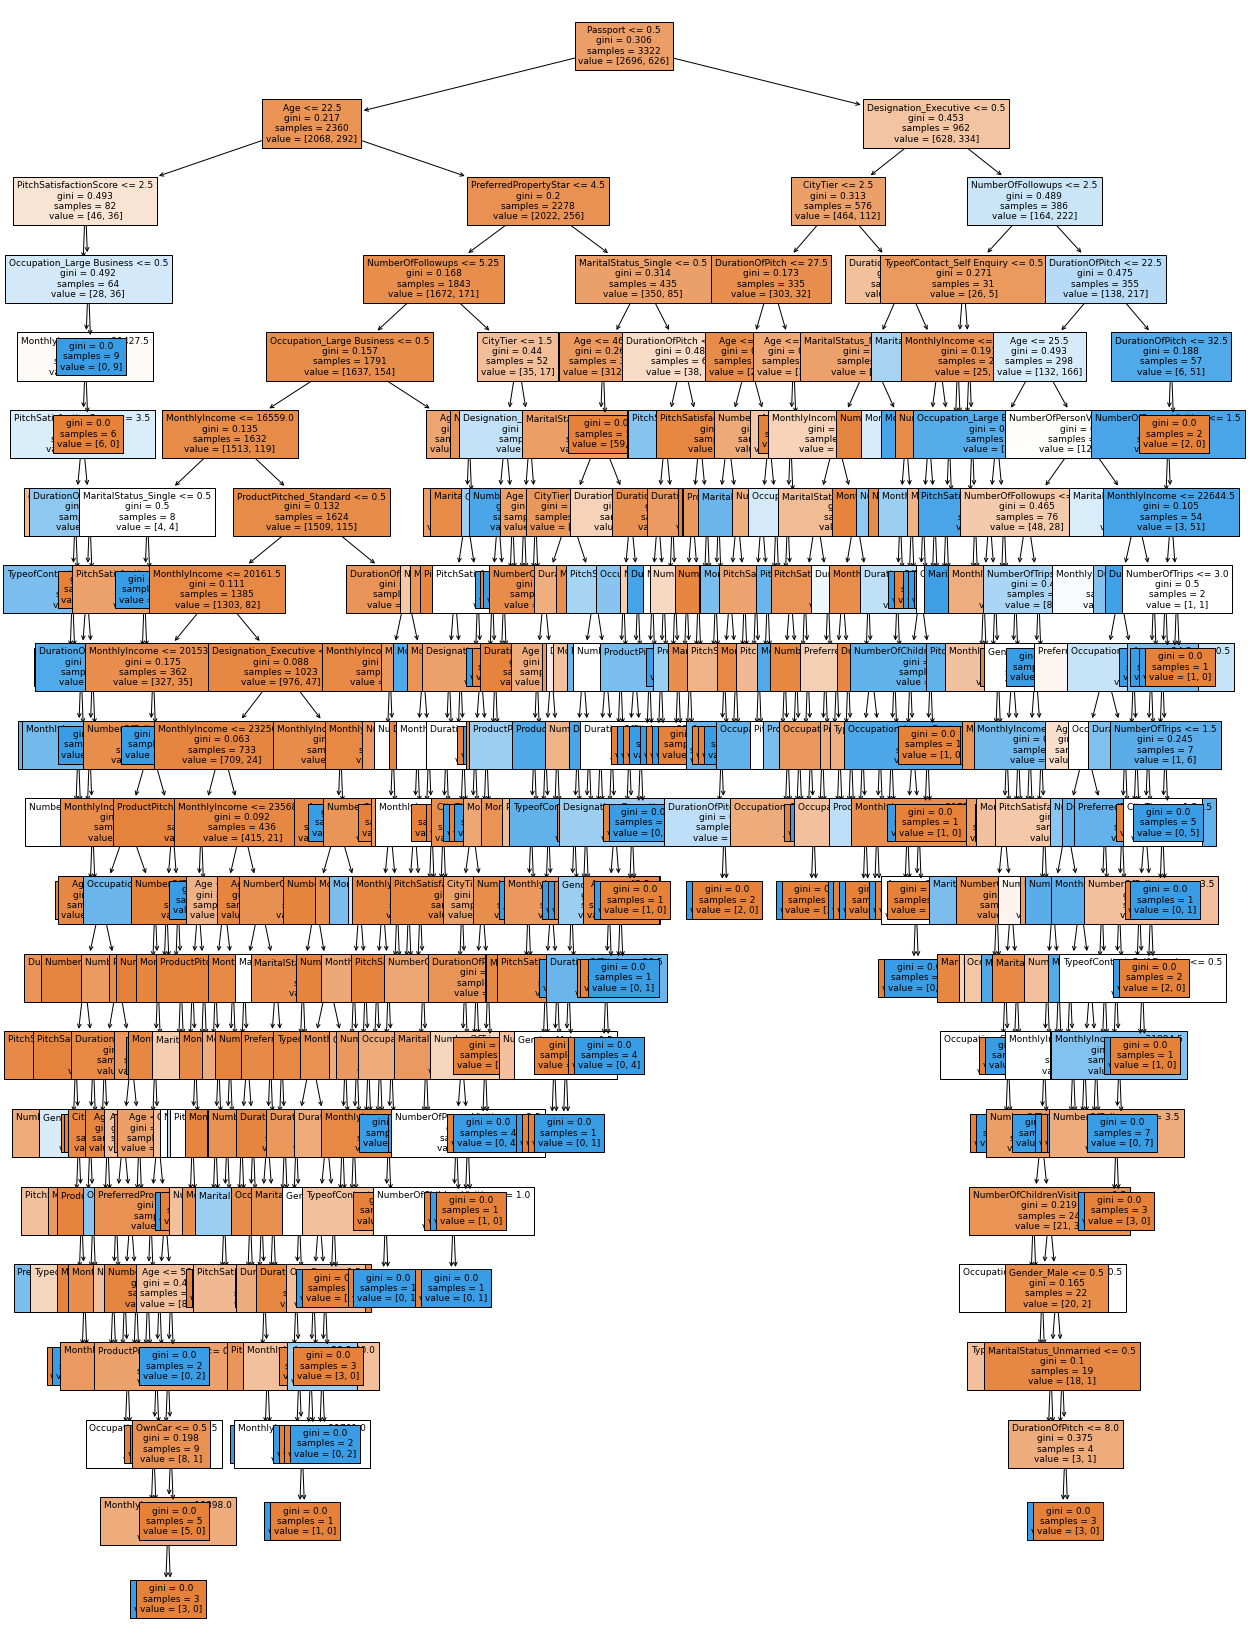

<IPython.core.display.Javascript object>

In [125]:
# plot the model

plt.figure(figsize=(20, 30))
output = tree.plot_tree(
    decision_tree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

# below code will add arrows to the decision tree split if they are missing
for line in output:
    arrow = line.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [126]:
# Text report showing the rules of a decision tree -

print(tree.export_text(decision_tree, feature_names=feature_names, show_weights=True))

|--- Passport <= 0.50
|   |--- Age <= 22.50
|   |   |--- PitchSatisfactionScore <= 2.50
|   |   |   |--- weights: [18.00, 0.00] class: 0
|   |   |--- PitchSatisfactionScore >  2.50
|   |   |   |--- Occupation_Large Business <= 0.50
|   |   |   |   |--- MonthlyIncome <= 21427.50
|   |   |   |   |   |--- PitchSatisfactionScore <= 3.50
|   |   |   |   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |   |   |   |--- Occupation_Salaried <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Occupation_Salaried >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |   |   |--- Gender_Male >  0.50
|   |   |   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |   |--- PitchSatisfactionScore >  3.50
|   |   |   |   |   |   |--- DurationOfPitch <= 20.00
|   |   |   |   |   |   |   |--- TypeofContact_Self Enquiry <= 0.50
|   |   |   |   |   |   |   |   |--- CityTier <= 2.00
|   |   |   

<IPython.core.display.Javascript object>

- The Decision Tree model visualization has many branches, which is very complicated. We would like to trim the branches and keep the important features.

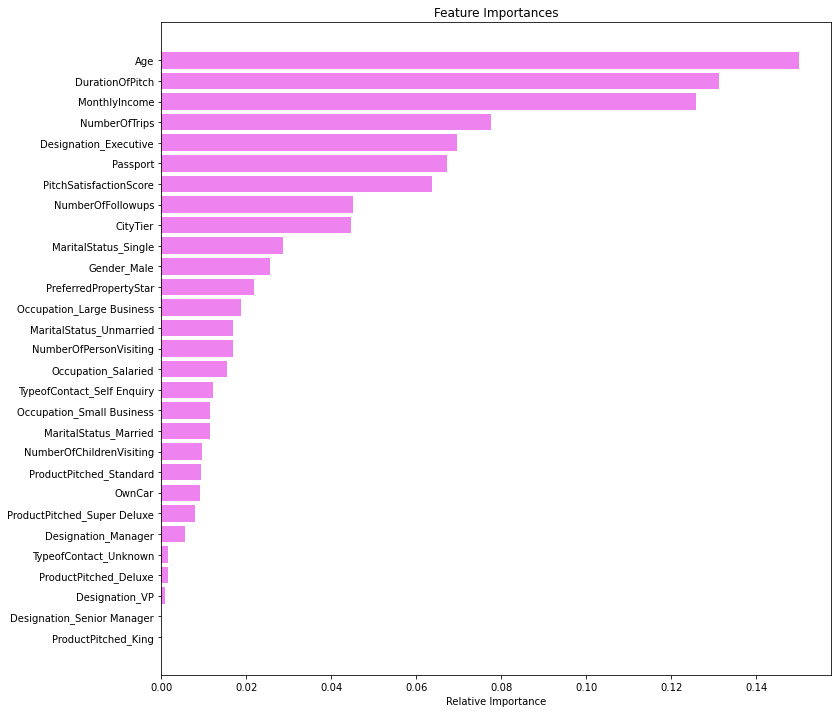

<IPython.core.display.Javascript object>

In [127]:
importances = decision_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Based on the plot, Age is the most important feature that indicates the if the customer is going to buy newly introduced travel package.
- Along with Age, NumberOfTrips, Desgination_Executive, Passport, and PitchSatisfactionScore are also important features.

## Summary on Model Buildings with default hyperparameters

In [128]:
default_hyperparameters = pd.concat(
    [
        bagging_metrics_train.T,
        bagging_metrics_test.T,
        rf_metrics_train.T,
        rf_metrics_test.T,
        tree_metrics_train.T,
        tree_metrics_test.T,
    ],
    axis=1,
)
default_hyperparameters.columns = [
    "bagging_metrics_train",
    "bagging_metrics_test",
    "random_forest_metrics_train",
    "random_forest_metrics_test",
    "tree_metrics_train",
    "tree_metrics_test",
]
default_hyperparameters

bagging_metrics_train  bagging_metrics_test  \
Accuracy                0.994281              0.903860   
Recall                  0.971246              0.630597   
Precision               0.998358              0.816425   
F1                      0.984615              0.711579   

           random_forest_metrics_train  random_forest_metrics_test  \
Accuracy                           1.0                    0.910877   
Recall                             1.0                    0.597015   
Precision                          1.0                    0.893855   
F1                                 1.0                    0.715884   

           tree_metrics_train  tree_metrics_test  
Accuracy                  1.0           0.893333  
Recall                    1.0           0.742537  
Precision                 1.0           0.705674  
F1                        1.0           0.723636

<IPython.core.display.Javascript object>

**Bagging Classifier**
- training set has good Recall and F1 scores, around 0.97 and 0.98 respectively.
- The Recall and F1 scores for testing set however are not good, around 0.63 and 0.71 respectively.
- This indicates an overfitting of the model.


**Random Forest Classifier**
- Trainning dataset has 100% for Recall and F1.
- The results for testing dataset however are not good, worse than Bagging.
- This indicates an overfitting model


**Decision Tree Classifier**
- Training set has the resut of 100% for Recall and F1 scores.
- The Recall for testing set is better than Random Forest and Bagging. However, the result is still quite low.
- Since there is result discrepancy between training and testing, there is a chance that model is overfitting.
- Based on the plot, Age is the most important feature that indicates the if the customer is going to buy newly introduced travel package.
- Along with Age, NumberOfTrips, Desgination_Executive, Passport, and PitchSatisfactionScore are also important features.

## Model performance improvement  - Tuning models

### Tuning Bagging Classifier with GridSearch

- GridSearch is a tool for hyperparameter optimization. The method tries multiple hyperparameter combinations, then choose the best one with the least error score.

In [129]:
# Build the model:
bagging_tuned = BaggingClassifier(random_state=1)
bagging_tuned

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [130]:
# Parameters for tuning:
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

<IPython.core.display.Javascript object>

In [131]:
# Type of scoring used to compare parameter combinations - We will choose Recall
recall_score = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

In [132]:
# Run the grid search
bagging_grid_search = GridSearchCV(
    bagging_tuned, parameters, scoring=recall_score, cv=5
)
bagging_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'max_features': [0.7, 0.8, 0.9, 1],
                         'max_samples': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring=make_scorer(recall_score))

<IPython.core.display.Javascript object>

In [133]:
# Set the grid search object to the best combination of parameters
bagging_tuned = bagging_grid_search.best_estimator_
bagging_tuned

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

<IPython.core.display.Javascript object>

- The best hyperparameter combinations for Bagging using GridSearch are:
    - max_features=0.9
    - max_samples=0.9
    - n_estimators=50

#### Check Performance on Training

In [134]:
# Calculate the model metrics for training dataset
bagging_tuned_metrics_train = model_metrics(bagging_tuned, x_train, y_train)
bagging_tuned_metrics_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

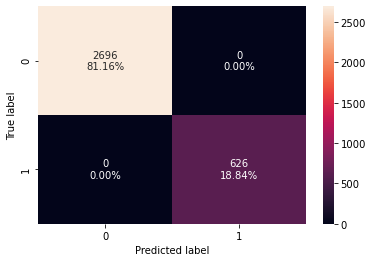

<IPython.core.display.Javascript object>

In [135]:
# Confusion matrix for training dataset
confusion_matrix(bagging_tuned, x_train, y_train)

#### Check Performance on Testing

In [136]:
# Calculate the model metrics for testing dataset
bagging_tuned_metrics_test = model_metrics(bagging_tuned, x_test, y_test)
bagging_tuned_metrics_test

Accuracy   Recall  Precision        F1
0  0.915088  0.63806   0.876923  0.738661

<IPython.core.display.Javascript object>

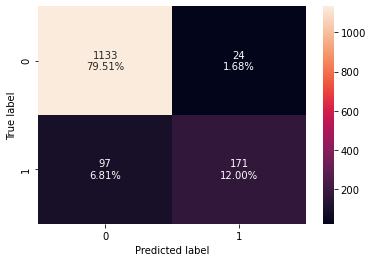

<IPython.core.display.Javascript object>

In [137]:
# Confusion matrix for testing dataset
confusion_matrix(bagging_tuned, x_test, y_test)

- Based on the result of tuning Bagging using GridSearch, we have:
    - The results are 100% for Recall and F1 scores fo training set.
    - The Recall and F1 scores for testing set are not good, with 63.81% and 73.87% respectively.
    - With tuned hyperparameters, the model is still overfitting.

### Tuning Bagging Classifier with weighted base estimator

- Default base estimator for Bagging Classifier is Decision Tree. We now add the weights to the estimator to see if the model improves.
- class_weights: specifies the weights associated with the classes in the form {class_label:weight}. If not given, all classes suppose to have weight one.
- We can choose class_weights={0:0.3,1:0.7} because that is the original imbalance in our data.
 - criterion="gini" is used by default.

In [138]:
bagging_weighted = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(
        criterion="gini", class_weight={0: 0.3, 1: 0.7}, random_state=1
    ),
    random_state=1,
)
bagging_weighted.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.3,
                                                                      1: 0.7},
                                                        random_state=1),
                  random_state=1)

<IPython.core.display.Javascript object>

#### Check Performance on Training

In [139]:
# Calculate the model metrics for training dataset
bagging_weighted_metrics_train = model_metrics(bagging_weighted, x_train, y_train)
bagging_weighted_metrics_train

Accuracy    Recall  Precision        F1
0  0.994582  0.972843   0.998361  0.985437

<IPython.core.display.Javascript object>

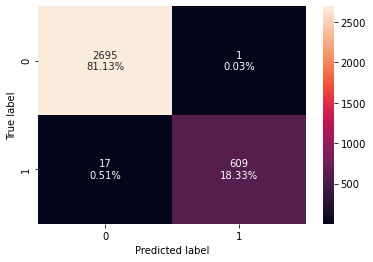

<IPython.core.display.Javascript object>

In [140]:
# Confusion matrix for training dataset
confusion_matrix(bagging_weighted, x_train, y_train)

#### Check Performance on Testing

In [141]:
# Calculate the model metrics for testing dataset
bagging_weighted_metrics_test = model_metrics(bagging_weighted, x_test, y_test)
bagging_weighted_metrics_test

Accuracy    Recall  Precision        F1
0  0.911579  0.615672    0.87766  0.723684

<IPython.core.display.Javascript object>

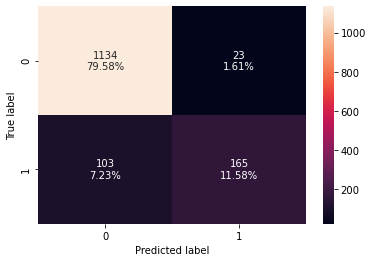

<IPython.core.display.Javascript object>

In [142]:
# Confusion matrix for testing dataset
confusion_matrix(bagging_weighted, x_test, y_test)

- Based on the result of adding weights to the base estimator for Bagging classifier, we have:
    - The Recall and F1 scores for training set are 97.28% and 98.54% respectively.
    - The Recall and F1 scores for testing set however are not good compared to hyperparameter tuning method, with 61.57% and 72.37% respectively.
    - The model is still overfitting.

### Tuning Random Forest classifier with GridSearch

In [143]:
# Build the model
random_forest_tuned = RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [144]:
# Parameters for tuning:
parameters = {
    'n_estimators': [150,200,250],
    'min_samples_leaf': np.arange(5,10),
    'max_features': np.arange(0.2,0.7,0.1),
    'max_samples': np.arange(0.3,0.7,0.1)
}


<IPython.core.display.Javascript object>

In [145]:
# Type of scoring used to compare parameter combinations - We will choose Recall
recall_score = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

In [146]:
# Run the grid search
random_forest_grid_search = GridSearchCV(
    random_forest_tuned, parameters, scoring=recall_score, cv=5
)
random_forest_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_features': array([0.2, 0.3, 0.4, 0.5, 0.6]),
                         'max_samples': array([0.3, 0.4, 0.5, 0.6]),
                         'min_samples_leaf': array([5, 6, 7, 8, 9]),
                         'n_estimators': [150, 200, 250]},
             scoring=make_scorer(recall_score))

<IPython.core.display.Javascript object>

In [147]:
# Set the grid search object to the best combination of parameters
random_forest_tuned = random_forest_grid_search.best_estimator_
random_forest_tuned

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=150, random_state=1)

<IPython.core.display.Javascript object>

- The best hyperparameter combinations for Random Forest with GridSearch are:
    - max_features=0.6
    - max_samples=0.6
    - min_samples_leaf=5
    - n_estimators=150

#### Check Performance on Training

In [148]:
# Calculate the model metrics for training dataset
rf_tuned_metrics_train = model_metrics(random_forest_tuned, x_train, y_train)
rf_tuned_metrics_train

Accuracy    Recall  Precision        F1
0  0.917219  0.595847   0.944304  0.730656

<IPython.core.display.Javascript object>

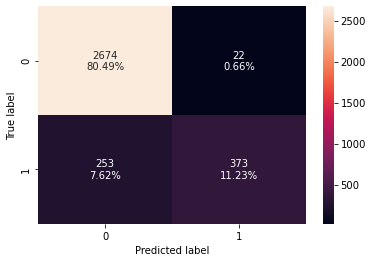

<IPython.core.display.Javascript object>

In [149]:
# Confusion matrix for training dataset
confusion_matrix(random_forest_tuned, x_train, y_train)

#### Check Performance on Testing

In [150]:
# Calculate the model metrics for testing dataset
rf_tuned_metrics_test = model_metrics(random_forest_tuned, x_test, y_test)
rf_tuned_metrics_test

Accuracy   Recall  Precision       F1
0  0.861754  0.38806   0.759124  0.51358

<IPython.core.display.Javascript object>

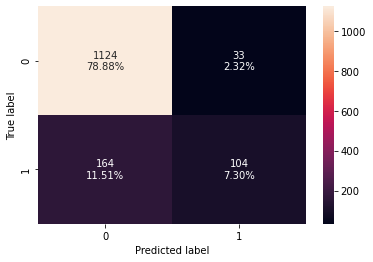

<IPython.core.display.Javascript object>

In [151]:
# Confusion matrix for testing dataset
confusion_matrix(random_forest_tuned, x_test, y_test)

- The following are the results of hyperparameter tuning for Random Forest:
    - The Recall and F1 scores for training set are 59.58% and 73.07% respectively, which are much lower compared to other models.
    - The Recall and F1 scores for testing set are relatively low, with 38.87% and 51.36% respectively.
    - Even though the results are quite low, there are not much difference between training and testing set. This indicates the model is not overfitting, but makes quite mistakes.

### Tuning Random Forest classifier with class_weights

In [152]:
# Build the model
rf_weighted = weighted_random_forest = RandomForestClassifier(random_state=1)


<IPython.core.display.Javascript object>

In [153]:
# Parameters for tuning:
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100, 150, 200, 250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

<IPython.core.display.Javascript object>

In [154]:
# Type of scoring used to compare parameter combinations - We will choose Recall
recall_score = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

In [155]:
# Run the grid search
random_forest_weighted_grid_search = GridSearchCV(
    rf_weighted, parameters, scoring=recall_score, cv=5
)
random_forest_weighted_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'class_weight': [{0: 0.3, 1: 0.7}],
                         'max_features': array([0.2, 0.3, 0.4, 0.5, 0.6]),
                         'max_samples': array([0.3, 0.4, 0.5, 0.6]),
                         'min_samples_leaf': array([5, 6, 7, 8, 9]),
                         'n_estimators': [100, 150, 200, 250]},
             scoring=make_scorer(recall_score))

<IPython.core.display.Javascript object>

In [156]:
# Set the grid search object to the best combination of parameters
rf_weighted = random_forest_weighted_grid_search.best_estimator_
rf_weighted

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7},
                       max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=9,
                       random_state=1)

<IPython.core.display.Javascript object>

- The best hyperparameter combinations for Random Forest classifier with class_weights:
    - max_features=0.6
    - max_samples=0.6
    - min_samples_leaf=9

#### Check Performance on Training

In [157]:
# Calculate the model metrics for training dataset
rf_weighted_metrics_train = model_metrics(rf_weighted, x_train, y_train)
rf_weighted_metrics_train

Accuracy    Recall  Precision        F1
0   0.89404  0.691693   0.731419  0.711002

<IPython.core.display.Javascript object>

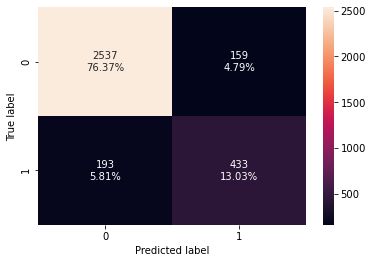

<IPython.core.display.Javascript object>

In [158]:
# Confusion matrix for training dataset
confusion_matrix(rf_weighted, x_train, y_train)

#### Check Performance on Testing

In [159]:
# Calculate the model metrics for testing dataset
rf_weighted_metrics_test = model_metrics(rf_weighted, x_test, y_test)
rf_weighted_metrics_test

Accuracy    Recall  Precision        F1
0  0.842105  0.514925   0.592275  0.550898

<IPython.core.display.Javascript object>

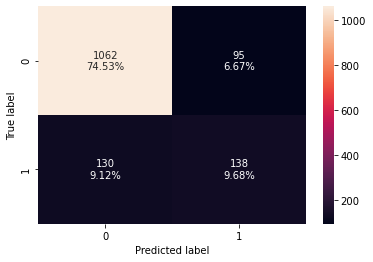

<IPython.core.display.Javascript object>

In [160]:
# Confusion matrix for testing dataset
confusion_matrix(rf_weighted, x_test, y_test)

- The following are the results for tuning Random Forest with class_weights:
    - The Recall and F1 scores are 69.17% and 71.1% for training set.
    - The Recall and F1 scores for testing set are 51.49% and 55.09% respectively.
    - The results overall are not quite good.

### Tuning Decision Tree Classifier - Pre-pruning with GridSearch

In [161]:
# Build the model
decision_tree_tuned = DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [162]:
# Parameters for tuning:
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "max_depth": np.arange(2, 10),
    "min_samples_leaf": [5, 7, 10, 15],
    "max_leaf_nodes": [2, 3, 5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

<IPython.core.display.Javascript object>

In [163]:
# Type of scoring used to compare parameter combinations - We will choose Recall
recall_score = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

In [164]:
# Run the grid search
tree_tuned_grid_search = GridSearchCV(
    decision_tree_tuned, parameters, scoring=recall_score, n_jobs=-1
)
tree_tuned_grid_search = tree_tuned_grid_search.fit(x_train, y_train)

<IPython.core.display.Javascript object>

In [165]:
# Set the grid search object to the best combination of parameters
decision_tree_tuned = tree_tuned_grid_search.best_estimator_
decision_tree_tuned

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=6,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=15, random_state=1)

<IPython.core.display.Javascript object>

- The best hyperparameter combinations for Decision Tree Classifier with GridSearch:
    - max_depth=6
    - max_leaf_nodes=15
    - min_impurity_decrease=0.0001
    - min_samples_leaf=15

#### Check Performance on Training

In [166]:
# Calculate the model metrics for training dataset
tree_tuned_metrics_train = model_metrics(decision_tree_tuned, x_train, y_train)
tree_tuned_metrics_train

Accuracy    Recall  Precision        F1
0  0.829922  0.597444   0.544396  0.569688

<IPython.core.display.Javascript object>

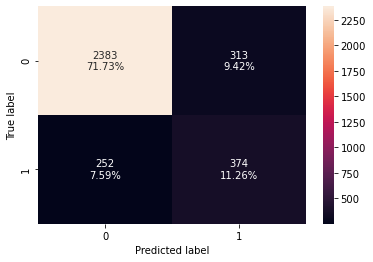

<IPython.core.display.Javascript object>

In [167]:
# Confusion matrix for training dataset
confusion_matrix(decision_tree_tuned, x_train, y_train)

#### Check Performance on Testing

In [168]:
# Calculate the model metrics for testing dataset
tree_tuned_metrics_test = model_metrics(decision_tree_tuned, x_test, y_test)
tree_tuned_metrics_test

Accuracy    Recall  Precision        F1
0  0.804211  0.526119   0.481229  0.502674

<IPython.core.display.Javascript object>

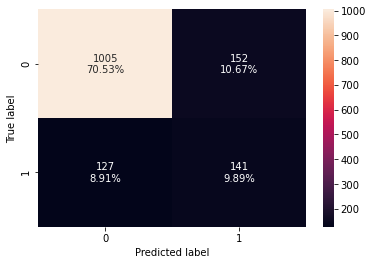

<IPython.core.display.Javascript object>

In [169]:
# Confusion matrix for testing dataset
confusion_matrix(decision_tree_tuned, x_test, y_test)

- The following are the results for tuning Decision Tree Classifier with GridSearch:
    - The Recall and F1 scores for training set are 59.74% and 56.97% respectively.
    - The Recall and F1 scores for testing set are 52.61% and 50.27% respectively.
    - The model is not ovefitting anymore. However, the results are not good.

### Visualizing Tuned Decisision Tree with GridSearch

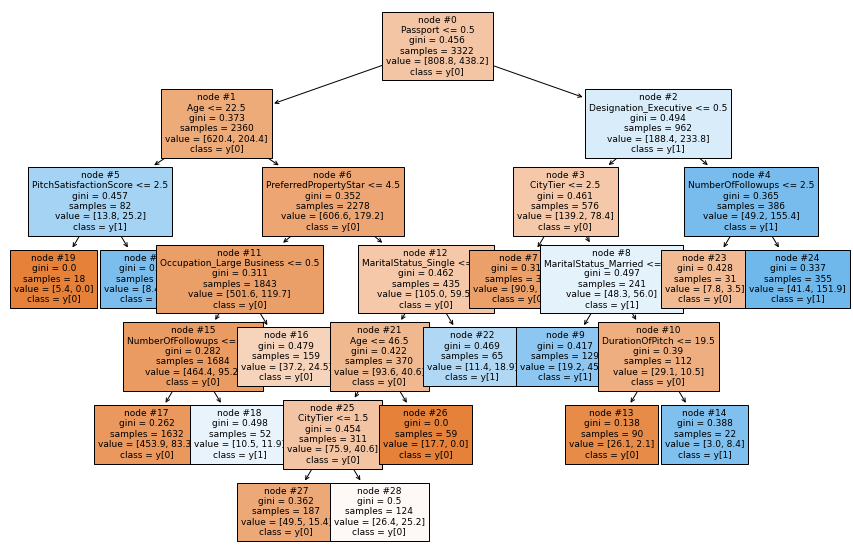

<IPython.core.display.Javascript object>

In [170]:
plt.figure(figsize=(15, 10))

tree.plot_tree(
    decision_tree_tuned,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [171]:
# Text report showing the rules of a decision tree -
print(
    tree.export_text(
        decision_tree_tuned, feature_names=feature_names, show_weights=True
    )
)

|--- Passport <= 0.50
|   |--- Age <= 22.50
|   |   |--- PitchSatisfactionScore <= 2.50
|   |   |   |--- weights: [5.40, 0.00] class: 0
|   |   |--- PitchSatisfactionScore >  2.50
|   |   |   |--- weights: [8.40, 25.20] class: 1
|   |--- Age >  22.50
|   |   |--- PreferredPropertyStar <= 4.50
|   |   |   |--- Occupation_Large Business <= 0.50
|   |   |   |   |--- NumberOfFollowups <= 5.25
|   |   |   |   |   |--- weights: [453.90, 83.30] class: 0
|   |   |   |   |--- NumberOfFollowups >  5.25
|   |   |   |   |   |--- weights: [10.50, 11.90] class: 1
|   |   |   |--- Occupation_Large Business >  0.50
|   |   |   |   |--- weights: [37.20, 24.50] class: 0
|   |   |--- PreferredPropertyStar >  4.50
|   |   |   |--- MaritalStatus_Single <= 0.50
|   |   |   |   |--- Age <= 46.50
|   |   |   |   |   |--- CityTier <= 1.50
|   |   |   |   |   |   |--- weights: [49.50, 15.40] class: 0
|   |   |   |   |   |--- CityTier >  1.50
|   |   |   |   |   |   |--- weights: [26.40, 25.20] class: 0
|   |   

<IPython.core.display.Javascript object>

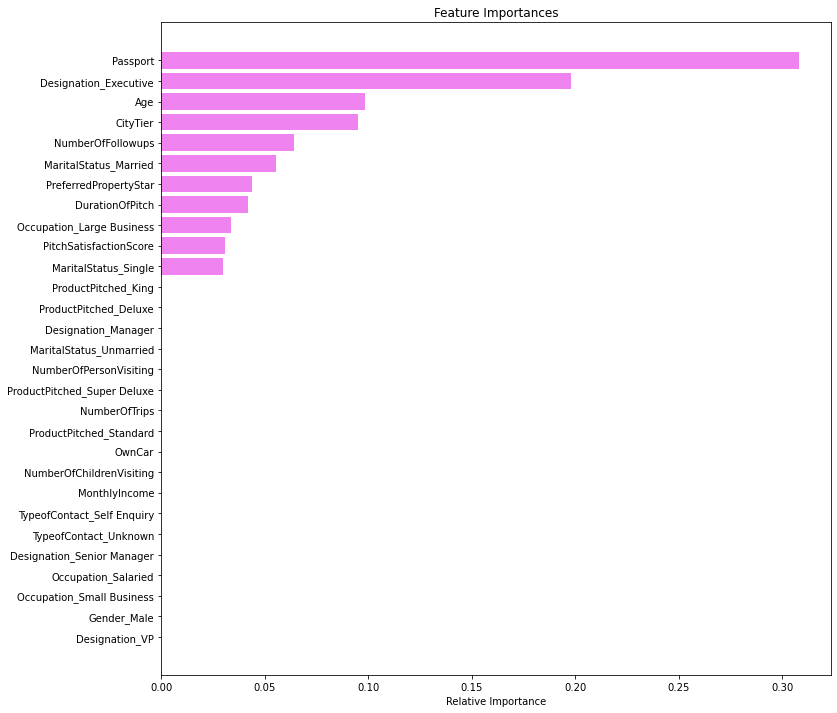

<IPython.core.display.Javascript object>

In [172]:
importances = decision_tree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- With tuning GridSearch method, we see that Passport variable is now the most important feature, followed by Designation_Executive, Age and CityTier variables.

### Tuning Decision Tree - Post-pruning with Cost Complexity Analysis

- For post-pruning, we are going to choose appropriate value of ccp_alpha and remove the less significant sub-tree nodes.

In [173]:
tree_cost_complexity = DecisionTreeClassifier(random_state=1)
path = tree_cost_complexity.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [174]:
pd.DataFrame(path)

ccp_alphas  impurities
0      0.000000    0.000000
1      0.000194    0.000583
2      0.000200    0.001183
3      0.000234    0.002353
4      0.000239    0.003547
5      0.000241    0.004029
6      0.000251    0.005032
7      0.000258    0.005549
8      0.000258    0.006065
9      0.000263    0.007645
10     0.000268    0.008180
11     0.000268    0.008715
12     0.000269    0.009793
13     0.000271    0.010334
14     0.000271    0.010876
15     0.000271    0.011418
16     0.000276    0.011970
17     0.000279    0.013085
18     0.000280    0.013644
19     0.000280    0.014203
20     0.000282    0.014767
21     0.000283    0.015334
22     0.000283    0.015901
23     0.000284    0.016469
24     0.000284    0.017038
25     0.000287    0.017611
26     0.000288    0.018187
27     0.000288    0.018763
28     0.000288    0.019339
29     0.000288    0.019915
30     0.000288    0.020491
31     0.000293    0.021076
32     0.000293    0.022248
33     0.000293    0.022834
34     0.000294    0.023422
35     0.000294    0.024598
36     0.000297    0.025788
37     0.000298    0.026384
38     0.000298    0.026981
39     0.000299    0.027578
40     0.000300    0.028177
41     0.000303    0.028782
42     0.000348    0.029826
43     0.000359    0.030903
44     0.000361    0.031626
45     0.000364    0.032354
46     0.000378    0.033488
47     0.000380    0.034629
48     0.000391    0.035801
49     0.000401    0.036203
50     0.000401    0.036604
51     0.000401    0.037006
52     0.000401    0.037808
53     0.000401    0.038210
54     0.000401    0.038611
55     0.000401    0.039012
56     0.000401    0.039414
57     0.000401    0.039815
58     0.000401    0.040216
59     0.000401    0.040618
60     0.000406    0.041024
61     0.000420    0.042704
62     0.000428    0.043132
63     0.000428    0.043561
64     0.000430    0.044421
65     0.000440    0.046182
66     0.000442    0.046624
67     0.000452    0.047076
68     0.000452    0.047527
69     0.000452    0.047979
70     0.000452    0.048430
71     0.000452    0.048882
72     0.000452    0.049333
73     0.000452    0.049785
74     0.000452    0.050236
75     0.000459    0.050695
76     0.000464    0.051160
77     0.000467    0.051627
78     0.000471    0.052098
79     0.000482    0.052579
80     0.000482    0.053061
81     0.000482    0.053542
82     0.000482    0.054506
83     0.000482    0.054987
84     0.000502    0.055991
85     0.000502    0.056492
86     0.000502    0.056994
87     0.000502    0.057496
88     0.000502    0.057998
89     0.000502    0.059001
90     0.000505    0.061022
91     0.000510    0.062553
92     0.000516    0.063070
93     0.000516    0.063586
94     0.000518    0.064622
95     0.000527    0.065149
96     0.000527    0.065676
97     0.000527    0.066203
98     0.000530    0.067263
99     0.000531    0.069386
100    0.000535    0.069922
101    0.000542    0.070463
102    0.000542    0.071005
103    0.000542    0.071547
104    0.000542    0.072089
105    0.000543    0.073174
106    0.000545    0.074264
107    0.000552    0.074816
108    0.000552    0.075367
109    0.000556    0.078148
110    0.000557    0.078705
111    0.000559    0.079824
112    0.000561    0.080945
113    0.000570    0.081516
114    0.000571    0.082086
115    0.000572    0.083802
116    0.000578    0.084380
117    0.000579    0.084959
118    0.000581    0.086120
119    0.000582    0.089028
120    0.000592    0.089620
121    0.000593    0.090805
122    0.000602    0.091407
123    0.000607    0.093227
124    0.000612    0.094451
125    0.000615    0.098138
126    0.000617    0.098756
127    0.000631    0.099386
128    0.000642    0.100029
129    0.000664    0.103347
130    0.000684    0.104714
131    0.000688    0.105402
132    0.000702    0.108910
133    0.000722    0.109633
134    0.000731    0.110363
135    0.000740    0.111844
136    0.000745    0.114078
137    0.000753    0.117842
138    0.000781    0.118623
139    0.000793    0.120208
140    0.000801    0.122612
141    0.000803    0.123415
1

<IPython.core.display.Javascript object>

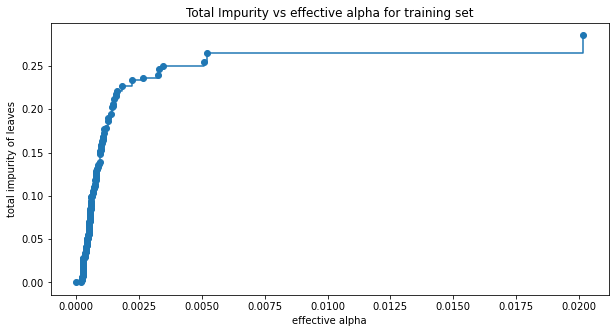

<IPython.core.display.Javascript object>

In [175]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [176]:
tree_cost_complexities = []
for ccp_alpha in ccp_alphas:
    tree_cost_complexity = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    tree_cost_complexity.fit(x_train, y_train)
    tree_cost_complexities.append(tree_cost_complexity)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        tree_cost_complexities[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.020546366248934245


<IPython.core.display.Javascript object>

- The number of nodes in the last tree is 1 because the last value of ccp_alpha is the value that prunes the whole tree, leaving the tree with one node as shown below.

In [177]:
tree_cost_complexities

[DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.00019441099739112984, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.00019993628895866792, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0002340351561506303, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.00023884485940723127, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.00024081878386514143, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0002508528998595224, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0002580201255697945, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0002580201255697945, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0002633955448524985, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.00026757642651682387, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.00026757642651682387, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0002693367977439082, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0002709211318482842, random_s

<IPython.core.display.Javascript object>

- Since the last value has only 1 node, we are going to remove it from the ccp_alpha.

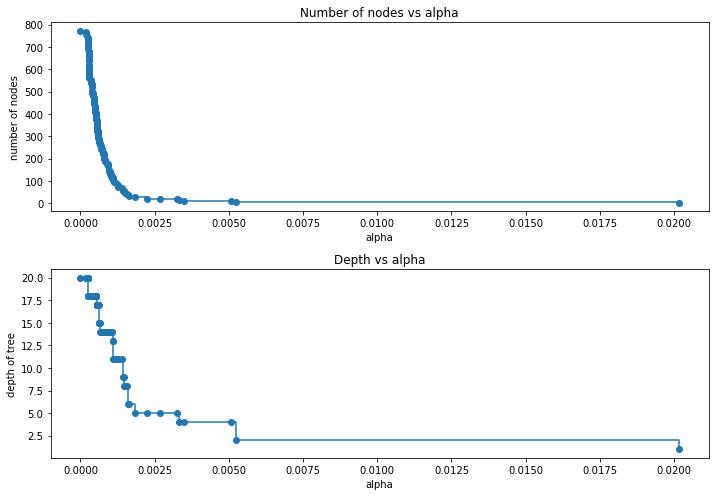

<IPython.core.display.Javascript object>

In [178]:
tree_cost_complexities = tree_cost_complexities[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in tree_cost_complexities]
depth = [clf.tree_.max_depth for clf in tree_cost_complexities]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and testing sets

In [179]:
recall_train = []
for clf in tree_cost_complexities:
    pred_train3 = clf.predict(x_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [180]:
recall_test = []
for clf in tree_cost_complexities:
    pred_test = clf.predict(x_test)
    values_test = metrics.recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

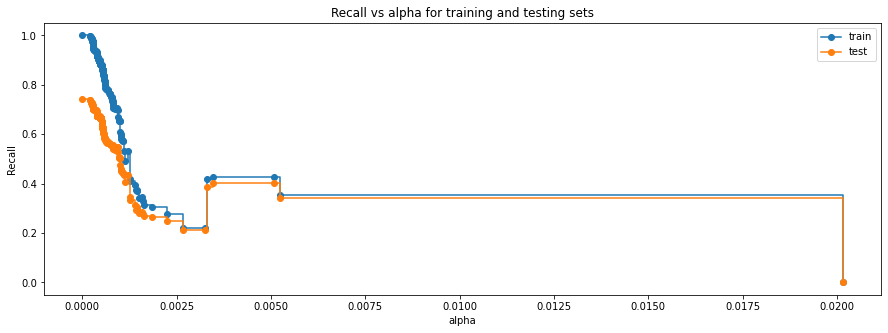

<IPython.core.display.Javascript object>

In [181]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

- The maximum of alpha is 0.021. However, having alpha of 0.0053 is ideal since the information can be retained.

In [182]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
tree_cost_complex_model = tree_cost_complexities[index_best_model]
print(tree_cost_complex_model)

DecisionTreeClassifier(random_state=1)


<IPython.core.display.Javascript object>

#### Check Performance on Training

In [183]:
# Calculate the model metrics for training dataset
tree_cost_complex_metrics_train = model_metrics(
    tree_cost_complex_model, x_train, y_train
)
tree_cost_complex_metrics_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

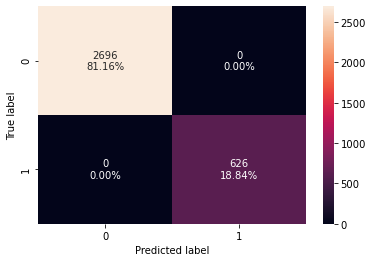

<IPython.core.display.Javascript object>

In [184]:
# Confusion matrix for training dataset
confusion_matrix(tree_cost_complex_model, x_train, y_train)

#### Check Performance on Testing

In [185]:
# Calculate the model metrics for testing dataset
tree_cost_complex_metrics_test = model_metrics(tree_cost_complex_model, x_test, y_test)
tree_cost_complex_metrics_test

Accuracy    Recall  Precision        F1
0  0.893333  0.742537   0.705674  0.723636

<IPython.core.display.Javascript object>

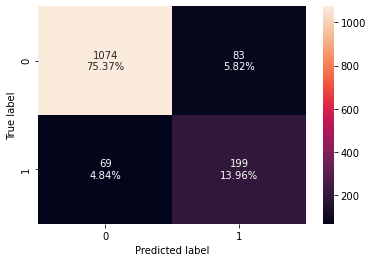

<IPython.core.display.Javascript object>

In [186]:
# Confusion matrix for testing dataset
confusion_matrix(tree_cost_complex_model, x_test, y_test)

- Based on the result of Decision Tree with post-pruning Cost Complexity, we have:
    - The Recall and F1 scores are 100% in the training set.
    - The Recall and F1 scores in the testing set are 74.25% and 72.36% respectively.
- The results of testing set are better compared to other models. However, this still shows an overfitting model.

#### Visualizing Decision Tree Post-pruning Cost Complexity

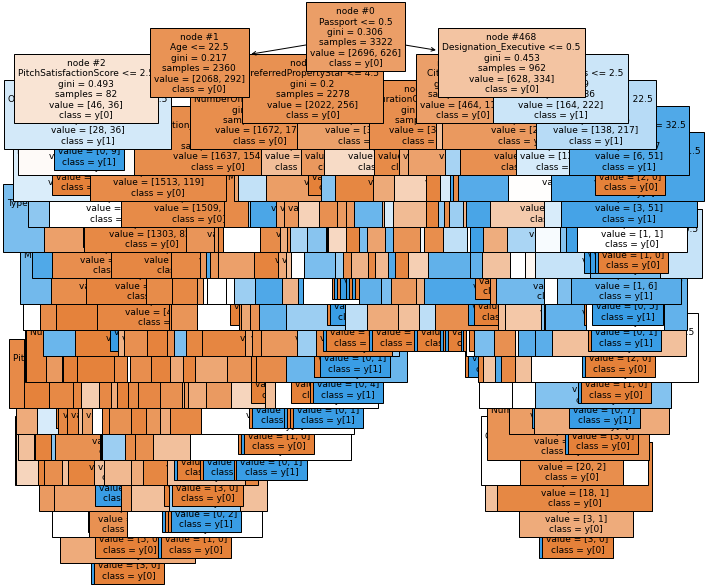

<IPython.core.display.Javascript object>

In [187]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    tree_cost_complex_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [188]:
# Text report showing the rules of a decision tree -
print(
    tree.export_text(
        tree_cost_complex_model, feature_names=feature_names, show_weights=True
    )
)

|--- Passport <= 0.50
|   |--- Age <= 22.50
|   |   |--- PitchSatisfactionScore <= 2.50
|   |   |   |--- weights: [18.00, 0.00] class: 0
|   |   |--- PitchSatisfactionScore >  2.50
|   |   |   |--- Occupation_Large Business <= 0.50
|   |   |   |   |--- MonthlyIncome <= 21427.50
|   |   |   |   |   |--- PitchSatisfactionScore <= 3.50
|   |   |   |   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |   |   |   |--- Occupation_Salaried <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Occupation_Salaried >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |   |   |--- Gender_Male >  0.50
|   |   |   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |   |--- PitchSatisfactionScore >  3.50
|   |   |   |   |   |   |--- DurationOfPitch <= 20.00
|   |   |   |   |   |   |   |--- TypeofContact_Self Enquiry <= 0.50
|   |   |   |   |   |   |   |   |--- CityTier <= 2.00
|   |   |   

<IPython.core.display.Javascript object>

In [189]:
# importance of features in the tree building, is also known as Gini importance
print(
    pd.DataFrame(
        tree_cost_complex_model.feature_importances_,
        columns=["Imp"],
        index=x_train.columns,
    ).sort_values(by="Imp", ascending=False)
)

                                  Imp
Age                          0.149965
DurationOfPitch              0.131285
MonthlyIncome                0.125814
NumberOfTrips                0.077517
Designation_Executive        0.069702
Passport                     0.067175
PitchSatisfactionScore       0.063612
NumberOfFollowups            0.045043
CityTier                     0.044654
MaritalStatus_Single         0.028679
Gender_Male                  0.025558
PreferredPropertyStar        0.021807
Occupation_Large Business    0.018757
MaritalStatus_Unmarried      0.016953
NumberOfPersonVisiting       0.016942
Occupation_Salaried          0.015564
TypeofContact_Self Enquiry   0.012101
Occupation_Small Business    0.011596
MaritalStatus_Married        0.011523
NumberOfChildrenVisiting     0.009545
ProductPitched_Standard      0.009506
OwnCar                       0.009157
ProductPitched_Super Deluxe  0.008014
Designation_Manager          0.005514
TypeofContact_Unknown        0.001640
ProductPitch

<IPython.core.display.Javascript object>

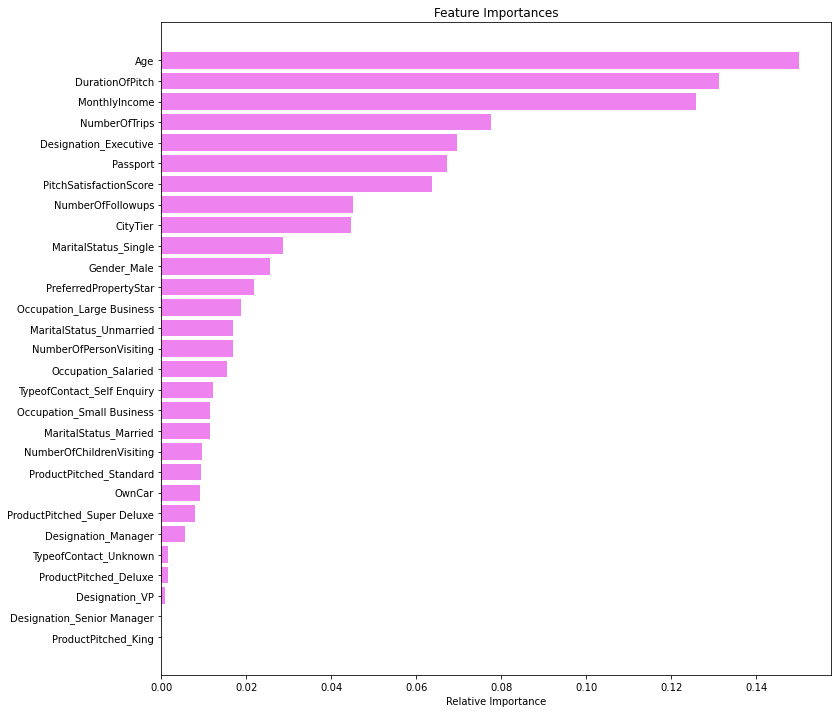

<IPython.core.display.Javascript object>

In [190]:
importances = tree_cost_complex_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- After post-pruning cost complexity analysis, three most important features are: Age, DurationOfPitch and MonthlyIncome.

## Summary on Model performance improvements

In [191]:
# Models with default hyperparameters
default_hyperparameters

bagging_metrics_train  bagging_metrics_test  \
Accuracy                0.994281              0.903860   
Recall                  0.971246              0.630597   
Precision               0.998358              0.816425   
F1                      0.984615              0.711579   

           random_forest_metrics_train  random_forest_metrics_test  \
Accuracy                           1.0                    0.910877   
Recall                             1.0                    0.597015   
Precision                          1.0                    0.893855   
F1                                 1.0                    0.715884   

           tree_metrics_train  tree_metrics_test  
Accuracy                  1.0           0.893333  
Recall                    1.0           0.742537  
Precision                 1.0           0.705674  
F1                        1.0           0.723636

<IPython.core.display.Javascript object>

In [192]:
# Models with tuned hyperparameters
tuned_hyperparameters = pd.concat(
    [
        bagging_tuned_metrics_train.T,
        bagging_tuned_metrics_test.T,
        bagging_weighted_metrics_train.T,
        bagging_weighted_metrics_test.T,
        rf_tuned_metrics_train.T,
        rf_tuned_metrics_test.T,
        rf_weighted_metrics_train.T,
        rf_weighted_metrics_test.T,
        tree_tuned_metrics_train.T,
        tree_tuned_metrics_test.T,
        tree_cost_complex_metrics_train.T,
        tree_cost_complex_metrics_test.T,
    ],
    axis=1,
)
tuned_hyperparameters.columns = [
    "bagging_tuned_metrics_train",
    "bagging_tuned_metrics_test",
    "bagging_weighted_metrics_train",
    "bagging_weighted_metrics_test",
    "rf_tuned_metrics_train",
    "rf_tuned_metrics_test",
    "rf_weighted_metrics_train",
    "rf_weighted_metrics_test",
    "tree_tuned_metrics_train",
    "tree_tuned_metrics_test",
    "tree_cost_complex_metrics_train",
    "tree_cost_complex_metrics_test",
]
tuned_hyperparameters

bagging_tuned_metrics_train  bagging_tuned_metrics_test  \
Accuracy                           1.0                    0.915088   
Recall                             1.0                    0.638060   
Precision                          1.0                    0.876923   
F1                                 1.0                    0.738661   

           bagging_weighted_metrics_train  bagging_weighted_metrics_test  \
Accuracy                         0.994582                       0.911579   
Recall                           0.972843                       0.615672   
Precision                        0.998361                       0.877660   
F1                               0.985437                       0.723684   

           rf_tuned_metrics_train  rf_tuned_metrics_test  \
Accuracy                 0.917219               0.861754   
Recall                   0.595847               0.388060   
Precision                0.944304               0.759124   
F1                       0.730656               0.513580   

           rf_weighted_metrics_train  rf_weighted_metrics_test  \
Accuracy                    0.894040                  0.842105   
Recall                      0.691693                  0.514925   
Precision                   0.731419                  0.592275   
F1                          0.711002                  0.550898   

           tree_tuned_metrics_train  tree_tuned_metrics_test  \
Accuracy                   0.829922                 0.804211   
Recall                     0.597444                 0.526119   
Precision                  0.544396                 0.481229   
F1                         0.569688                 0.502674   

           tree_cost_complex_metrics_train  tree_cost_complex_metrics_test  
Accuracy                               1.0                        0.893333  
Recall                                 1.0                        0.742537  
Precision                              1.0                        0.705674  
F1                                     1.0                        0.723636

<IPython.core.display.Javascript object>

**<h2>Bagging Classifier</h2>**

***Tuning Bagging Classifier with GridSearch***
- The results are 100% for Recall and F1 scores fo training set.
- The Recall and F1 scores for testing set are not good, with 63.81% and 73.87% respectively.
- With tuned hyperparameters, the model is still overfitting.

***Tuning Bagging Classifier with weighted Decision Tree base estimator***
- The Recall and F1 scores for training set are 97.28% and 98.54% respectively.
- The Recall and F1 scores for testing set however are not good compared to hyperparameter tuning method, with 61.57% and 72.37% respectively.
- The model is still overfitting.

**<h2>Random Forest classifier</h2>**

***Tuning Random Forest classifier with GridSearch***
- The Recall and F1 scores for training set are 59.58% and 73.07% respectively, which are much lower compared to other models.
- The Recall and F1 scores for testing set are relatively low, with 38.87% and 51.36% respectively.
- Even though the results are quite low, there are not much difference between training and testing set. This indicates the model is not overfitting, but makes quite mistakes.

***Tuning Random Forest classifier with class_weights***
- The Recall and F1 scores are 69.17% and 71.1% for training set.
- The Recall and F1 scores for testing set are 51.49% and 55.09% respectively.
- The results overall are not quite good.

**<h2>Decision Tree Classifier</h2>**

***Tuning Decision Tree Classifier - Pre-pruning with GridSearch***
- The Recall and F1 scores for training set are 59.74% and 56.97% respectively.
- The Recall and F1 scores for testing set are 52.61% and 50.27% respectively.
- The model is not ovefitting anymore. However, the results are not good.
- With tuning GridSearch method, we see that Passport variable is now the most important feature, followed by Designation_Executive, Age and CityTier variables.

***Tuning Decision Tree - Post-pruning with Cost Complexity Analysis***
- The Recall and F1 scores are 100% in the training set.
- The Recall and F1 scores in the testing set are 74.25% and 72.36% respectively.
- The results of testing set are better compared to other models. However, this still shows an overfitting model.
- After post-pruning cost complexity analysis, three most important features are: Age, DurationOfPitch and MonthlyIncome.

**<h2>---- Choose the best model ----</h2>**
- By comparing models between default and tuned hyperparameters, Decision Tree Classifier with default hyperparameter and post-pruning cost complexity yield the same and best result, with Recall is 74.25% and F1 is 72.36%.

## Boosting Models with default hyperparameters

## Boosting model 1 - AdaBoost Classifier

In [193]:
# Build the model
ada_boost = AdaBoostClassifier(random_state=1)
ada_boost.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Check Performance on Training

In [194]:
# Calculate the model metrics for training dataset
ada_boost_metrics_train = model_metrics(ada_boost, x_train, y_train)
ada_boost_metrics_train

Accuracy   Recall  Precision        F1
0    0.8528  0.34984   0.727575  0.472492

<IPython.core.display.Javascript object>

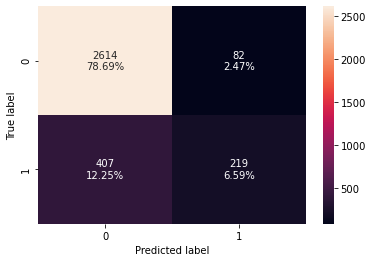

<IPython.core.display.Javascript object>

In [195]:
# Confusion matrix for training dataset
confusion_matrix(ada_boost, x_train, y_train)

#### Check Performance on Testing

In [196]:
# Calculate the model metrics for testing dataset
ada_boost_metrics_test = model_metrics(ada_boost, x_test, y_test)
ada_boost_metrics_test

Accuracy   Recall  Precision        F1
0  0.841404  0.30597   0.672131  0.420513

<IPython.core.display.Javascript object>

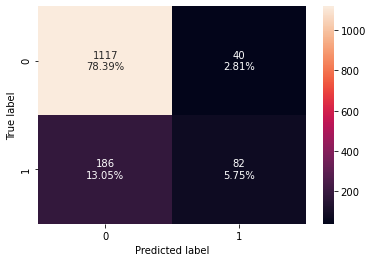

<IPython.core.display.Javascript object>

In [197]:
# Confusion matrix for testing dataset
confusion_matrix(ada_boost, x_test, y_test)

- The following are the results of AdaBoost with default hyperparameters:
    - The Recall and F1 scores for training set are 34.98% and 47.25%
    - The Recall and F1 scores for testing set are 30.59% and 42.05%
- The results of the model are significantly low.

## Boosting model 2 - Gradient Boosting Classifier

In [198]:
# Build the model
gradient_boost = GradientBoostingClassifier(random_state=1)
gradient_boost.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Check Performance on Training

In [199]:
# Calculate the model metrics for training dataset
gradient_boost_metrics_train = model_metrics(gradient_boost, x_train, y_train)
gradient_boost_metrics_train

Accuracy    Recall  Precision        F1
0  0.891331  0.490415   0.879656  0.629744

<IPython.core.display.Javascript object>

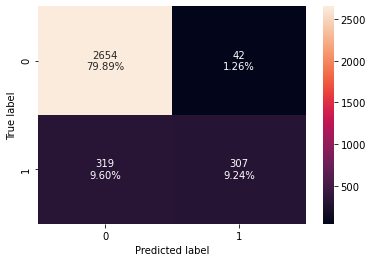

<IPython.core.display.Javascript object>

In [200]:
# Confusion matrix for training dataset
confusion_matrix(gradient_boost, x_train, y_train)

#### Check Performance on Testing

In [201]:
# Calculate the model metrics for testing dataset
gradient_boost_metrics_test = model_metrics(gradient_boost, x_test, y_test)
gradient_boost_metrics_test

Accuracy    Recall  Precision       F1
0  0.860351  0.399254   0.737931  0.51816

<IPython.core.display.Javascript object>

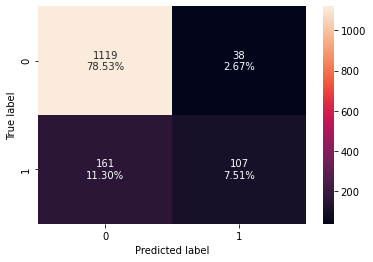

<IPython.core.display.Javascript object>

In [202]:
# Confusion matrix for testing dataset
confusion_matrix(gradient_boost, x_test, y_test)

- The following are the results of Gradient Boosting with default hyperparameters:
    - The results of Recall and F1 scores for training set are 49.04% and 62.97%.
    - The Recall and F1 scores for testing set are 39.93% and 51.82%.
- The result of the model is better thatn AdaBoost, but still quite low.

## Boosting model 3 - XGBoost Classifier

In [203]:
# Build the model
xg_boost = XGBClassifier(random_state=1, eval_metric="logloss")
xg_boost.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

#### Check Performance on Training

In [204]:
# Calculate the model metrics for training dataset
xg_boost_metrics_train = model_metrics(xg_boost, x_train, y_train)
xg_boost_metrics_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

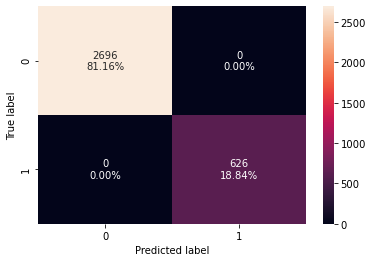

<IPython.core.display.Javascript object>

In [205]:
# Confusion matrix for training dataset
confusion_matrix(xg_boost, x_train, y_train)

#### Check Performance on Testing

In [206]:
# Calculate the model metrics for testing dataset
xg_boost_metrics_test = model_metrics(xg_boost, x_test, y_test)
xg_boost_metrics_test

Accuracy    Recall  Precision        F1
0  0.923509  0.686567   0.880383  0.771488

<IPython.core.display.Javascript object>

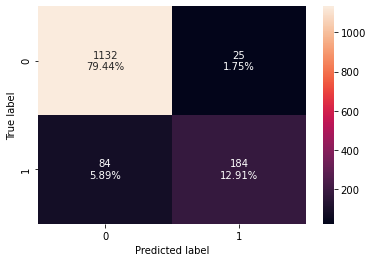

<IPython.core.display.Javascript object>

In [207]:
# Confusion matrix for testing dataset
confusion_matrix(xg_boost, x_test, y_test)

- The following are the results ofr XGBoost with default hyperparameters:
    - The Recall and F1 scores for training set are 100%
    - The Recall and F1 scores for testing set are 68.66% and 77.15%.
- The results of XGBoost are better than AdaBoost and GradientBoost.

## Boosting model 4 - Stacking model with default hyperparameters

- We are going to use stacking model with the boosting models that have default hyperparameters, then use XGBoost to get the final prediction.
- Then, we're going to use stacking with tuned boosting models later.

In [208]:
# Build the model
# Stack two best models from Bagging and Boosting
default_models = [
    ("Default Decision Tree", decision_tree),
    ("Default Gradient Boost", gradient_boost),
]
final_estimator = xg_boost
stacking_classifier = StackingClassifier(
    estimators=default_models, final_estimator=final_estimator
)
stacking_classifier.fit(x_train, y_train)

StackingClassifier(estimators=[('Default Decision Tree',
                                DecisionTreeClassifier(random_state=1)),
                               ('Default Gradient Boost',
                                GradientBoostingClassifier(random_state=1))],
                   final_estimator=XGBClassifier(base_score=0.5,
                                                 booster='gbtree',
                                                 colsample_bylevel=1,
                                                 colsample_bynode=1,
                                                 colsample_bytree=1,
                                                 eval_metric='logloss', gamma=0,
                                                 gpu_id=-1,
                                                 importance_type='gain',
                                                 interaction_constraints='',
                                                 learning_rate=0.300000012,
                           

<IPython.core.display.Javascript object>

#### Check Performance on Training

In [209]:
# Calculate the model metrics for training dataset
stacking_metrics_train = model_metrics(stacking_classifier, x_train, y_train)
stacking_metrics_train

Accuracy    Recall  Precision        F1
0  0.939494  0.736422   0.927565  0.821015

<IPython.core.display.Javascript object>

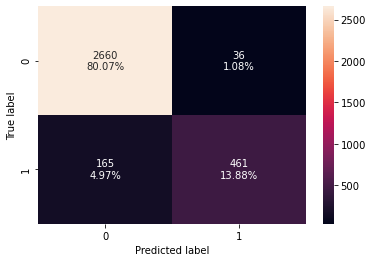

<IPython.core.display.Javascript object>

In [210]:
# Confusion matrix for training dataset
confusion_matrix(stacking_classifier, x_train, y_train)

#### Check Performance on Testing

In [211]:
# Calculate the model metrics for testing dataset
stacking_metrics_test = model_metrics(stacking_classifier, x_test, y_test)
stacking_metrics_test

Accuracy    Recall  Precision        F1
0  0.872982  0.552239   0.708134  0.620545

<IPython.core.display.Javascript object>

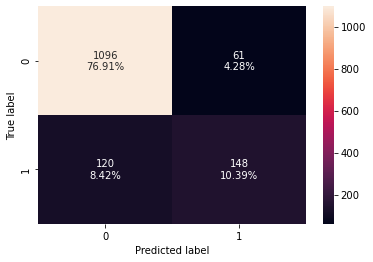

<IPython.core.display.Javascript object>

In [212]:
# Confusion matrix for testing dataset
confusion_matrix(stacking_classifier, x_test, y_test)

- The following are the results of Stacking model with default hyperparameters:
    - The Recall and F1 scores for training set are 73.64% and 82.10%.
    - The Recall and F1 scores for testing set are 55.22% and 62.05%.
- The results of Stacking model are generally low.

## Summary on Boosting Model Buildings with default hyperparameters

In [213]:
boosting_default_hyperparameters = pd.concat(
    [
        ada_boost_metrics_train.T,
        ada_boost_metrics_test.T,
        gradient_boost_metrics_train.T,
        gradient_boost_metrics_test.T,
        xg_boost_metrics_train.T,
        xg_boost_metrics_test.T,
        stacking_metrics_train.T,
        stacking_metrics_test.T,
    ],
    axis=1,
)
boosting_default_hyperparameters.columns = [
    "ada_boost_metrics_train",
    "ada_boost_metrics_test",
    "gradient_boost_metrics_train",
    "gradient_boost_metrics_test",
    "xg_boost_metrics_train",
    "xg_boost_metrics_test",
    "stacking_metrics_train",
    "stacking_metrics_test",
]
boosting_default_hyperparameters

ada_boost_metrics_train  ada_boost_metrics_test  \
Accuracy                  0.852800                0.841404   
Recall                    0.349840                0.305970   
Precision                 0.727575                0.672131   
F1                        0.472492                0.420513   

           gradient_boost_metrics_train  gradient_boost_metrics_test  \
Accuracy                       0.891331                     0.860351   
Recall                         0.490415                     0.399254   
Precision                      0.879656                     0.737931   
F1                             0.629744                     0.518160   

           xg_boost_metrics_train  xg_boost_metrics_test  \
Accuracy                      1.0               0.923509   
Recall                        1.0               0.686567   
Precision                     1.0               0.880383   
F1                            1.0               0.771488   

           stacking_metrics_train  stacking_metrics_test  
Accuracy                 0.939494               0.872982  
Recall                   0.736422               0.552239  
Precision                0.927565               0.708134  
F1                       0.821015               0.620545

<IPython.core.display.Javascript object>

**AdaBoost Classifier**
- The Recall and F1 scores for training set are 34.98% and 47.25%
- The Recall and F1 scores for testing set are 30.59% and 42.05%
- The results of the model are significantly low.


**Gradient Boosting Classifier**
- The results of Recall and F1 scores for training set are 49.04% and 62.97%.
- The Recall and F1 scores for testing set are 39.93% and 51.82%.
- The result of the model is better thatn AdaBoost, but still quite low.


**XGBoost Classifier**
- The Recall and F1 scores for training set are 100%
- The Recall and F1 scores for testing set are 68.66% and 77.15%.
- The results of XGBoost are better than AdaBoost and GradientBoost.


**Stacking Classifier**
- The Recall and F1 scores for training set are 73.64% and 82.10%.
- The Recall and F1 scores for testing set are 55.22% and 62.05%.
- The results of Stacking model are generally low.

## Model performance improvement - Tuning Boosting models

### Tuning Model 1 - AdaBoost Classifier with GridSearch hyperparameters

In [214]:
# Build the model
ada_tuned = AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [215]:
# Parameters for tuning
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}


<IPython.core.display.Javascript object>

In [216]:
# Type of scoring used to compare parameter combinations - We will choose Recall
recall_score = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

In [217]:
# Run the grid search
ada_grid_search = GridSearchCV(ada_tuned, parameters, scoring=recall_score, cv=5)

# Fit the best algorithm to the data.
ada_grid_search = ada_grid_search.fit(x_train, y_train)

<IPython.core.display.Javascript object>

In [218]:
# Set the grid search object to the best combination of parameters
ada_tuned = ada_grid_search.best_estimator_
ada_tuned

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.5000000000000002, n_estimators=100,
                   random_state=1)

<IPython.core.display.Javascript object>

- The best combination of parameters for Tuned AdaBoost are:
    - learning_rate=1.5
    - n_estimators=100

#### Check Performance on Training

In [219]:
# Calculate the model metrics for training dataset
ada_tuned_metrics_train = model_metrics(ada_tuned, x_train, y_train)
ada_tuned_metrics_train

Accuracy    Recall  Precision        F1
0  0.991872  0.966454    0.99018  0.978173

<IPython.core.display.Javascript object>

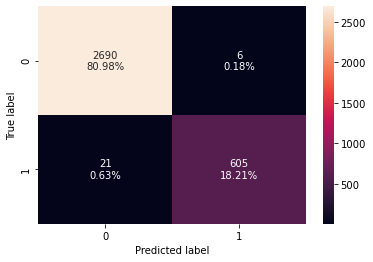

<IPython.core.display.Javascript object>

In [220]:
# Confusion matrix for training dataset
confusion_matrix(ada_tuned, x_train, y_train)

#### Check Performance on Testing

In [221]:
# Calculate the model metrics for testing dataset
ada_tuned_metrics_test = model_metrics(ada_tuned, x_test, y_test)
ada_tuned_metrics_test

Accuracy    Recall  Precision       F1
0  0.865263  0.578358   0.662393  0.61753

<IPython.core.display.Javascript object>

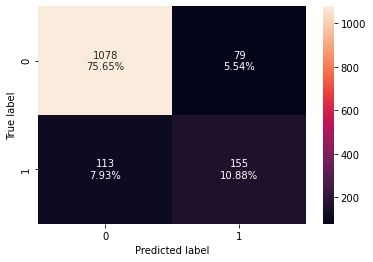

<IPython.core.display.Javascript object>

In [222]:
# Confusion matrix for testing dataset
confusion_matrix(ada_tuned, x_test, y_test)

- The following are the results of Tuned AdaBoost with GridSearch:
    - The Recall and F1 scores for training set are 96.65% and 97.82%
    - The Recall and F1 scores for testing set are 57.84% and 61.75%

#### Check feature importance

In [223]:
# importance of features in the tree building
print(
    pd.DataFrame(
        ada_tuned.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                  Imp
MonthlyIncome                0.285915
Age                          0.140680
DurationOfPitch              0.139285
NumberOfTrips                0.055795
NumberOfFollowups            0.046324
PitchSatisfactionScore       0.035116
PreferredPropertyStar        0.032168
Passport                     0.028942
CityTier                     0.027838
TypeofContact_Self Enquiry   0.020596
MaritalStatus_Single         0.019427
Designation_Senior Manager   0.016381
NumberOfChildrenVisiting     0.016023
Designation_Executive        0.015965
Occupation_Large Business    0.014168
OwnCar                       0.012562
Occupation_Salaried          0.012453
ProductPitched_Super Deluxe  0.012374
NumberOfPersonVisiting       0.011724
MaritalStatus_Unmarried      0.011212
Gender_Male                  0.011182
ProductPitched_Deluxe        0.010339
MaritalStatus_Married        0.009170
Occupation_Small Business    0.006336
ProductPitched_Standard      0.004433
Designation_

<IPython.core.display.Javascript object>

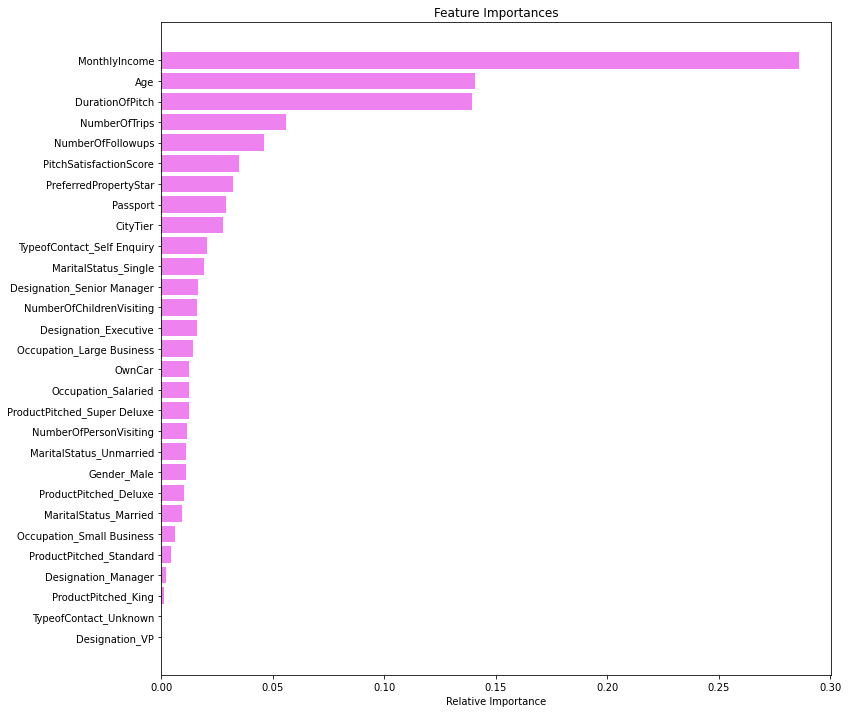

<IPython.core.display.Javascript object>

In [224]:
feature_names = x_train.columns
importances = ada_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The most important feature in tuned AdaBoost is MonthlyIncome, followed by Age and DurationOfPitch.

### Tuning Model 2 - Gradient Boosting Classifier with GridSearch hyperparameters

In [225]:
# Build the model
gradient_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

<IPython.core.display.Javascript object>

In [226]:
# Parameters for tuning
parameters = {
    "n_estimators": np.arange(50, 200, 25),
    "subsample": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "max_depth": [3, 5, 7, 10],
}

<IPython.core.display.Javascript object>

In [227]:
# Type of scoring used to compare parameter combinations - We will choose Recall
recall_score = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

In [228]:
# Run the grid search
gradient_grid_search = GridSearchCV(
    gradient_tuned, parameters, scoring=recall_score, cv=5
)

# Fit the best algorithm to the data.
gradient_grid_search = gradient_grid_search.fit(x_train, y_train)

<IPython.core.display.Javascript object>

In [229]:
# Set the grid search object to the best combination of parameters
gradient_tuned = gradient_grid_search.best_estimator_
gradient_tuned

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_depth=10, max_features=0.9, n_estimators=175,
                           random_state=1, subsample=0.9)

<IPython.core.display.Javascript object>

- The best parameter combinations are:
    - max_depth=10
    - max_features=0.9
    - n_estimators=175
    - subsample=0.9

#### Check Performance on Training

In [230]:
# Calculate the model metrics for training dataset
gradient_tuned_metrics_train = model_metrics(gradient_tuned, x_train, y_train)
gradient_tuned_metrics_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

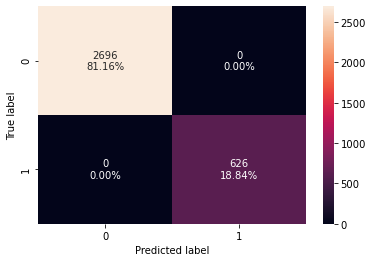

<IPython.core.display.Javascript object>

In [231]:
# Confusion matrix for training dataset
confusion_matrix(gradient_tuned, x_train, y_train)

#### Check Performance on Testing

In [232]:
# Calculate the model metrics for testing dataset
gradient_tuned_metrics_test = model_metrics(gradient_tuned, x_test, y_test)
gradient_tuned_metrics_test

Accuracy    Recall  Precision   F1
0  0.932632  0.716418    0.90566  0.8

<IPython.core.display.Javascript object>

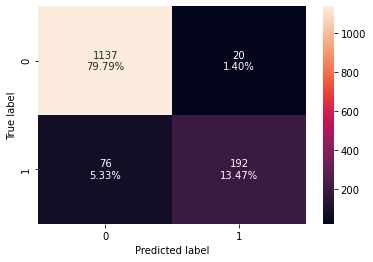

<IPython.core.display.Javascript object>

In [233]:
# Confusion matrix for testing dataset
confusion_matrix(gradient_tuned, x_test, y_test)

- The following are the results of Tuned Gradient Boost with GridSearch:
    - The Recall and F1 scores for training set are 100%
    - The Recall and F1 scores for testing set are 71.64% and 80%.
- The results of Tuned Gradient Boost are better than tuned AdaBoost. However, the results are note quite good.

#### Check feature importance

In [234]:
# importance of features in the tree building
print(
    pd.DataFrame(
        gradient_tuned.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                  Imp
Age                          0.149108
MonthlyIncome                0.134276
DurationOfPitch              0.128983
Designation_Executive        0.066960
NumberOfTrips                0.064568
Passport                     0.063312
PitchSatisfactionScore       0.063092
NumberOfFollowups            0.048993
CityTier                     0.043177
PreferredPropertyStar        0.029664
MaritalStatus_Single         0.022848
Occupation_Large Business    0.019116
NumberOfPersonVisiting       0.018369
Gender_Male                  0.017906
MaritalStatus_Married        0.017905
TypeofContact_Self Enquiry   0.017116
NumberOfChildrenVisiting     0.014720
Occupation_Small Business    0.014500
MaritalStatus_Unmarried      0.014228
OwnCar                       0.011871
Occupation_Salaried          0.010586
ProductPitched_Deluxe        0.005632
Designation_Manager          0.005269
ProductPitched_Super Deluxe  0.005069
Designation_Senior Manager   0.004369
ProductPitch

<IPython.core.display.Javascript object>

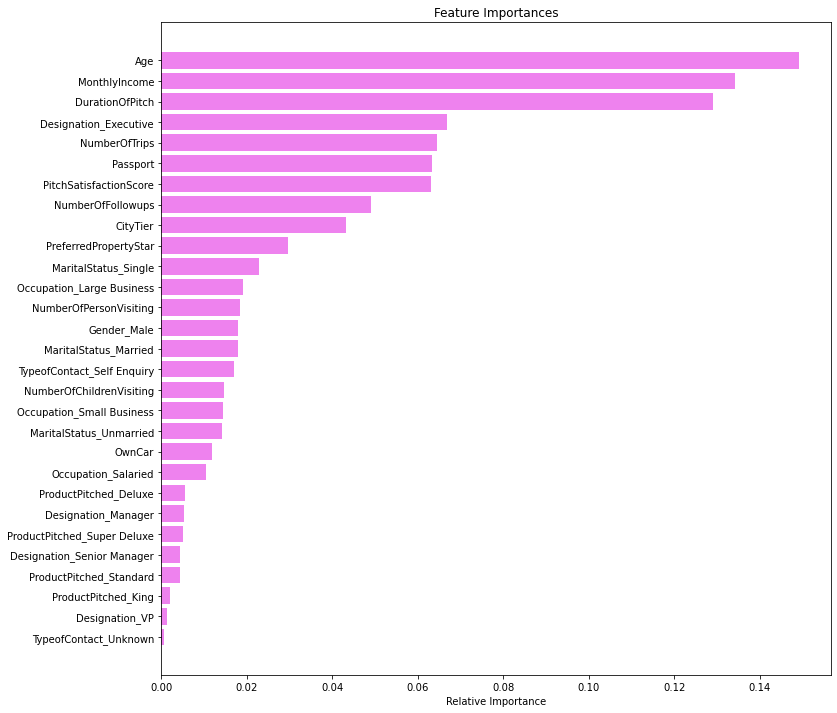

<IPython.core.display.Javascript object>

In [235]:
feature_names = x_train.columns
importances = gradient_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The most important feature in Gradient Boost is Age, followed by MonthlyIncome and DurationOfPitch.

### Tuning Model 3 - XGBoost Classifier with GridSearch hyperparameters

In [236]:
# Build the model
xgboost_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

<IPython.core.display.Javascript object>

In [237]:
# Parameters for tuning
parameters = {
    "n_estimators": [10, 30, 50],
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": [0.05, 0.1, 0.2],
    "colsample_bytree": [0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 1],
}

<IPython.core.display.Javascript object>

In [238]:
# Type of scoring used to compare parameter combinations - We will choose Recall
recall_score = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

In [239]:
# Run the grid search
xgboost_grid_search = GridSearchCV(
    xgboost_tuned, parameters, scoring=recall_score, cv=5
)

# Fit the best algorithm to the data.
xgboost_grid_search = xgboost_grid_search.fit(x_train, y_train)

<IPython.core.display.Javascript object>

In [240]:
# Set the grid search object to the best combination of parameters
xgboost_tuned = xgboost_grid_search.best_estimator_
xgboost_tuned

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

- The best combination of parameters are:
    - n_estimators=50
    - scale_pos_weight=5
    - subsample=0.9
    - learning_rate=0.1
    - colsample_bylevel=0.7
    - colsample_bytree=0.7

#### Check Performance on Training

In [241]:
# Calculate the model metrics for training dataset
xgboost_tuned_metrics_train = model_metrics(xgboost_tuned, x_train, y_train)
xgboost_tuned_metrics_train

Accuracy    Recall  Precision        F1
0   0.93528  0.960064   0.759798  0.848271

<IPython.core.display.Javascript object>

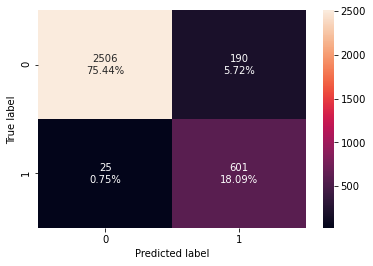

<IPython.core.display.Javascript object>

In [242]:
# Confusion matrix for training dataset
confusion_matrix(xgboost_tuned, x_train, y_train)

#### Check Performance on Testing

In [243]:
# Calculate the model metrics for testing dataset
xgboost_tuned_metrics_test = model_metrics(xgboost_tuned, x_test, y_test)
xgboost_tuned_metrics_test

Accuracy    Recall  Precision        F1
0   0.86807  0.768657   0.620482  0.686667

<IPython.core.display.Javascript object>

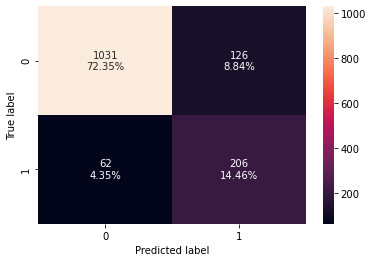

<IPython.core.display.Javascript object>

In [244]:
# Confusion matrix for testing dataset
confusion_matrix(xgboost_tuned, x_test, y_test)

- The following are the results of Tuned XGBoost with GridSearch:
    - The Recall and F1 scores for training set are 96% and 84.83%
    - The Recall and F1 scores for testing set are 76.87% and 68.67%
- Tuned XGBoost is better compared to tuned Gradient and AdaBoost.

#### Check feature importance

In [245]:
# importance of features in the tree building
print(
    pd.DataFrame(
        xgboost_tuned.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                  Imp
Passport                     0.160875
Designation_Executive        0.097580
ProductPitched_Standard      0.049446
MaritalStatus_Single         0.047653
MaritalStatus_Married        0.042021
CityTier                     0.040125
Occupation_Large Business    0.037121
PreferredPropertyStar        0.036544
ProductPitched_Super Deluxe  0.031379
NumberOfFollowups            0.030871
ProductPitched_King          0.030581
Age                          0.030482
PitchSatisfactionScore       0.028203
DurationOfPitch              0.027626
MonthlyIncome                0.027558
Designation_VP               0.026220
Designation_Manager          0.025742
NumberOfTrips                0.025350
MaritalStatus_Unmarried      0.025278
ProductPitched_Deluxe        0.025229
Occupation_Salaried          0.024384
Occupation_Small Business    0.023677
Gender_Male                  0.021083
TypeofContact_Self Enquiry   0.019860
OwnCar                       0.019105
NumberOfPers

<IPython.core.display.Javascript object>

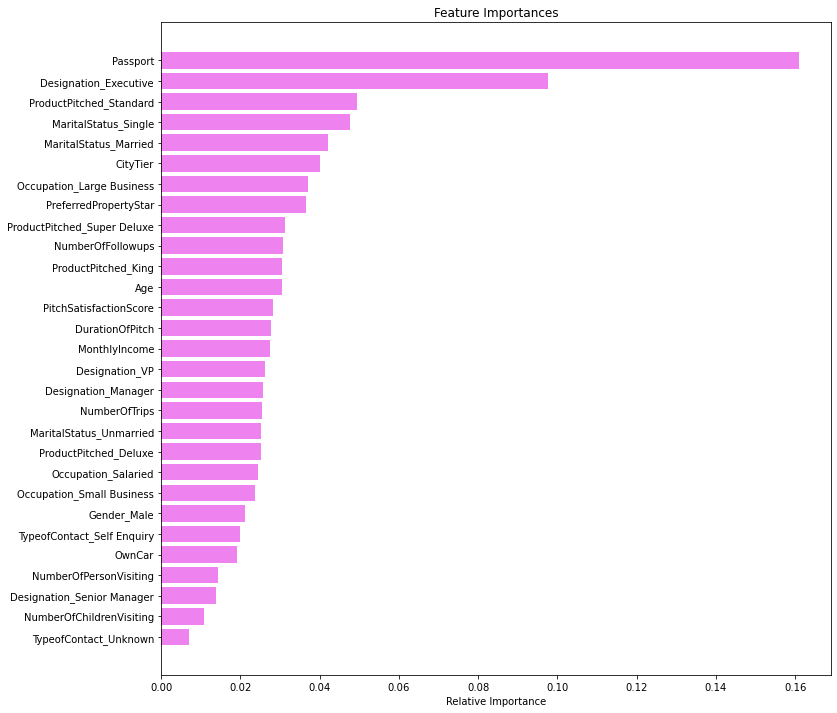

<IPython.core.display.Javascript object>

In [246]:
feature_names = x_train.columns
importances = xgboost_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The most important feature for tuned XGBoost is Passport, followed by Designation_Executive and ProductPitched_Standard.

### Tuning Model 4 - Stacking Model with tuned models

In [247]:
# Build the model
# Stack two best models from Bagging and Boosting
tuned_models = [
    ("Tuned Bagging with GridSearch", bagging_tuned),
    ("Tuned Decision Tree with Cost-complexity", tree_cost_complex_model),
    ("Tuned Gradient Boost", gradient_tuned),
]
tuned_final_estimator = xgboost_tuned
tuned_stacking_classifier = StackingClassifier(
    estimators=tuned_models, final_estimator=tuned_final_estimator
)
tuned_stacking_classifier.fit(x_train, y_train)

StackingClassifier(estimators=[('Tuned Bagging with GridSearch',
                                BaggingClassifier(max_features=0.9,
                                                  max_samples=0.9,
                                                  n_estimators=50,
                                                  random_state=1)),
                               ('Tuned Decision Tree with Cost-complexity',
                                DecisionTreeClassifier(random_state=1)),
                               ('Tuned Gradient Boost',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_depth=10,
                                                           max_features=0.9,
                                                           n_esti...
                                                 eval_metric='logloss', gamma=0,
                                                 gpu_id=-1,


<IPython.core.display.Javascript object>

#### Check Performance on Training

In [248]:
# Calculate the model metrics for training dataset
stacking_tuned_metrics_train = model_metrics(
    tuned_stacking_classifier, x_train, y_train
)
stacking_tuned_metrics_train

Accuracy  Recall  Precision        F1
0  0.999398     1.0   0.996815  0.998405

<IPython.core.display.Javascript object>

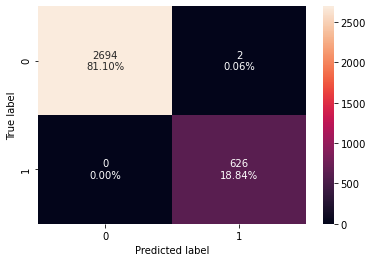

<IPython.core.display.Javascript object>

In [249]:
# Confusion matrix for training dataset
confusion_matrix(tuned_stacking_classifier, x_train, y_train)

#### Check Performance on Testing

In [250]:
# Calculate the model metrics for testing dataset
stacking_tuned_metrics_test = model_metrics(tuned_stacking_classifier, x_test, y_test)
stacking_tuned_metrics_test

Accuracy    Recall  Precision       F1
0  0.898246  0.899254   0.671309  0.76874

<IPython.core.display.Javascript object>

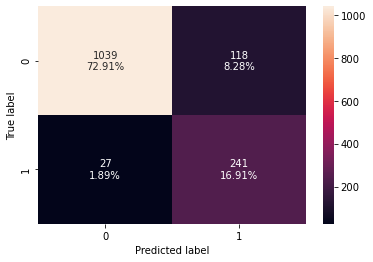

<IPython.core.display.Javascript object>

In [251]:
# Confusion matrix for testing dataset
confusion_matrix(tuned_stacking_classifier, x_test, y_test)

- The following are the results of Tuned Stacking model:
    - The Recall and F1 scores for training set are 100% and 99.84% respectively.
    - The Recall and F1 scores for testing set are 89.93% and 76.87% respectively.
- The results for tuned Stacking model is better than other models.

# Summary on Boosting Model Buildings with hyperparameters tuning

In [252]:
boosting_tuned_hyperparameters = pd.concat(
    [
        ada_tuned_metrics_train.T,
        ada_tuned_metrics_test.T,
        gradient_tuned_metrics_train.T,
        gradient_tuned_metrics_test.T,
        xgboost_tuned_metrics_train.T,
        xgboost_tuned_metrics_test.T,
        stacking_tuned_metrics_train.T,
        stacking_tuned_metrics_test.T,
    ],
    axis=1,
)
boosting_tuned_hyperparameters.columns = [
    "ada_tuned_metrics_train",
    "ada_tuned_metrics_test",
    "gradient_tuned_metrics_train",
    "gradient_tuned_metrics_test",
    "xgboost_tuned_metrics_train",
    "xgboost_tuned_metrics_test",
    "stacking_tuned_metrics_train",
    "stacking_tuned_metrics_test",
]
boosting_tuned_hyperparameters

ada_tuned_metrics_train  ada_tuned_metrics_test  \
Accuracy                  0.991872                0.865263   
Recall                    0.966454                0.578358   
Precision                 0.990180                0.662393   
F1                        0.978173                0.617530   

           gradient_tuned_metrics_train  gradient_tuned_metrics_test  \
Accuracy                            1.0                     0.932632   
Recall                              1.0                     0.716418   
Precision                           1.0                     0.905660   
F1                                  1.0                     0.800000   

           xgboost_tuned_metrics_train  xgboost_tuned_metrics_test  \
Accuracy                      0.935280                    0.868070   
Recall                        0.960064                    0.768657   
Precision                     0.759798                    0.620482   
F1                            0.848271                    0.686667   

           stacking_tuned_metrics_train  stacking_tuned_metrics_test  
Accuracy                       0.999398                     0.898246  
Recall                         1.000000                     0.899254  
Precision                      0.996815                     0.671309  
F1                             0.998405                     0.768740

<IPython.core.display.Javascript object>

**AdaBoost Tuned with GridSearch**
- The Recall and F1 scores for training set are 96.65% and 97.82%
- The Recall and F1 scores for testing set are 57.84% and 61.75%
- The most important feature in tuned AdaBoost is MonthlyIncome, followed by Age and DurationOfPitch.


**Gradient Boosting Tuned with GridSearch**
- The Recall and F1 scores for training set are 100%
- The Recall and F1 scores for testing set are 71.64% and 80%.
- The results of Tuned Gradient Boost are better than tuned AdaBoost. However, the results are note quite good.
- The most important feature in Gradient Boost is Age, followed by MonthlyIncome and DurationOfPitch.


**XGBoost Tuned with GridSearch**
- The Recall and F1 scores for training set are 96% and 84.83%
- The Recall and F1 scores for testing set are 76.87% and 68.67%
- Tuned XGBoost is better compared to tuned Gradient and AdaBoost.
- The most important feature for tuned XGBoost is Passport, followed by Designation_Executive and ProductPitched_Standard.


**Stacking Model Tuned with GridSearch**
- The Recall and F1 scores for training set are 100% and 99.84% respectively.
- The Recall and F1 scores for testing set are 89.93% and 76.87% respectively.
- The results for tuned Stacking model is better than other models.


# Comparing all models

## Training models comparison

In [254]:
training_models_df = pd.concat(
    [
        bagging_metrics_train.T,
        rf_metrics_train.T,
        tree_metrics_train.T,
        bagging_tuned_metrics_train.T,
        bagging_weighted_metrics_train.T,
        rf_tuned_metrics_train.T,
        rf_weighted_metrics_train.T,
        tree_tuned_metrics_train.T,
        tree_cost_complex_metrics_train.T,
        ada_boost_metrics_train.T,
        gradient_boost_metrics_train.T,
        xg_boost_metrics_train.T,
        stacking_metrics_train.T,
        ada_tuned_metrics_train.T,
        gradient_tuned_metrics_train.T,
        xgboost_tuned_metrics_train.T,
        stacking_tuned_metrics_train.T,
    ],
    axis=1,
)
training_models_df.columns = [
    "bagging_metrics_train",
    "rf_metrics_train",
    "tree_metrics_train",
    "bagging_tuned_metrics_train",
    "bagging_weighted_metrics_train",
    "rf_tuned_metrics_train",
    "rf_weighted_metrics_train",
    "tree_tuned_metrics_train",
    "tree_cost_complex_metrics_train",
    "ada_boost_metrics_train",
    "gradient_boost_metrics_train",
    "xg_boost_metrics_train",
    "stacking_metrics_train",
    "ada_tuned_metrics_train",
    "gradient_tuned_metrics_train",
    "xgboost_tuned_metrics_train",
    "stacking_tuned_metrics_train",
]
training_models_df

bagging_metrics_train  rf_metrics_train  tree_metrics_train  \
Accuracy                0.994281               1.0                 1.0   
Recall                  0.971246               1.0                 1.0   
Precision               0.998358               1.0                 1.0   
F1                      0.984615               1.0                 1.0   

           bagging_tuned_metrics_train  bagging_weighted_metrics_train  \
Accuracy                           1.0                        0.994582   
Recall                             1.0                        0.972843   
Precision                          1.0                        0.998361   
F1                                 1.0                        0.985437   

           rf_tuned_metrics_train  rf_weighted_metrics_train  \
Accuracy                 0.917219                   0.894040   
Recall                   0.595847                   0.691693   
Precision                0.944304                   0.731419   
F1                       0.730656                   0.711002   

           tree_tuned_metrics_train  tree_cost_complex_metrics_train  \
Accuracy                   0.829922                              1.0   
Recall                     0.597444                              1.0   
Precision                  0.544396                              1.0   
F1                         0.569688                              1.0   

           ada_boost_metrics_train  gradient_boost_metrics_train  \
Accuracy                  0.852800                      0.891331   
Recall                    0.349840                      0.490415   
Precision                 0.727575                      0.879656   
F1                        0.472492                      0.629744   

           xg_boost_metrics_train  stacking_metrics_train  \
Accuracy                      1.0                0.939494   
Recall                        1.0                0.736422   
Precision                     1.0                0.927565   
F1                            1.0                0.821015   

           ada_tuned_metrics_train  gradient_tuned_metrics_train  \
Accuracy                  0.991872                           1.0   
Recall                    0.966454                           1.0   
Precision                 0.990180                           1.0   
F1                        0.978173                           1.0   

           xgboost_tuned_metrics_train  stacking_tuned_metrics_train  
Accuracy                      0.935280                      0.999398  
Recall                        0.960064                      1.000000  
Precision                     0.759798                      0.996815  
F1                            0.848271                      0.998405

<IPython.core.display.Javascript object>

## Testing models comparison

In [255]:
testing_models_df = pd.concat(
    [
        bagging_metrics_test.T,
        rf_metrics_test.T,
        tree_metrics_test.T,
        bagging_tuned_metrics_test.T,
        bagging_weighted_metrics_test.T,
        rf_tuned_metrics_test.T,
        rf_weighted_metrics_test.T,
        tree_tuned_metrics_test.T,
        tree_cost_complex_metrics_test.T,
        ada_boost_metrics_test.T,
        gradient_boost_metrics_test.T,
        xg_boost_metrics_test.T,
        stacking_metrics_test.T,
        ada_tuned_metrics_test.T,
        gradient_tuned_metrics_test.T,
        xgboost_tuned_metrics_test.T,
        stacking_tuned_metrics_test.T,
    ],
    axis=1,
)
testing_models_df.columns = [
    "bagging_metrics_test",
    "rf_metrics_test",
    "tree_metrics_test",
    "bagging_tuned_metrics_test",
    "bagging_weighted_metrics_test",
    "rf_tuned_metrics_test",
    "rf_weighted_metrics_test",
    "tree_tuned_metrics_test",
    "tree_cost_complex_metrics_test",
    "ada_boost_metrics_test",
    "gradient_boost_metrics_test",
    "xg_boost_metrics_test",
    "stacking_metrics_test",
    "ada_tuned_metrics_test",
    "gradient_tuned_metrics_test",
    "xgboost_tuned_metrics_test",
    "stacking_tuned_metrics_test",
]
testing_models_df

bagging_metrics_test  rf_metrics_test  tree_metrics_test  \
Accuracy               0.903860         0.910877           0.893333   
Recall                 0.630597         0.597015           0.742537   
Precision              0.816425         0.893855           0.705674   
F1                     0.711579         0.715884           0.723636   

           bagging_tuned_metrics_test  bagging_weighted_metrics_test  \
Accuracy                     0.915088                       0.911579   
Recall                       0.638060                       0.615672   
Precision                    0.876923                       0.877660   
F1                           0.738661                       0.723684   

           rf_tuned_metrics_test  rf_weighted_metrics_test  \
Accuracy                0.861754                  0.842105   
Recall                  0.388060                  0.514925   
Precision               0.759124                  0.592275   
F1                      0.513580                  0.550898   

           tree_tuned_metrics_test  tree_cost_complex_metrics_test  \
Accuracy                  0.804211                        0.893333   
Recall                    0.526119                        0.742537   
Precision                 0.481229                        0.705674   
F1                        0.502674                        0.723636   

           ada_boost_metrics_test  gradient_boost_metrics_test  \
Accuracy                 0.841404                     0.860351   
Recall                   0.305970                     0.399254   
Precision                0.672131                     0.737931   
F1                       0.420513                     0.518160   

           xg_boost_metrics_test  stacking_metrics_test  \
Accuracy                0.923509               0.872982   
Recall                  0.686567               0.552239   
Precision               0.880383               0.708134   
F1                      0.771488               0.620545   

           ada_tuned_metrics_test  gradient_tuned_metrics_test  \
Accuracy                 0.865263                     0.932632   
Recall                   0.578358                     0.716418   
Precision                0.662393                     0.905660   
F1                       0.617530                     0.800000   

           xgboost_tuned_metrics_test  stacking_tuned_metrics_test  
Accuracy                     0.868070                     0.898246  
Recall                       0.768657                     0.899254  
Precision                    0.620482                     0.671309  
F1                           0.686667                     0.768740

<IPython.core.display.Javascript object>

- Overall, majority of the models are overfitting the training data.
- The best model is tuned Stacking model with 89.93% for Recall and 76.87% for F1 score. However, the training data is overfitting.
- The second best model is tuned XGBoost model with 76.87% for Recall and 68.67% for F1 score. The model has more generalized performance and is not overfitting.

# Conclusion

- Travel package purchase project was analyzed with different ensemble techniques: Bagging and Boosting.
- After building several models, tuned XGBoost model yielded the best result, with 76.87% for Recall and 68.67% for F1 score.
- Based on tuned XGBoost model, the most important feature is Passport, followed by Designation_Executive and ProductPitched_Standard.

# Business Recommendations

- The type of customers likely to purchase the newly introduced travel packages are:
    - The customers that have passport likely to purchase than the ones that don't have. This indicates there are more travelers from oversea. The company can target more on this group of customers. Besides, the company also can have promotions to attract the local travelers as well. 
    - The customers that are executive likely to purchase the travel package. This means customers travel frequently due to work. 
    - The customers that have basic product pitched likely to purchase to travel package, comparing to King and Super Delux. This indicates majority of customers likely choose the standard package. Hence, the company can introduce more features into other high-end packages to target different type of customers.

- Age is another feature that the company can consider. The families with kids likely to purchase the travel package. The company can have more features for kid-friendly to attact more families.
- The higher incomes that customers make, the more likely they purchase the travel package. As mentioned above, the company can introduce more features to the high-end packages to attract more customers, including promtions, sale on holidays, and so on.